In [1]:
import json
import matplotlib.dates as mdates
import random
import operator
from google.cloud import bigquery
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import subprocess
import pandas as pd 
from datetime import datetime, timedelta, date
import glob
import matplotlib
from google.colab import files
import io
from google.colab import auth
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree._tree import TREE_LEAF
from sklearn import metrics
from math import ceil, floor, log
from matplotlib import colors as mcolors
import ipaddress
import joblib
import time

!pip install tldextract
!pip install imgkit
!pip install cryptography

from collections import defaultdict, Counter, OrderedDict
from cryptography import x509
from cryptography.hazmat.backends import default_backend
from cryptography.x509.oid import NameOID
from bs4 import BeautifulSoup
import tldextract
from IPython.core.display import display, HTML
from IPython.display import IFrame
import IPython
import operator
import imgkit
import matplotlib.image as mpimg
import ipaddress
import math
import ast
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from typing import Optional, Dict, Tuple

     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 4.0 MB 17.1 MB/s 


In [ ]:
# mount shared drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# if need to get data from firehook-censoredplanet, run this
auth.authenticate_user()
print('Authenticated')

Authenticated


# General Functions

In [ ]:
!ls '/content/drive/MyDrive/'

'AAUM Generic Template.gslides'
'Bar & Elisa.gdoc'
 blockpages
 books
'Censorship Dataset comparison.gslides'
 Clustering.gdraw
 CN_conerr_2021_7_27.gsheet
 codereview-336.stl
'Colab Notebooks'
'Copy of CP_Workshop_ML.gslides'
'Copy of imc2021-paper101-el.gdoc'
'Copy of Kill Switch.gdraw'
'Copy of ML for Censorship data (1).gdoc'
'Copy of ML for Censorship data.gdoc'
'Data Mining Phase.gdraw'
'Decision Tree.gdraw'
'Designing a Global Name Service.gslides'
 docs
 documents
'Elisa NDSS Personal Statement.gdoc'
'email to Arian IClab.gdoc'
'Email to Professor Lee.gdoc'
 ET.JPG
 fingerprints.gsheet
'Getting started.pdf'
 HSIP.gdoc
 HSIP.pdf
 Hyperquack_Result_2020.gsheet
 ICE.JPG
 KDD
'Kill Switch.gdraw'
'Knowledge Discovery in Censored Planet Dataset.gslides'
'Local Participants Consent Form.gdoc'
'Local Participants Consent Form.pdf'
'ML on CP data.gdoc'
'ML techniques on CP data.gdoc'
 networks
'Notes - TTE Meeting with Andrew.gdoc'
 OONI-Burundi-2019-12-13-blockpages.gsheet
 output.zip


In [ ]:
!mv /content/drive/MyDrive/Constituent* '/content/drive/MyDrive/docs/visa/'

In [ ]:
def matchListItem(content, l):
    matched = [fp for fp in l if fp in content]
    if len(matched) == 0:
        return -1
    else:
        return matched[0]

In [ ]:
def ipListPercentage(df, l):
  lines = df[df.received_ip.isin(l)].shape[0]
  total = df.shape[0]
  print(f"{lines}/{total} = {lines*100/total}%")
  return lines/total

In [ ]:
pd. set_option('display.max_rows', 500)

In [ ]:
def matchList(content, l):
    return any([e in str(content) for e in l])

In [ ]:
def getOrderedCount(l):
    counted = sorted(Counter(l).items(), key=operator.itemgetter(1))
    counted.reverse()
    return counted

In [ ]:
def calCertSimilarity(df, domain, s):
    page_length = df[(df.cert_domain == domain) & (df.https_status == s)].https.apply(lambda x: len(str(x))).tolist()
    if len(page_length) == 0:
        return None
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = df[(df.cert_domain == domain) & (df.https_status == s)].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    return {'cert': domain,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,}

In [ ]:
def variance(data):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / n

def normalized_stdev(data):
    var = variance(data)/len(data)
    std_dev = math.sqrt(var)
    return std_dev

def distance(l):
    n = len(l)
    mean = sum(l) / n
    return sum([abs(data - mean) for data in l])/n
def calIPSimilarity(df, ip, s):
    page_length = df[(df.ip == ip) & (df.http_status == s)].https.apply(lambda x: len(str(x))).tolist()
    if len(page_length) == 0:
        return None
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = df[(df.ip == ip) & (df.http_status == s)].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    return {'ip': ip,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,}

In [ ]:
def calOrgSimilarity(org, s):
    page_length = segment[(segment.cert_org == org) & (segment.https_status == s)].https.apply(lambda x: len(str(x))).tolist()
    if len(page_length) == 0:
        return None
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = segment[(segment.cert_org == org) & (segment.https_status == s)].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    return {'org': org,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,}

In [ ]:
def displayFirstRow(df, t):
  for _, row in df.iterrows():
    print(f"domain: {row['keyword']}, {row[t]}") #, row['https']['headers']['Location']
    return display(IPython.display.HTML(str(row[t])))
    
def printFirstRow(df, t):
  #print(f"{df.shape[0]} rows in total")
  for _, row in df.iterrows():
    print(f"domain: {row['keyword']}, {row[t]}") #, row['https']['headers']['Location']
    break

In [ ]:
def checkRedirect(domain, body):
  try: 
    return tld(domain) in body['headers']['Location'][0]
  except:
    return False

def normalized_stdev(page_length):
  avg = sum(page_length)/len(page_length)
  dist = sum((x - avg) ** 2 for x in page_length)
  normalized_stdev = math.sqrt(dist)/avg
  if normalized_stdev > 1:
    return 1
  return normalized_stdev

def calIPSimilarityHTTP(df, ip, s):
    page_length = df[(df.ip == ip) & (df.http_status == s)].http_page_length
    if len(page_length) == 0:
        return None
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = df[(df.ip == ip) & (df.http_status == s)].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    return {'ip': ip,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,}

def calIPSimilarityHTTPS(df, ip, s):
    page_length = df[(df.ip == ip) & (df.http_status == s)].https_page_length
    if len(page_length) == 0:
        return None
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = df[(df.ip == ip) & (df.http_status == s)].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    return {'ip': ip,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,}


In [ ]:
def normalized_stdev(page_length):
  avg = sum(page_length)/len(page_length)
  dist = sum((x - avg) ** 2 for x in page_length)
  normalized_stdev = math.sqrt(dist)/avg
  if normalized_stdev > 1:
    return 1
  return normalized_stdev

def calIPSimilarityHTTP(df, ip, s):
    page_length = df[(df.ip == ip) & (df.http_status == s)].http_page_length
    if len(page_length) == 0:
        return None
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = df[(df.ip == ip) & (df.http_status == s)].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    return {'ip': ip,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,}

def calIPSimilarityHTTPS(df, ip, s):
    page_length = df[(df.ip == ip) & (df.https_status == s)].https_page_length
    if len(page_length) == 0:
        return None
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = df[(df.ip == ip) & (df.https_status == s)].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    return {'ip': ip,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,}

# Information from `blockpage.json` - HTTPS

In [ ]:
%%bigquery --project firehook-censoredplanet segment
SELECT 
  *
FROM
  `firehook-censoredplanet.laplante.satellite_blockpage_scan`
WHERE
  date = "2021-06-27"
  #AND array_length(received) > 0
LIMIT 100

Could not save output to variable 'segment'.

ERROR:
 ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Enginemetadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7f48a40a4790>)


In [ ]:
# For Diwen:
%%bigquery --project firehook-censoredplanet ruinfo
SELECT 
  DISTINCT date
FROM
  `firehook-censoredplanet.laplante.dbip_merged_reduced_scans`

Could not save output to variable 'ruinfo'.

ERROR:
 ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Enginemetadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7f9f1daea350>)


In [ ]:
# pd.set_option('max_columns', 50)
# segment = segment.drop(columns=['start_time', 'end_time' ])

In [ ]:
segment.shape
segment.head()

In [ ]:
# Seems like there's no HTTP data? I'll switch to blockpages-2021-06-27.json for now

In [ ]:
!ls '/content/drive/Shareddrives/Censored Planet/Satellite pipeline opt/assets'

blockpages-2021-06-27.csv  blockpages-2021-06-27.json


In [ ]:
loc = '/content/drive/Shareddrives/Censored Planet/Satellite pipeline opt/assets/blockpages-2021-06-27.csv'
segment = pd.read_csv(loc)
segment = segment.drop(columns=['start_time', 'end_time' ])

In [ ]:
segment.head()

,ip,keyword,http,https,fetched
0,172.67.34.138,www.hushmail.com,"{'status_line': '409 Conflict', 'headers': {'C...","Get ""https://172.67.34.138:443/"": remote error...",True
1,162.159.153.4,medpot.net,"{'status_line': '409 Conflict', 'headers': {'C...","Get ""https://162.159.153.4:443/"": remote error...",True
2,151.101.130.217,theintercept.com,"{'status_line': '500 Domain Not Found', 'heade...","{'status_line': '500 Domain Not Found', 'heade...",True
3,172.67.156.84,muwire.com,"{'status_line': '409 Conflict', 'headers': {'C...","Get ""https://172.67.156.84:443/"": remote error...",True
4,13.107.213.49,www.martus.org,EOF,EOF,False


## Error messages

In [ ]:
error_msgs = ['EOF', 
       'connection refused',
       'Client.Timeout',
       'handshake failure',
       'network is unreachable',
       'connection reset by peer',
       'tls: oversized record received',
       'no route to host',
       'internal error',
       'remote error: alert(112)',
       'missing protocol scheme', # What is this?
       'tls: first record does not look like a TLS handshake',
       'local error: unexpected message',
       'malformed chunked encoding', # What is this?
       ]

## Load fingerprints

In [ ]:
FALSE_POSITIVES = 'https://raw.githubusercontent.com/censoredplanet/assets-censoredplanet/master/false_positive_signatures.json'
BLOCKPAGES = 'fingerprnts.json'#https://raw.githubusercontent.com/censoredplanet/assets-censoredplanet/master/blockpage_signatures.json'
from urllib.request import urlopen

def _load_signatures(filepath: str) -> Dict[str, re.Pattern]:
  """Load signatures for blockpage matching.

  Args:
    filepath: relative path to json file containing signatures

  Returns:
    Dictionary mapping fingerprints to signature patterns
  """

  data = pd.read_json(filepath, lines=True)
  signatures = OrderedDict()
  for _, row in data.iterrows():
    fingerprint = row['fingerprint']
    pattern = row['pattern']
    signatures[fingerprint] = re.compile(pattern, re.DOTALL)
  return signatures




false_positives = _load_signatures(FALSE_POSITIVES)
blockpages = _load_signatures(BLOCKPAGES)

def match_page(page: str) -> Tuple[Optional[bool], Optional[str]]:
  """Check if the input page matches a known blockpage or false positive.

  Args:
    page: a string containing the HTTP body of the potential blockpage

  Returns:
    (match_outcome, match_fingerprint)
    match_outcome is
      True if page matches a blockpage signature.
      False if page matches a false positive signature.
      None otherwise.
    match_fingerprint is a signature for a blockpage/fp like 'a_prod_cisco'
  """
  for fingerprint, pattern in false_positives.items():
    if pattern.search(page):
      return (False, fingerprint)

  for fingerprint, pattern in blockpages.items():
    if pattern.search(page):
      return (True, fingerprint)

  return (None, None)


In [ ]:
# fp_fingerprints_satellite = pd.read_csv('fingerprints_fp.csv', header=0, on_bad_lines='skip')
# fp_fingerprints_hyperquack = pd.read_json('https://assets.censoredplanet.org/false_positive_signatures.json',lines=True)
# fp_fingerprints_df = pd.concat([fp_fingerprints_hyperquack, fp_fingerprints_satellite], ignore_index=True, sort=False)

In [ ]:
fp_fingerprints_satellite.shape

(40, 2)

In [ ]:
# fp_fingerprints_satellite.to_json('false_positive_signatures_sat.json', orient='records', lines=True, force_ascii=False)

In [ ]:
# fingerprints_satellite = pd.read_csv('fingerprints.csv', header=0, on_bad_lines='skip')
# fingerprints_hyperquack = pd.read_json('https://assets.censoredplanet.org/blockpage_signatures.json',lines=True)
# fingerprints_df = pd.concat([fingerprints_hyperquack, fingerprints_satellite], ignore_index=True, sort=False)

In [ ]:
fingerprints_satellite.shape

(172, 2)

In [ ]:
fingerprints_satellite.pattern.nunique()

153

In [ ]:
fingerprints_hyperquack.shape

(447, 2)

In [ ]:
fingerprints_hyperquack.pattern.nunique()

440

In [ ]:
fingerprints_satellite.to_json('blockpage_signatures_sat.json', orient='records', lines=True,force_ascii=False)

In [ ]:
fp_fingerprints_satellite = pd.read_csv('fingerprints_fp.csv', header=0, on_bad_lines='skip')
fp_fingerprints_hyperquack = pd.read_json('https://assets.censoredplanet.org/false_positive_signatures.json',lines=True)
fp_fingerprints_df = pd.concat([fp_fingerprints_satellite, fp_fingerprints_hyperquack], ignore_index=True, sort=False)
fp_fingerprints = fp_fingerprints_df.pattern.unique().tolist()

fingerprints_satellite = pd.read_csv('fingerprints.csv', header=0, on_bad_lines='skip')
fingerprints_hyperquack = pd.read_json('https://assets.censoredplanet.org/blockpage_signatures.json',lines=True)
fingerprints_df = pd.concat([fingerprints_satellite, fingerprints_hyperquack], ignore_index=True, sort=False)
fp2name = dict(zip(fingerprints_df.pattern,fingerprints_df.fingerprint))
fingerprints = fingerprints_df.pattern.unique().tolist()
fingerprints = [fp for fp in fingerprints if str(fp) != 'nan']

def matchFingerprint(html):
  # if type(html) is not dict:
  #   return None
  html = str(html)
  if matchList(html, fp_fingerprints):
    #print(matchListItem(html, fp_fingerprints))
    return False
  return matchList(html, fingerprints)

def matchFPFingerprint(html):
  # if type(html) is not dict:
  #   return None
  html = str(html)
  if matchList(html, fp_fingerprints):
    #print(matchListItem(html, fp_fingerprints))
    return True
  return False

def findMatchedFingerprint(find, html):
  if not find:
    return None
  return matchListItem(str(html), fingerprints)

def getCertDomain(cert_raw):
  if not cert_raw:
    return None
  suc, res = getCommonName(cert_raw)
  if suc == -1:
    return None
  return res

def tld(domain):
  return tldextract.extract(domain).domain
def sameTLD(keyword, matching):
  """
  matching: list or str
  """
  if not keyword or not matching:
    return None
  if type(matching) is list:
    return any([sameTLD(keyword, domain) for domain in matching])
  return tld(keyword) == tld(matching) 

In [ ]:
len(fingerprints)

626

## Preprocess HTTP and HTTPS field

In [ ]:
def reverseDict(string):
  try:
    res = ast.literal_eval(string)
  except:
    res = string
  return res

def getStatus(http_json):
    return http_json.split(' ')[0]

def matchListItem(content, l):
    matched = [fp for fp in l if fp in content]
    if len(matched) == 0:
        return -1
    else:
        return matched[0]

def matchList(content, l):
    return any([e in str(content) for e in l])

segment.http = segment.http.apply(reverseDict)
segment['fetched_http'] = segment['http'].apply(lambda x: type(x) is dict)
#segment[segment['fetched_http'] == False].http.unique()
segment['http_error'] = segment['http'].apply(lambda x: None if type(x) is dict else matchListItem(x, error_msgs))
segment['http_status'] = segment['http'].apply(lambda x: None if 'status_line' not in x else getStatus(x['status_line']))
segment['http_match_blockpage'] = segment.http.apply(matchFingerprint)
segment['http_match_fp_blockpage'] = segment.http.apply(matchFPFingerprint)
segment['http_matched_blockpage'] = segment.apply(lambda x: findMatchedFingerprint(x.http_match_blockpage, x.http), axis=1)
segment['http_page_length'] = segment['http'].apply(lambda x: len(str(x)))

In [ ]:
def getCommonName(cert_raw):
  pem_data = '-----BEGIN CERTIFICATE-----\n'+cert_raw+'\n-----END CERTIFICATE-----'
  try:
      cert = x509.load_pem_x509_certificate(str.encode(pem_data), default_backend())
  except:
      print(f"cert error: {cert_raw}")
      return -1, 0
  common_names = cert.subject.get_attributes_for_oid(NameOID.COMMON_NAME)
  if len(common_names) == 0:
      try:
          san = cert.extensions.get_extension_for_class(x509.SubjectAlternativeName)
      except:
          return -1, cert
      san_dns_names = san.value.get_values_for_type(x509.DNSName)
      return 0, san_dns_names
  return 1, common_names[0].value



segment.https = segment.https.apply(reverseDict)
segment['fetched_https'] = segment['https'].apply(lambda x: type(x) is dict)
segment['https_status'] = segment['https'].apply(lambda x: None if 'status_line' not in x else getStatus(x['status_line']))
segment['https_status'] = segment['https'].apply(lambda x: None if 'status_line' not in x else getStatus(x['status_line']))
segment['cert'] = segment['https'].apply(lambda x: None if 'Certificate' not in x else x['Certificate'])
segment['cert_domain'] = segment['cert'].apply(getCertDomain)
segment['cert_match'] = segment.apply(lambda x: sameTLD(x.keyword, x.cert_domain), axis=1)



segment['https_match_blockpage'] = segment.https.apply(matchFingerprint)
segment['https_match_fp_blockpage'] = segment.https.apply(matchFPFingerprint)
segment['https_matched_blockpage'] = segment.apply(lambda x: findMatchedFingerprint(x.https_match_blockpage, x.https), axis=1)
segment.cert_domain = segment.cert_domain.apply(lambda x: str(x))

def getCertOrg(cert_raw):
  if not cert_raw: return None
  pem_data = '-----BEGIN CERTIFICATE-----\n'+cert_raw+'\n-----END CERTIFICATE-----'
  try:
    cert = x509.load_pem_x509_certificate(str.encode(pem_data), default_backend())
    try:
      return cert.issuer.get_attributes_for_oid(NameOID.ORGANIZATION_NAME)[0].value
    except:
      return None
  except:
    return None

def getCertCountry(cert_raw):
  if not cert_raw: return None
  pem_data = '-----BEGIN CERTIFICATE-----\n'+cert_raw+'\n-----END CERTIFICATE-----'
  cert = x509.load_pem_x509_certificate(str.encode(pem_data), default_backend())
  try:
    return cert.issuer.get_attributes_for_oid(NameOID.COUNTRY_NAME)[0].value
  except:
    return None
segment['cert_org'] = segment.cert.apply(getCertOrg)
segment['cert_country'] = segment.cert.apply(getCertCountry)
segment['https_page_length'] = segment['https'].apply(lambda x: len(str(x)))

In [ ]:
# How many domains have both http and https 200?
segment[(segment.http_match_blockpage == True) & (segment.http_status == '200')].shape

(8053, 18)

In [ ]:
segment[(segment.https_match_blockpage == True) & (segment.http_status == '200')].shape

(5267, 24)

In [ ]:
segment[(segment.https_match_blockpage == False) & (segment.http_match_blockpage == True) &(segment.http_status == '200')].shape

(112, 18)

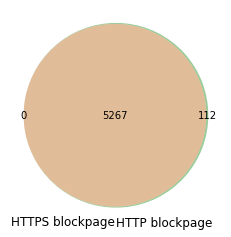

In [ ]:
venn2(subsets = (0, 112, 5267), set_labels = ('HTTPS blockpage', 'HTTP blockpage'))

In [ ]:
segment['https_page_length'] = segment['https'].apply(lambda x: len(str(x)))

## No HTTP or HTTPS

In [ ]:
getOrderedCount(segment[(segment.fetched_http == False) & (segment.fetched_https == False)].ip)[:20]

[('54.241.85.96', 1307),
 ('146.112.61.106', 1160),
 ('52.25.92.0', 458),
 ('193.58.251.1', 446),
 ('185.236.107.107', 363),
 ('198.41.0.4', 359),
 ('38.109.136.196', 335),
 ('38.109.136.197', 334),
 ('4.78.139.50', 304),
 ('115.126.100.160', 301),
 ('147.75.95.72', 301),
 ('4.78.139.54', 301),
 ('148.163.48.215', 300),
 ('65.49.68.152', 300),
 ('173.244.209.150', 300),
 ('31.13.68.1', 300),
 ('185.60.218.50', 299),
 ('31.13.87.34', 299),
 ('31.13.76.16', 299),
 ('157.240.7.5', 299)]

## HTTP only

In [ ]:
segment[(segment.fetched_http == True) & (segment.fetched_https == False)].http_status.unique()

array(['409', '404', '301', '302', '308', '403', '200', '502', '400',
       '503', '500', '410', '700', '204', '504', '451', '307'],
      dtype=object)

### 200

In [ ]:
segment[(segment.fetched_http == True) & (segment.fetched_https == False) & (segment.http_status == '200')].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,http_match_blockpage,http_matched_blockpage
19,62.149.188.252,sci-hub.tw,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None
20,62.149.188.252,rutracker.org,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None
21,62.149.188.252,ytmp3.cc,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None
22,62.149.188.252,rarbg.to,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None
23,62.149.188.252,sci-hub.se,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None


In [ ]:
http_200 = segment[(segment.fetched_http == True) & (segment.fetched_https == False) & (segment.http_status == '200') & (segment.http_match_blockpage != True)]

In [ ]:
getOrderedCount(http_200.ip)[:20]

[('159.255.26.69', 359),
 ('80.87.199.46', 301),
 ('45.77.186.255', 296),
 ('202.137.1.74', 125),
 ('103.148.28.29', 125),
 ('202.152.4.67', 124),
 ('46.97.193.127', 16),
 ('98.159.108.57', 15),
 ('94.177.179.144', 15),
 ('202.43.115.92', 11),
 ('62.149.188.252', 11),
 ('98.159.108.61', 10),
 ('194.87.237.236', 5),
 ('176.103.16.3', 4),
 ('78.46.40.62', 4),
 ('107.189.31.41', 4),
 ('104.244.43.228', 3),
 ('104.244.43.104', 3),
 ('104.244.43.208', 3),
 ('185.59.60.66', 3)]

In [ ]:
ip_df = []
for ip, count in getOrderedCount(http_200.ip)[:20]:
  ip_df.append(calIPSimilarity(http_200, ip, '200'))

ip_df = pd.DataFrame(ip_df)

In [ ]:
ip_df

,ip,domain_count,avg_length,standard_deviation,similarity
0,159.255.26.69,359,3.000000,0.000000,1.00000
1,80.87.199.46,301,87.000000,0.000000,1.00000
2,45.77.186.255,296,89.000000,0.000000,1.00000
3,202.137.1.74,125,137.000000,0.000000,1.00000
4,103.148.28.29,125,89.000000,0.000000,1.00000
5,202.152.4.67,124,130.709677,1.522754,0.98835
6,46.97.193.127,16,3.000000,0.000000,1.00000
7,98.159.108.57,15,115.000000,0.000000,1.00000
8,94.177.179.144,15,3.000000,0.000000,1.00000
9,202.43.115.92,11,89.000000,0.000000,1.00000


In [ ]:
printFirstRow(http_200[http_200.ip == '46.97.193.127'], 'http')

domain: taboola.com, {'status_line': '200 OK', 'headers': {'Content-Length': ['0'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:06:12 GMT'], 'Server': ['Apache/2.4.10 (Win32) OpenSSL/1.0.1h PHP/5.4.31'], 'X-Powered-By': ['PHP/5.4.31']}, 'body': ''}


In [ ]:
displayFirstRow(http_200[http_200.ip == '46.97.193.127'], 'http')

domain: taboola.com, {'status_line': '200 OK', 'headers': {'Content-Length': ['0'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:06:12 GMT'], 'Server': ['Apache/2.4.10 (Win32) OpenSSL/1.0.1h PHP/5.4.31'], 'X-Powered-By': ['PHP/5.4.31']}, 'body': ''}


### 204

In [ ]:
segment[(segment.fetched_http == True) & (segment.fetched_https == False) & (segment.http_status == '204')].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,http_match_blockpage,http_matched_blockpage
12412,101.198.192.46,sogou.com,"{'status_line': '204 No Content', 'headers': {...",EOF,True,True,None,204,False,None,None,None,None,None,None,None,None,False,None
52657,104.192.110.226,harvard.edu,"{'status_line': '204 No Content', 'headers': {...",EOF,True,True,None,204,False,None,None,None,None,None,None,None,None,False,None


### 301

In [ ]:
redirect_http = segment[(segment.fetched_http == True) & (segment.fetched_https == False) & (segment.http_status.isin(['301', '302']))]
redirect_http['redirect_match'] = redirect_http.apply(lambda x: checkRedirect(x.keyword, x.http), axis=1)
redirect_http['http_location'] = redirect_http.http.apply(lambda x: None if 'headers' not in x else x['headers']['Location'][0])
getOrderedCount(redirect_http[(redirect_http['redirect_match'] == False)].ip)[:30]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[('204.110.220.2', 428),
 ('114.6.128.8', 116),
 ('188.186.157.49', 90),
 ('50.18.219.153', 77),
 ('103.21.206.202', 72),
 ('36.86.63.185', 62),
 ('99.83.232.37', 46),
 ('75.2.78.201', 46),
 ('212.49.118.125', 36),
 ('54.242.237.204', 34),
 ('213.224.83.39', 13),
 ('91.90.249.35', 11),
 ('195.182.192.10', 9),
 ('145.237.235.240', 7),
 ('195.129.111.51', 5),
 ('193.113.9.167', 5),
 ('198.58.98.50', 3),
 ('99.83.179.4', 3),
 ('75.2.78.236', 3),
 ('99.83.178.7', 2),
 ('91.90.249.36', 2),
 ('75.2.110.227', 2),
 ('194.105.131.10', 2),
 ('13.48.139.126', 2),
 ('82.202.190.91', 2),
 ('82.202.190.90', 2),
 ('101.167.164.47', 2),
 ('199.80.59.132', 2),
 ('213.81.170.214', 2),
 ('199.80.59.186', 2)]

In [ ]:
redirect_http.shape

(4466, 20)

In [ ]:
segment[(segment.fetched_http == True) & (segment.fetched_https == False) & (segment.http_status.isin(['303','307', '308']))].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,http_match_blockpage,http_matched_blockpage
16,168.119.181.46,www.exgay.com,"{'status_line': '308 Permanent Redirect', 'hea...","Get ""https://168.119.181.46:443/"": remote erro...",True,True,None,308,False,None,None,None,None,None,None,None,None,False,None
33772,69.187.24.15,blueskyswimwear.com,"{'status_line': '307 Moved Temporarily', 'head...","Get ""https://69.187.24.15:443/"": remote error:...",True,True,None,307,False,None,None,None,None,None,None,None,None,False,None
59796,69.191.252.15,blueskyswimwear.com,"{'status_line': '307 Moved Temporarily', 'head...","Get ""https://69.191.252.15:443/"": remote error...",True,True,None,307,False,None,None,None,None,None,None,None,None,False,None


In [ ]:
for ip, count in getOrderedCount(redirect_http[(redirect_http['redirect_match'] == False)].ip)[:30]:
  print(ip, count, "locations", redirect_http[redirect_http.ip == ip].http_location.unique())

204.110.220.2 428 locations ['https://www.securly.com/broker?reason=&categoryid=33555456&policyid=0&i2n=3111900301&url=d3d3LmZhc3RtYWlsLmNvbS8=&rand=998803165'
 'https://www.securly.com/broker?reason=&categoryid=4096&policyid=0&i2n=3111900301&url=d3d3LmJhaWR1LmNvbS8=&rand=2111015092'
 'https://www.securly.com/broker?reason=&categoryid=33554688&policyid=0&i2n=3111900301&url=bW96aWxsYS5jbG91ZGZsYXJlLWRucy5jb20v&rand=377548200'
 'https://www.securly.com/broker?reason=&categoryid=64&policyid=0&i2n=3111900301&url=Ymx1ZXNreXN3aW13ZWFyLmNvbS8=&rand=2123916380'
 'https://www.securly.com/broker?reason=&categoryid=50331904&policyid=0&i2n=3111900301&url=Z29nb2FuaW1lLnNvLw==&rand=976540240'
 'https://www.securly.com/broker?reason=&categoryid=33556480&policyid=0&i2n=3111900301&url=Z29kaGF0ZXNmYWdzLmNvbS8=&rand=805386573'
 'https://www.securly.com/broker?reason=&categoryid=33554560&policyid=0&i2n=3111900301&url=dC5tZS8=&rand=1129728372'
 'https://www.securly.com/broker?reason=&categoryid=0&policyid=

In [ ]:
for ip, count in getOrderedCount(redirect_http[(redirect_http['redirect_match'] == False)].ip)[:30]:
  printFirstRow(redirect_http[redirect_http.ip == ip], 'http')

domain: www.fastmail.com, {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:09:36 GMT'], 'Location': ['https://www.securly.com/broker?reason=&categoryid=33555456&policyid=0&i2n=3111900301&url=d3d3LmZhc3RtYWlsLmNvbS8=&rand=998803165'], 'Server': ['Apache'], 'Via': ['Securly.com'], 'X-Cache': ['MISS from securly.com']}, 'body': ''}
domain: www.xvideos.com, {'status_line': '302 Found', 'headers': {'Content-Length': ['239'], 'Content-Type': ['text/html; charset=iso-8859-1'], 'Date': ['Mon, 28 Jun 2021 01:07:17 GMT'], 'Location': ['http://netsafe.indosatooredoo.com/desktop/?s=2&p=30'], 'Server': ['Apache']}, 'body': '<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>302 Found</title>\n</head><body>\n<h1>Found</h1>\n<p>The document has moved <a href="http://netsafe.indosatooredoo.com/desktop/?s=2&amp;p=30">here</a>.</p>\n</body></html>\n'}
domain: sci-hub.tw, {'status_line': '301 Moved Permanently', 'headers': {

### 400

In [ ]:
segment[(segment.fetched_http == True) & (segment.fetched_https == False) & (segment.http_status.isin(['400'])) & (segment.http_match_blockpage)]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,http_match_blockpage,http_matched_blockpage


### 451

In [ ]:
getOrderedCount(segment[(segment.fetched_http == True) & (segment.fetched_https == False) & (segment.http_status.isin(['451']))].ip)

[('93.174.131.38', 79), ('193.58.251.1', 25), ('178.218.88.14', 19)]

### 500

In [ ]:
segment[(segment.fetched_http == True) & (segment.fetched_https == False) & (segment.http_status.isin(['700']))]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,http_match_blockpage,http_matched_blockpage
3264,104.244.43.248,quora.com,"{'status_line': '700 Redirect', 'headers': {'A...","Get ""https://104.244.43.248:443/"": read tcp 14...",True,True,None,700,False,None,None,None,None,None,None,None,None,False,None
4244,104.244.43.182,quora.com,"{'status_line': '700 Redirect', 'headers': {'A...","Get ""https://104.244.43.182:443/"": read tcp 14...",True,True,None,700,False,None,None,None,None,None,None,None,None,False,None
13898,104.244.43.57,quora.com,"{'status_line': '700 Redirect', 'headers': {'A...","Get ""https://104.244.43.57:443/"": read tcp 141...",True,True,None,700,False,None,None,None,None,None,None,None,None,False,None
24233,104.244.43.229,quora.com,"{'status_line': '700 Redirect', 'headers': {'A...","Get ""https://104.244.43.229:443/"": read tcp 14...",True,True,None,700,False,None,None,None,None,None,None,None,None,False,None
52668,104.244.43.128,quora.com,"{'status_line': '700 Redirect', 'headers': {'A...","Get ""https://104.244.43.128:443/"": read tcp 14...",True,True,None,700,False,None,None,None,None,None,None,None,None,False,None
67160,104.244.43.208,quora.com,"{'status_line': '700 Redirect', 'headers': {'A...","Get ""https://104.244.43.208:443/"": read tcp 14...",True,True,None,700,False,None,None,None,None,None,None,None,None,False,None
78210,104.244.43.104,quora.com,"{'status_line': '700 Redirect', 'headers': {'A...","Get ""https://104.244.43.104:443/"": read tcp 14...",True,True,None,700,False,None,None,None,None,None,None,None,None,False,None
82408,104.244.43.228,quora.com,"{'status_line': '700 Redirect', 'headers': {'A...","Get ""https://104.244.43.228:443/"": read tcp 14...",True,True,None,700,False,None,None,None,None,None,None,None,None,False,None


## HTTP: IPs hosting real pages

What would be a good indicator that a page is a real page? 

- have domain name in page: might be legit pages, might be blockpages

In [ ]:
segment[(segment.fetched_http == True) & (segment.fetched_https == False) & (segment.http_status == '200')]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,http_match_blockpage,http_matched_blockpage
19,62.149.188.252,sci-hub.tw,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None
20,62.149.188.252,rutracker.org,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None
21,62.149.188.252,ytmp3.cc,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None
22,62.149.188.252,rarbg.to,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None
23,62.149.188.252,sci-hub.se,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82451,104.244.43.228,www.dropbox.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://104.244.43.228:443/"": read tcp 14...",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None
82620,203.160.160.1,xnxx.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://203.160.160.1:443/"": dial tcp 203...",True,True,None,200,False,None,None,None,None,None,None,None,None,True,In compliance of NTC Memorandum Circular #01-0...
82621,203.160.160.1,www.pornhub.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://203.160.160.1:443/"": dial tcp 203...",True,True,None,200,False,None,None,None,None,None,None,None,None,True,In compliance of NTC Memorandum Circular #01-0...
83556,34.102.136.180,www.northcom.mil,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://34.102.136.180:443/"": EOF",True,True,None,200,False,None,None,None,None,None,None,None,None,False,None


In [ ]:
segment.columns

Index(['ip', 'keyword', 'http', 'https', 'fetched', 'fetched_http',
       'http_error', 'http_status', 'fetched_https', 'https_status', 'cert',
       'cert_domain', 'cert_match', 'https_match_blockpage',
       'https_matched_blockpage', 'cert_org', 'cert_country',
       'http_match_blockpage', 'http_matched_blockpage'],
      dtype='object')

## HTTPS: IPs hosting real pages


#### Cert match - even cert matches see blockpages

In [ ]:
segment[(segment.cert_match == True) & (segment.https_status != '200')].https_status.unique()

array(['301', '302', '403', '307', '503', '409', '400', '404', '308',
       '303', '500', '451'], dtype=object)

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_match_blockpage == True)].ip)

[('198.251.90.72', 342),
 ('193.58.251.11', 246),
 ('198.251.90.71', 101),
 ('34.216.207.42', 80),
 ('44.235.238.204', 79)]

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_match_blockpage == True)].https_status)

[('200', 602), ('451', 246)]

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_match_blockpage == True) & (segment.https_status == '200')].ip)

[('198.251.90.72', 342),
 ('198.251.90.71', 101),
 ('34.216.207.42', 80),
 ('44.235.238.204', 79)]

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_match_blockpage == True) & (segment.https_status == '200')].cert_org)

[('NetAlerts', 342), ('Zscaler Inc.', 159), ('DNSFilter', 101)]

In [ ]:
printFirstRow(segment[(segment.cert_match == True) & (segment.https_match_blockpage == True) & (segment.https_status == '200') & (segment.cert_org == 'NetAlerts')], 
              'https')

domain: www.victoriassecret.com, cert_domain: www.victoriassecret.com, {'status_line': '200 OK', 'headers': {'Access-Control-Allow-Origin': ['*'], 'Cache-Control': ['no-store, no-cache, must-revalidate, proxy-revalidate'], 'Content-Length': ['490'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:09:25 GMT'], 'Etag': ['W/"1ea-XnIeklzL72jkybFfHu1tmMl2Vic"'], 'Expires': ['0'], 'Host': ['www.victoriassecret.com'], 'Pragma': ['no-cache'], 'Server': ['nginx'], 'Surrogate-Control': ['no-store'], 'X-Api-Url': ['https://api.netalerts.io'], 'X-App-Url': ['https://blocked.netalerts.io'], 'X-Deployment-Type': ['undefined'], 'X-Ip-Address': ['141.212.123.185'], 'X-Page-Type': ['blocked']}, 'body': '<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <meta http-equiv="X-UA-Compatible" content="ie=edge">\n  <title>Website Filtered</title>\n  <style>\n    .container {\n      padding-top: 40px;\n 

In [ ]:
segment[(segment.cert_match == True) & (segment.https_status == '200')].cert_org.nunique()

29

In [ ]:
org_df = []
for org in segment[(segment.cert_match == True) & (segment.https_status == '200')].cert_org.unique():
  org_df.append(calOrgSimilarity(org, '200'))
org_df = pd.DataFrame(org_df)

In [ ]:
org_df.sort_values('similarity', ascending=False)

,org,domain_count,avg_length,standard_deviation,similarity
13,kk,2,1885.000000,0.000000,1.000000
3,Software SSI,1,69158.000000,0.000000,1.000000
25,DHIMYOTIS,1,71035.000000,0.000000,1.000000
22,"Cybertrust Japan Co., Ltd.",1,18771.000000,0.000000,1.000000
21,T-Systems International GmbH,2,71537.000000,15.513435,0.999783
17,Apple Inc.,1,10381.000000,2.598076,0.999750
8,GoGetSSL,1,70191.500000,19.445436,0.999723
27,Zscaler Inc.,91,3848.691824,1.417592,0.999632
26,NetAlerts,342,1879.134503,0.921159,0.999510
28,DNSFilter,101,1886.118812,1.748039,0.999073


In [ ]:
printFirstRow(segment[(segment.cert_match == True) & (segment.https_status == '200') & (segment.cert_org == "keweon Privacy Cloud")], 
              'https')

domain: taboola.com, cert_domain: taboola.com, {'status_line': '200 OK', 'headers': {'Access-Control-Allow-Credentials': ['true'], 'Access-Control-Allow-Headers': ['Origin, Accept, Content-Type, Content-Range, Content-Disposition, Content-Description, Authorization, X-Requested-With'], 'Access-Control-Allow-Methods': ['GET, HEAD, PUT, DELETE, CONNECT, OPTIONS, TRACE, PATCH'], 'Access-Control-Allow-Origin': ['*'], 'Access-Control-Request-Method': [': GET, HEAD, PUT, DELETE, CONNECT, OPTIONS, TRACE, PATCH'], 'Content-Length': ['0'], 'Content-Security-Policy': ["default-src 'none'; script-src 'self'; connect-src 'self'; img-src 'self'; style-src 'self';"], 'Content-Type': ['application/javascript'], 'Date': ['Mon, 28 Jun 2021 01:06:50 GMT'], 'Expect-Ct': ['max-age=7776000, enforce'], 'Referrer-Policy': ['origin'], 'Server': ['Apache'], 'Strict-Transport-Security': ['max-age=31536000'], 'Upgrade': ['h2,h2c'], 'X-Content-Type-Options': ['nosniff'], 'X-Xss-Protection': ['0;']}, 'body': '', '

domain: www.victoriassecret.com, cert_domain: www.victoriassecret.com, {'status_line': '200 OK', 'headers': {'Access-Control-Allow-Origin': ['*'], 'Cache-Control': ['no-store, no-cache, must-revalidate, proxy-revalidate'], 'Content-Length': ['490'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:09:25 GMT'], 'Etag': ['W/"1ea-XnIeklzL72jkybFfHu1tmMl2Vic"'], 'Expires': ['0'], 'Host': ['www.victoriassecret.com'], 'Pragma': ['no-cache'], 'Server': ['nginx'], 'Surrogate-Control': ['no-store'], 'X-Api-Url': ['https://api.netalerts.io'], 'X-App-Url': ['https://blocked.netalerts.io'], 'X-Deployment-Type': ['undefined'], 'X-Ip-Address': ['141.212.123.185'], 'X-Page-Type': ['blocked']}, 'body': '<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <meta http-equiv="X-UA-Compatible" content="ie=edge">\n  <title>Website Filtered</title>\n  <style>\n    .container {\n      padding-top: 40px;\n 

In [ ]:

getOrderedCount(segment[(segment['cert_match'] == True) & (segment['https_status'] == '451')].ip)

# for _, row in segment[(segment['cert_match'] == True) & (segment['https_status'] == '451')].iterrows():
#   https = row['https']
#   print(row['https'])
#   display(IPython.display.HTML(str(https)))
#   break
segment[(segment.cert_match == True) & (segment.https_match_blockpage == True)].shape

(848, 15)

#### Cert match - Non 200 status HTTPS

In [ ]:
segment[(segment.cert_match == True) & (segment.https_status != '200')].https_status.unique()

array(['301', '302', '403', '307', '503', '409', '400', '404', '308',
       '303', '500', '451'], dtype=object)

##### 301

In [ ]:
# 301
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '301')].keyword)[:20]

[('zara.com', 647),
 ('washingtonpost.com', 481),
 ('www.victoriassecret.com', 11),
 ('pandora.com', 11),
 ('adobe.com', 10),
 ('salesforce.com', 6),
 ('bing.com', 6),
 ('www.spotify.com', 5),
 ('tandfonline.com', 5),
 ('apple.com', 5),
 ('constantcontact.com', 4),
 ('okta.com', 4),
 ('farfetch.com', 4),
 ('tdameritrade.com', 4),
 ('17track.net', 4),
 ('chase.com', 4),
 ('marca.com', 4),
 ('chron.com', 4),
 ('service-now.com', 4),
 ('ig.com', 4)]

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '301')].ip)[:20]

[('50.18.219.153', 169),
 ('176.31.102.224', 60),
 ('168.119.202.236', 60),
 ('176.9.122.183', 55),
 ('51.158.73.117', 31),
 ('162.223.88.52', 11),
 ('51.15.38.199', 8),
 ('185.134.23.170', 8),
 ('178.32.49.27', 7),
 ('89.249.66.40', 5),
 ('185.134.23.173', 5),
 ('91.134.231.179', 5),
 ('168.119.202.234', 2),
 ('85.10.207.52', 2),
 ('212.58.249.146', 2),
 ('185.42.223.139', 2),
 ('23.216.20.97', 2),
 ('204.12.225.226', 2),
 ('178.159.1.155', 2),
 ('176.9.122.176', 2)]

In [ ]:
status = '301'
for ip, count in getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == status)].ip)[:20]:
  displayFirstRow(segment[(segment.ip == ip) & (segment.cert_match == True) & (segment.https_status == status) ],
                  "https")

##### 302

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '302')].keyword)[:20]

[('rediff.com', 17),
 ('www.bitcomet.com', 10),
 ('ultrasurf.us', 10),
 ('spankbang.com', 10),
 ('apps.apple.com', 10),
 ('linktr.ee', 9),
 ('www.emule.com', 9),
 ('telegram.me', 9),
 ('sputniknews.com', 8),
 ('www.marxists.org', 8),
 ('mega.nz', 8),
 ('wikileaks.org', 8),
 ('gab.com', 8),
 ('primevideo.com', 8),
 ('t.me', 8),
 ('afip.gob.ar', 8),
 ('telegra.ph', 8),
 ('dashjr.org', 8),
 ('ilovepdf.com', 8),
 ('seclists.org', 8)]

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '302')].ip)[:20]

[('208.67.216.154', 95),
 ('208.67.216.159', 82),
 ('204.110.220.2', 77),
 ('146.112.203.77', 73),
 ('50.18.219.153', 30),
 ('51.158.73.117', 14),
 ('176.31.102.224', 13),
 ('168.119.202.236', 13),
 ('176.9.122.183', 12),
 ('146.112.47.233', 11),
 ('146.112.47.166', 10),
 ('146.112.47.185', 9),
 ('146.112.47.14', 8),
 ('146.112.47.201', 8),
 ('146.112.47.47', 8),
 ('146.112.194.86', 8),
 ('146.112.250.253', 8),
 ('146.112.47.2', 7),
 ('146.112.47.158', 7),
 ('146.112.250.243', 7)]

In [ ]:
status = '302'
for ip, count in getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == status)].ip)[:20]:
  print(ip, count)
  displayFirstRow(segment[(segment.ip == ip) & (segment.cert_match == True) & (segment.https_status == status) ],
                  "https")

208.67.216.154 95
www.nazi-lauck-nsdapao.com ['https://bpb.opendns.com/b/https/www.nazi-lauck-nsdapao.com/'] {'status_line': '302 Moved Temporarily', 'headers': {'Access-Control-Allow-Credentials': ['true'], 'Access-Control-Allow-Headers': ['DNT,Keep-Alive,User-Agent,X-Requested-With,If-Modified-Since,Cache-Control,Content-Type,Content-Range,Range'], 'Access-Control-Allow-Methods': ['GET,POST,PUT,OPTIONS,HEAD,DELETE'], 'Access-Control-Allow-Origin': ['*'], 'Content-Length': ['127'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:12:18 GMT'], 'Location': ['https://bpb.opendns.com/b/https/www.nazi-lauck-nsdapao.com/'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['xodbpb=; Path=/; HttpOnly']}, 'body': '<html>\r\n<head><title>302 Found</title></head>\r\n<body bgcolor="white">\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><ce', 'TlsVersion': 771, 'CipherSuite': 156, 'Certificate': 'MIIDXjCCAkagAwIBAgIEYNkS2TANBgkqhkiG9w0BAQsFADBAMQ4wDAYDVQQKDAVDaXNjbzEuMCwGA1UEAww

208.67.216.159 82
www.sex.com ['https://bpb.opendns.com/b/https/www.sex.com/'] {'status_line': '302 Moved Temporarily', 'headers': {'Access-Control-Allow-Credentials': ['true'], 'Access-Control-Allow-Headers': ['DNT,Keep-Alive,User-Agent,X-Requested-With,If-Modified-Since,Cache-Control,Content-Type,Content-Range,Range'], 'Access-Control-Allow-Methods': ['GET,POST,PUT,OPTIONS,HEAD,DELETE'], 'Access-Control-Allow-Origin': ['*'], 'Content-Length': ['127'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:13:32 GMT'], 'Location': ['https://bpb.opendns.com/b/https/www.sex.com/'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['xodbpb=; Path=/; HttpOnly']}, 'body': '<html>\r\n<head><title>302 Found</title></head>\r\n<body bgcolor="white">\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><ce', 'TlsVersion': 771, 'CipherSuite': 156, 'Certificate': 'MIIDQDCCAiigAwIBAgIEYNjuzzANBgkqhkiG9w0BAQsFADBAMQ4wDAYDVQQKDAVDaXNjbzEuMCwGA1UEAwwlQ2lzY28gVW1icmVsbGEgU2Vjb25kYXJ5IFN1YkNBIHNl

204.110.220.2 77
imageshack.com ['https://www.securly.com/broker?reason=&categoryid=128&policyid=0&i2n=3111900301&url=aW1hZ2VzaGFjay5jb20v&ssl=true&rand=1995777237'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:09:38 GMT'], 'Location': ['https://www.securly.com/broker?reason=&categoryid=128&policyid=0&i2n=3111900301&url=aW1hZ2VzaGFjay5jb20v&ssl=true&rand=1995777237'], 'Server': ['Apache'], 'Via': ['Securly.com'], 'X-Cache': ['MISS from securly.com']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIDGjCCAgKgAwIBAgIJANCQgOJDoRgiMA0GCSqGSIb3DQEBCwUAMGExCzAJBgNVBAYTAlVTMRMwEQYDVQQIDApDYWxpZm9ybmlhMRUwEwYDVQQKDAxTZWN1cmx5LCBJbmMxDzANBgNVBAsMBkRldjBwczEVMBMGA1UEAwwMSW50ZXJtZWRpYXRlMB4XDTIxMDYyNjAxMDkzN1oXDTIxMDcyODAxMDkzN1owGTEXMBUGA1UEAwwOaW1hZ2VzaGFjay5jb20wggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQDa2DCAIcP1elRf2Qo0NkKJC69xejKhs8m/vYImrZKM45drFQzhpRqOMDP5SYKMfcepoWstcv15CgeOjC9kL01xvpaPWnvop5Hc3pZHmKVw

146.112.203.77 73
www.sex.com ['https://bpb.opendns.com/b/https/www.sex.com/'] {'status_line': '302 Moved Temporarily', 'headers': {'Access-Control-Allow-Credentials': ['true'], 'Access-Control-Allow-Headers': ['DNT,Keep-Alive,User-Agent,X-Requested-With,If-Modified-Since,Cache-Control,Content-Type,Content-Range,Range'], 'Access-Control-Allow-Methods': ['GET,POST,PUT,OPTIONS,HEAD,DELETE'], 'Access-Control-Allow-Origin': ['*'], 'Content-Length': ['127'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:08:54 GMT'], 'Location': ['https://bpb.opendns.com/b/https/www.sex.com/'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['xodbpb=; Path=/; HttpOnly']}, 'body': '<html>\r\n<head><title>302 Found</title></head>\r\n<body bgcolor="white">\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><ce', 'TlsVersion': 771, 'CipherSuite': 156, 'Certificate': 'MIIDQDCCAiigAwIBAgIEYNkSYTANBgkqhkiG9w0BAQsFADBAMQ4wDAYDVQQKDAVDaXNjbzEuMCwGA1UEAwwlQ2lzY28gVW1icmVsbGEgU2Vjb25kYXJ5IFN1YkNBIHNl

50.18.219.153 30
scribd.com ['https://www.scribd.com/'] {'status_line': '302 Found', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:08:52 GMT'], 'Location': ['https://www.scribd.com/'], 'Retry-After': ['0'], 'Server': ['Varnish'], 'Set-Cookie': ['scribd_ubtc=u%3D404e799a-00d0-4ebb-9136-1330dbb3da4e%26h%3D2nYfy3zic%2BzHvUfx%2BumsVBAmCT6UaeG%2FVkz%2FiA1t084%3D; Domain=.scribd.com; Path=/; Expires=Wed, 04 Jun 2121 01:08:52 GMT; Secure'], 'Vary': [''], 'Via': ['1.1 varnish'], 'X-Cache': ['HIT'], 'X-Cache-Hits': ['0'], 'X-Served-By': ['cache-sjc10061-SJC']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIFGzCCBAOgAwIBAgISA8T3x2ZVbrgrtS8Tj9iQ0ecvMA0GCSqGSIb3DQEBCwUAMDIxCzAJBgNVBAYTAlVTMRYwFAYDVQQKEw1MZXQncyBFbmNyeXB0MQswCQYDVQQDEwJSMzAeFw0yMTA2MTQxMTQ1MzVaFw0yMTA5MTIxMTQ1MzRaMBUxEzARBgNVBAMTCnNjcmliZC5jb20wggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQDxqnpVuWXkq0HHfIBU8pSW7aNwB8BWZ9yxfsDIV4h0pGCZCOpnBfn5dYJnedC7rCxLYzrBrbe

51.158.73.117 14
geti2p.net ['https://geti2p.net/en/'] {'status_line': '302 FOUND', 'headers': {'Content-Length': ['215'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:07:53 GMT'], 'Location': ['https://geti2p.net/en/'], 'Server': ['Apache/2.4.25 (Debian)'], 'Strict-Transport-Security': ['max-age=31536000; includeSubDomains']}, 'body': '<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<title>Redirecting...</title>\n<h1>Redirecting...</h1>\n<p>You should be redirected automatically to target URL: <a href="/en/">/en/</a>.  If not click the link.', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIFpzCCBI+gAwIBAgISBG3hOC0VsFeIOJtZ0PERe4U7MA0GCSqGSIb3DQEBCwUAMDIxCzAJBgNVBAYTAlVTMRYwFAYDVQQKEw1MZXQncyBFbmNyeXB0MQswCQYDVQQDEwJSMzAeFw0yMTA2MDMxNjIzNTlaFw0yMTA5MDExNjIzNTlaMBUxEzARBgNVBAMTCmdldGkycC5uZXQwggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQC1DuNo55mo0m6jrgjlg2dwlnwhsvYwvIHIN/EZxZVv8vgfcDlzVgrKNDNqcW8J80cGpXEK+1OsRMiH+oA7hWpWmmleneU4qmVxrh6A

176.31.102.224 13
www.cnn.com ['https://edition.cnn.com/'] {'status_line': '302 Found', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:08:03 GMT'], 'Location': ['https://edition.cnn.com/'], 'Retry-After': ['0'], 'Server': ['Varnish'], 'Set-Cookie': ['countryCode=FR; Domain=.cnn.com; Path=/; SameSite=Lax', 'stateCode=HDF; Domain=.cnn.com; Path=/; SameSite=Lax', 'geoData=roubaix|HDF|59100|FR|EU|200|broadband|50.690|3.170; Domain=.cnn.com; Path=/; SameSite=Lax'], 'Via': ['1.1 varnish'], 'X-Cache': ['HIT'], 'X-Cache-Hits': ['0'], 'X-Served-By': ['cache-ams21053-AMS']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIINUjCCDDqgAwIBAgIQAfnIcRGMX4426gaf1p3RzDANBgkqhkiG9w0BAQsFADBVMQswCQYDVQQGEwJCRTEZMBcGA1UEChMQR2xvYmFsU2lnbiBudi1zYTErMCkGA1UEAxMiR2xvYmFsU2lnbiBBdGxhcyBSMyBEViBUTFMgQ0EgMjAyMDAeFw0yMTA0MjAxOTEwMDdaFw0yMjA1MjIxOTEwMDZaMBgxFjAUBgNVBAMMDSouYXBpLmNubi5jb20wggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQCiVkGRJxsCcUm

168.119.202.236 13
atlassian.net ['https://www.atlassian.com/software'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['0'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:43 GMT'], 'Location': ['https://www.atlassian.com/software']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49195, 'Certificate': 'MIIGKjCCBRKgAwIBAgIQC831Km6NO8fHvM8jFjsrOTANBgkqhkiG9w0BAQsFADBwMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMRkwFwYDVQQLExB3d3cuZGlnaWNlcnQuY29tMS8wLQYDVQQDEyZEaWdpQ2VydCBTSEEyIEhpZ2ggQXNzdXJhbmNlIFNlcnZlciBDQTAeFw0xOTExMjgwMDAwMDBaFw0yMjAxMTgxMjAwMDBaMH8xCzAJBgNVBAYTAlVTMRMwEQYDVQQIEwpDYWxpZm9ybmlhMRYwFAYDVQQHEw1TYW4gRnJhbmNpc2NvMSkwJwYDVQQKEyBBdGxhc3NpYW4gTmV0d29yayBTZXJ2aWNlcywgSW5jLjEYMBYGA1UEAwwPKi5hdGxhc3NpYW4ubmV0MFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAE3cFtilkLC+dxJRcNLh1s4BuzS2ssm8TNUpIYI7ovGZRmAu9cDGrTO58a+XD10EinYHPEFM1yauF0Bb9d+BfPt6OCA3owggN2MB8GA1UdIwQYMBaAFFFo/5CvAgd1PMzZZWRiohK4WXI7MB0GA1UdDgQWBBS5C5usl1Kr9g/mY2JZ6/pjcaa5pTApBgNVHR

176.9.122.183 12
teamviewer.com ['https://www.teamviewer.com/en/'] {'status_line': '302 Found', 'headers': {'Access-Control-Allow-Headers': ['Origin, X-Requested-With, Content-Type, Accept, X-Access-Token'], 'Access-Control-Allow-Origin': ['*'], 'Cache-Control': ['private'], 'Content-Length': ['147'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:10:20 GMT'], 'Location': ['https://www.teamviewer.com/en/'], 'Referrer-Policy': ['no-referrer-when-downgrade'], 'Server': ['Microsoft-IIS/10.0'], 'Set-Cookie': ['sdPuqGtW9arY0QIG8N7sDVCbqLPXXjtZxY6IKhN2kPU==+aYI99Z9rNmM8u7XirGV3w==; path=/; secure; HttpOnly'], 'Strict-Transport-Security': ['max-age=31536000; includeSubDomains;'], 'X-Content-Type-Options': ['nosniff'], 'X-Frame-Options': ['SAMEORIGIN'], 'X-Powered-By': ['ARR/3.0'], 'X-Ua-Compatible': ['IE=Edge'], 'X-Xss-Protection': ['1; mode=block']}, 'body': '<html><head><title>Object moved</title></head><body>\r\n<h2>Object moved to <a href="https://www.teamview

146.112.47.233 11
dashjr.org ['https://dashjr.org.x.c001aea70c3a904dbe08cdd01d8f13f8fc7b.9270fa5e.id.opendns.com/s/dashjr.org/?X-OpenDNS-Session=_c001aea70c3a904dbe08cdd01d8f13f8fc7b9270fa5e_wlS7q5jg_'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['188'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:12:09 GMT'], 'Location': ['https://dashjr.org.x.c001aea70c3a904dbe08cdd01d8f13f8fc7b.9270fa5e.id.opendns.com/s/dashjr.org/?X-OpenDNS-Session=_c001aea70c3a904dbe08cdd01d8f13f8fc7b9270fa5e_wlS7q5jg_'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['X-OpenDNS-Session=c001aea70c3a904dbe08cdd01d8f13f8fc7b9270fa5e_wlS7q5jg; Path=/; Expires=Mon, 28-Jun-21 01:17:09 GMT'], 'Via': ['HTTP/1.1 a_proxy_nyc']}, 'body': '<html>\r\n<head><title>302 Moved Temporarily</title></head>\r\n<body>\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><center>Umbrella Cloud Security Gateway</center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 156, 'Ce

146.112.47.166 10
linktr.ee ['https://linktr.ee.x.ba8f7af10de63047b509d3a05fe19ebadb5d.9270fa4e.id.opendns.com/s/linktr.ee/?X-OpenDNS-Session=_ba8f7af10de63047b509d3a05fe19ebadb5d9270fa4e_JDCB0Dqh_'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['188'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:09:06 GMT'], 'Location': ['https://linktr.ee.x.ba8f7af10de63047b509d3a05fe19ebadb5d.9270fa4e.id.opendns.com/s/linktr.ee/?X-OpenDNS-Session=_ba8f7af10de63047b509d3a05fe19ebadb5d9270fa4e_JDCB0Dqh_'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['X-OpenDNS-Session=ba8f7af10de63047b509d3a05fe19ebadb5d9270fa4e_JDCB0Dqh; Path=/; Expires=Mon, 28-Jun-21 01:14:06 GMT'], 'Via': ['HTTP/1.1 a_proxy_nyc']}, 'body': '<html>\r\n<head><title>302 Moved Temporarily</title></head>\r\n<body>\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><center>Umbrella Cloud Security Gateway</center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 156, 'Certifi

146.112.47.185 9
typeform.com ['https://typeform.com.x.ae4e826f0613104a6d0a19606d68d6b3244d.9270fa58.id.opendns.com/s/typeform.com/?X-OpenDNS-Session=_ae4e826f0613104a6d0a19606d68d6b3244d9270fa58_POoOFhea_'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['188'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:11:25 GMT'], 'Location': ['https://typeform.com.x.ae4e826f0613104a6d0a19606d68d6b3244d.9270fa58.id.opendns.com/s/typeform.com/?X-OpenDNS-Session=_ae4e826f0613104a6d0a19606d68d6b3244d9270fa58_POoOFhea_'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['X-OpenDNS-Session=ae4e826f0613104a6d0a19606d68d6b3244d9270fa58_POoOFhea; Path=/; Expires=Mon, 28-Jun-21 01:16:25 GMT'], 'Via': ['HTTP/1.1 a_proxy_nyc']}, 'body': '<html>\r\n<head><title>302 Moved Temporarily</title></head>\r\n<body>\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><center>Umbrella Cloud Security Gateway</center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite':

146.112.47.14 8
seclists.org ['https://seclists.org.x.c34088aa09ebb04b94098760606d27066251.9270fa45.id.opendns.com/s/seclists.org/?X-OpenDNS-Session=_c34088aa09ebb04b94098760606d270662519270fa45_Z84EwuKO_'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['188'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:13:22 GMT'], 'Location': ['https://seclists.org.x.c34088aa09ebb04b94098760606d27066251.9270fa45.id.opendns.com/s/seclists.org/?X-OpenDNS-Session=_c34088aa09ebb04b94098760606d270662519270fa45_Z84EwuKO_'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['X-OpenDNS-Session=c34088aa09ebb04b94098760606d270662519270fa45_Z84EwuKO; Path=/; Expires=Mon, 28-Jun-21 01:18:22 GMT'], 'Via': ['HTTP/1.1 a_proxy_nyc']}, 'body': '<html>\r\n<head><title>302 Moved Temporarily</title></head>\r\n<body>\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><center>Umbrella Cloud Security Gateway</center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 

146.112.47.201 8
afip.gob.ar ['https://afip.gob.ar.x.2fd70b380ca36047d40ba8203721bb298715.9270fa4e.id.opendns.com/s/afip.gob.ar/?X-OpenDNS-Session=_2fd70b380ca36047d40ba8203721bb2987159270fa4e_94vanakc_'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['188'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:10:07 GMT'], 'Location': ['https://afip.gob.ar.x.2fd70b380ca36047d40ba8203721bb298715.9270fa4e.id.opendns.com/s/afip.gob.ar/?X-OpenDNS-Session=_2fd70b380ca36047d40ba8203721bb2987159270fa4e_94vanakc_'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['X-OpenDNS-Session=2fd70b380ca36047d40ba8203721bb2987159270fa4e_94vanakc; Path=/; Expires=Mon, 28-Jun-21 01:15:07 GMT'], 'Via': ['HTTP/1.1 a_proxy_nyc']}, 'body': '<html>\r\n<head><title>302 Moved Temporarily</title></head>\r\n<body>\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><center>Umbrella Cloud Security Gateway</center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 156,

146.112.47.47 8
aporasal.net ['https://aporasal.net.x.50c14e360ad45046d20b1ed0d5e80ac2ffc0.9270fa4d.id.opendns.com/s/aporasal.net/?X-OpenDNS-Session=_50c14e360ad45046d20b1ed0d5e80ac2ffc09270fa4d_xOcYIme9_'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['188'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:49 GMT'], 'Location': ['https://aporasal.net.x.50c14e360ad45046d20b1ed0d5e80ac2ffc0.9270fa4d.id.opendns.com/s/aporasal.net/?X-OpenDNS-Session=_50c14e360ad45046d20b1ed0d5e80ac2ffc09270fa4d_xOcYIme9_'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['X-OpenDNS-Session=50c14e360ad45046d20b1ed0d5e80ac2ffc09270fa4d_xOcYIme9; Path=/; Expires=Mon, 28-Jun-21 01:12:49 GMT'], 'Via': ['HTTP/1.1 a_proxy_nyc']}, 'body': '<html>\r\n<head><title>302 Moved Temporarily</title></head>\r\n<body>\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><center>Umbrella Cloud Security Gateway</center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 

146.112.194.86 8
chaturbate.com ['https://bpb.opendns.com/b/https/chaturbate.com/'] {'status_line': '302 Moved Temporarily', 'headers': {'Access-Control-Allow-Credentials': ['true'], 'Access-Control-Allow-Headers': ['DNT,Keep-Alive,User-Agent,X-Requested-With,If-Modified-Since,Cache-Control,Content-Type,Content-Range,Range'], 'Access-Control-Allow-Methods': ['GET,POST,PUT,OPTIONS,HEAD,DELETE'], 'Access-Control-Allow-Origin': ['*'], 'Content-Length': ['127'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:33 GMT'], 'Location': ['https://bpb.opendns.com/b/https/chaturbate.com/'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['xodbpb=; Path=/; HttpOnly']}, 'body': '<html>\r\n<head><title>302 Found</title></head>\r\n<body bgcolor="white">\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><ce', 'TlsVersion': 771, 'CipherSuite': 156, 'Certificate': 'MIIDRjCCAi6gAwIBAgIEYNjVpjANBgkqhkiG9w0BAQsFADBAMQ4wDAYDVQQKDAVDaXNjbzEuMCwGA1UEAwwlQ2lzY28gVW1icmVsbGEgU2Vjb25kYXJ5IFN1

146.112.250.253 8
t.me ['https://t.me.x.f8e6739501b4b0434f09cb501633a2d8f54f.9270fa56.id.opendns.com/s/t.me/?X-OpenDNS-Session=_f8e6739501b4b0434f09cb501633a2d8f54f9270fa56_8CxVRXYl_'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['188'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:21 GMT'], 'Location': ['https://t.me.x.f8e6739501b4b0434f09cb501633a2d8f54f.9270fa56.id.opendns.com/s/t.me/?X-OpenDNS-Session=_f8e6739501b4b0434f09cb501633a2d8f54f9270fa56_8CxVRXYl_'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['X-OpenDNS-Session=f8e6739501b4b0434f09cb501633a2d8f54f9270fa56_8CxVRXYl; Path=/; Expires=Mon, 28-Jun-21 01:12:21 GMT'], 'Via': ['HTTP/1.1 a_proxy_nyc']}, 'body': '<html>\r\n<head><title>302 Moved Temporarily</title></head>\r\n<body>\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><center>Umbrella Cloud Security Gateway</center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 156, 'Certificate': 'MIIDODCCAiCgAwIBA

146.112.47.2 7
aporasal.net ['https://aporasal.net.x.08cda6010459d04b5c089c8004753c587cf6.9270fa4c.id.opendns.com/s/aporasal.net/?X-OpenDNS-Session=_08cda6010459d04b5c089c8004753c587cf69270fa4c_7AWMt3Mk_'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['188'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:13:26 GMT'], 'Location': ['https://aporasal.net.x.08cda6010459d04b5c089c8004753c587cf6.9270fa4c.id.opendns.com/s/aporasal.net/?X-OpenDNS-Session=_08cda6010459d04b5c089c8004753c587cf69270fa4c_7AWMt3Mk_'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['X-OpenDNS-Session=08cda6010459d04b5c089c8004753c587cf69270fa4c_7AWMt3Mk; Path=/; Expires=Mon, 28-Jun-21 01:18:26 GMT'], 'Via': ['HTTP/1.1 a_proxy_nyc']}, 'body': '<html>\r\n<head><title>302 Moved Temporarily</title></head>\r\n<body>\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><center>Umbrella Cloud Security Gateway</center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 1

146.112.47.158 7
mega.nz ['https://mega.nz.x.2bff7d0c070ac0422a09fba02321a0c287b6.9270fa47.id.opendns.com/s/mega.nz/?X-OpenDNS-Session=_2bff7d0c070ac0422a09fba02321a0c287b69270fa47_0Sq2N2oS_'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['188'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:31 GMT'], 'Location': ['https://mega.nz.x.2bff7d0c070ac0422a09fba02321a0c287b6.9270fa47.id.opendns.com/s/mega.nz/?X-OpenDNS-Session=_2bff7d0c070ac0422a09fba02321a0c287b69270fa47_0Sq2N2oS_'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['X-OpenDNS-Session=2bff7d0c070ac0422a09fba02321a0c287b69270fa47_0Sq2N2oS; Path=/; Expires=Mon, 28-Jun-21 01:12:31 GMT'], 'Via': ['HTTP/1.1 a_proxy_nyc']}, 'body': '<html>\r\n<head><title>302 Moved Temporarily</title></head>\r\n<body>\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><center>Umbrella Cloud Security Gateway</center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 156, 'Certificate': 'MII

146.112.250.243 7
afip.gob.ar ['https://afip.gob.ar.x.b431af8c0eac8046670986201b317448fe90.9270fa45.id.opendns.com/s/afip.gob.ar/?X-OpenDNS-Session=_b431af8c0eac8046670986201b317448fe909270fa45_KlnVM8ZP_'] {'status_line': '302 Moved Temporarily', 'headers': {'Content-Length': ['188'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:30 GMT'], 'Location': ['https://afip.gob.ar.x.b431af8c0eac8046670986201b317448fe90.9270fa45.id.opendns.com/s/afip.gob.ar/?X-OpenDNS-Session=_b431af8c0eac8046670986201b317448fe909270fa45_KlnVM8ZP_'], 'Server': ['Cisco Umbrella'], 'Set-Cookie': ['X-OpenDNS-Session=b431af8c0eac8046670986201b317448fe909270fa45_KlnVM8ZP; Path=/; Expires=Mon, 28-Jun-21 01:12:30 GMT'], 'Via': ['HTTP/1.1 a_proxy_nyc']}, 'body': '<html>\r\n<head><title>302 Moved Temporarily</title></head>\r\n<body>\r\n<center><h1>302 Moved Temporarily</h1></center>\r\n<hr><center>Umbrella Cloud Security Gateway</center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 156

##### 303

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '303')].keyword)[:20]

[('kp.ru', 1),
 ('elwatannews.com', 1),
 ('www.megaproxy.com', 1),
 ('www.anonymsurfen.com', 1),
 ('www.marijuana.com', 1),
 ('www.drugsense.org', 1),
 ('www.pacom.mil', 1),
 ('www.northcom.mil', 1),
 ('www.quantico.marines.mil', 1),
 ('www.stratcom.mil', 1),
 ('www.centcom.mil', 1),
 ('www.jcs.mil', 1),
 ('www.nationalguard.mil', 1),
 ('www.cannabis.info', 1),
 ('www.afrc.af.mil', 1),
 ('www.hidemyass.com', 1),
 ('weedfarmer.com', 1),
 ('www.dcma.mil', 1),
 ('www.whs.mil', 1),
 ('anon.inf.tu-dresden.de', 1)]

In [ ]:
getOrderedCount(segment[(segment.https_status == '303')].keyword)[:20]

[('progressio.org.uk', 1),
 ('kp.ru', 1),
 ('elwatannews.com', 1),
 ('www.megaproxy.com', 1),
 ('www.anonymsurfen.com', 1),
 ('www.marijuana.com', 1),
 ('www.drugsense.org', 1),
 ('www.pacom.mil', 1),
 ('www.northcom.mil', 1),
 ('www.quantico.marines.mil', 1),
 ('www.stratcom.mil', 1),
 ('www.centcom.mil', 1),
 ('www.jcs.mil', 1),
 ('www.nationalguard.mil', 1),
 ('www.cannabis.info', 1),
 ('www.afrc.af.mil', 1),
 ('www.hidemyass.com', 1),
 ('weedfarmer.com', 1),
 ('www.dcma.mil', 1),
 ('www.whs.mil', 1)]

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '303')].ip)[:20]

[('162.159.36.12', 63), ('50.18.219.153', 2)]

In [ ]:
getOrderedCount(segment[ (segment.https_status == '303')].ip)[:20]

[('162.159.36.12', 63), ('50.18.219.153', 2), ('77.68.3.233', 1)]

In [ ]:
status = '303'
for ip, count in getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == status)].ip):
  displayFirstRow(segment[(segment.ip == ip) & (segment.cert_match == True) & (segment.https_status == status) ],
                  "https")

domain: www.alqassam.ps, cert_domain: www.alqassam.ps, {'status_line': '303 See Other', 'headers': {'Content-Length': ['83'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:08:44 GMT'], 'Location': ['https://blocked.teams.cloudflare.com?url=www.alqassam.ps']}, 'body': '<a href="https://blocked.teams.cloudflare.com?url=www.alqassam.ps">See Other</a>.\n\n', 'TlsVersion': 771, 'CipherSuite': 49195, 'Certificate': 'MIICOzCCAcGgAwIBAgICEgcwCgYIKoZIzj0EAwMwgYExCzAJBgNVBAYTAlVTMRMwEQYDVQQIEwpDYWxpZm9ybmlhMRYwFAYDVQQHEw1TYW4gRnJhbmNpc2NvMRkwFwYDVQQKExBDbG91ZGZsYXJlLCBJbmMuMSowKAYDVQQLEyFHYXRld2F5IEVDQyBDZXJ0aWZpY2F0ZSBBdXRob3JpdHkwHhcNMjEwNjI4MDEwODQ0WhcNMjEwNzA1MDEwODQ0WjAaMRgwFgYDVQQDEw93d3cuYWxxYXNzYW0ucHMwdjAQBgcqhkjOPQIBBgUrgQQAIgNiAAQ/azIRJeJ8T6RZLSHyOhO+/6YYDoJ5bzR14/ydjo23u7c2zG1DowGGMaAGYd3z8eBJMWK24fjGFNF3c4GUtDPNQKZiRXdbDg46RmvOgsaPDdxpKlhOzkqbKOG25Gj/G0SjcjBwMA4GA1UdDwEB/wQEAwIHgDATBgNVHSUEDDAKBggrBgEFBQcDATAMBgNVHRMBAf8EAjAAMB8GA1UdIwQYMBaAFKvHquAPtygv

domain: elwatannews.com, cert_domain: *.elwatannews.com, {'status_line': '303 See Other', 'headers': {'Alt-Svc': ['h3-27=":443"; ma=86400, h3-28=":443"; ma=86400, h3-29=":443"; ma=86400, h3=":443"; ma=86400'], 'Cf-Cache-Status': ['DYNAMIC'], 'Cf-Ray': ['666306c4f969ed03-SJC'], 'Cf-Request-Id': ['0af1c28f1c0000ed03850f3000000001'], 'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:08:52 GMT'], 'Expect-Ct': ['max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"'], 'Location': ['https://www.elwatannews.com/'], 'Server': ['cloudflare'], 'Strict-Transport-Security': ['max-age=0'], 'X-Content-Type-Options': ['nosniff'], 'X-Varnish': ['712285762']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIFwzCCBKugAwIBAgIQTYS1r+3fR3/XVbJcRmgSEzANBgkqhkiG9w0BAQsFADCBjzELMAkGA1UEBhMCR0IxGzAZBgNVBAgTEkdyZWF0ZXIgTWFuY2hlc3RlcjEQMA4GA1UEBxMHU2FsZm9yZDEYMBYGA1UEChMPU2VjdGlnbyBMaW1pdGVkMTcwNQYDVQQDEy5TZWN0aWdvIFJTQSBEb21haW4gVmFsaWRhdGlvbiBTZWN1

In [ ]:
status = '303'
for ip, count in getOrderedCount(segment[ (segment.https_status == status)].ip):
  displayFirstRow(segment[(segment.ip == ip) & (segment.https_status == status) ],
                  "https")
  print(' ')

domain: www.alqassam.ps, cert_domain: www.alqassam.ps, {'status_line': '303 See Other', 'headers': {'Content-Length': ['83'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:08:44 GMT'], 'Location': ['https://blocked.teams.cloudflare.com?url=www.alqassam.ps']}, 'body': '<a href="https://blocked.teams.cloudflare.com?url=www.alqassam.ps">See Other</a>.\n\n', 'TlsVersion': 771, 'CipherSuite': 49195, 'Certificate': 'MIICOzCCAcGgAwIBAgICEgcwCgYIKoZIzj0EAwMwgYExCzAJBgNVBAYTAlVTMRMwEQYDVQQIEwpDYWxpZm9ybmlhMRYwFAYDVQQHEw1TYW4gRnJhbmNpc2NvMRkwFwYDVQQKExBDbG91ZGZsYXJlLCBJbmMuMSowKAYDVQQLEyFHYXRld2F5IEVDQyBDZXJ0aWZpY2F0ZSBBdXRob3JpdHkwHhcNMjEwNjI4MDEwODQ0WhcNMjEwNzA1MDEwODQ0WjAaMRgwFgYDVQQDEw93d3cuYWxxYXNzYW0ucHMwdjAQBgcqhkjOPQIBBgUrgQQAIgNiAAQ/azIRJeJ8T6RZLSHyOhO+/6YYDoJ5bzR14/ydjo23u7c2zG1DowGGMaAGYd3z8eBJMWK24fjGFNF3c4GUtDPNQKZiRXdbDg46RmvOgsaPDdxpKlhOzkqbKOG25Gj/G0SjcjBwMA4GA1UdDwEB/wQEAwIHgDATBgNVHSUEDDAKBggrBgEFBQcDATAMBgNVHRMBAf8EAjAAMB8GA1UdIwQYMBaAFKvHquAPtygv

 
domain: elwatannews.com, cert_domain: *.elwatannews.com, {'status_line': '303 See Other', 'headers': {'Alt-Svc': ['h3-27=":443"; ma=86400, h3-28=":443"; ma=86400, h3-29=":443"; ma=86400, h3=":443"; ma=86400'], 'Cf-Cache-Status': ['DYNAMIC'], 'Cf-Ray': ['666306c4f969ed03-SJC'], 'Cf-Request-Id': ['0af1c28f1c0000ed03850f3000000001'], 'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:08:52 GMT'], 'Expect-Ct': ['max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"'], 'Location': ['https://www.elwatannews.com/'], 'Server': ['cloudflare'], 'Strict-Transport-Security': ['max-age=0'], 'X-Content-Type-Options': ['nosniff'], 'X-Varnish': ['712285762']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIFwzCCBKugAwIBAgIQTYS1r+3fR3/XVbJcRmgSEzANBgkqhkiG9w0BAQsFADCBjzELMAkGA1UEBhMCR0IxGzAZBgNVBAgTEkdyZWF0ZXIgTWFuY2hlc3RlcjEQMA4GA1UEBxMHU2FsZm9yZDEYMBYGA1UEChMPU2VjdGlnbyBMaW1pdGVkMTcwNQYDVQQDEy5TZWN0aWdvIFJTQSBEb21haW4gVmFsaWRhdGlvbiBTZW

 
domain: progressio.org.uk, cert_domain: Plesk, {'status_line': '303 See Other', 'headers': {'Cache-Control': ['no-store, no-cache, must-revalidate,post-check=0, pre-check=0'], 'Content-Length': ['0'], 'Content-Type': ['text/html; charset=UTF-8'], 'Date': ['Mon, 28 Jun 2021 01:13:52 GMT'], 'Expires': ['Fri, 28 May 1999 00:00:00 GMT'], 'Last-Modified': ['Mon, 28 Jun 2021 01:13:52 GMT'], 'Location': ['https://progressio.org.uk/login.php?success_redirect_url=%2F'], 'P3p': ['CP="NON COR CURa ADMa OUR NOR UNI COM NAV STA"'], 'Pragma': ['no-cache'], 'Server': ['Microsoft-IIS/10.0'], 'X-Frame-Options': ['SAMEORIGIN'], 'X-Powered-By': ['ASP.NET', 'ARR/3.0', 'ASP.NET'], 'X-Xss-Protection': ['1; mode=block']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIEDTCCAvWgAwIBAgIDBsaOMA0GCSqGSIb3DQEBCwUAMGMxCzAJBgNVBAYTAkNIMRUwEwYDVQQHDAxTY2hhZmZoYXVzZW4xDjAMBgNVBAoMBVBsZXNrMQ4wDAYDVQQDDAVQbGVzazEdMBsGCSqGSIb3DQEJARYOaW5mb0BwbGVzay5jb20wHhcNMjEwNTIwMTE1MTI0WhcNMjIwNTIwMTE1MTI0

In [ ]:
segment[segment.cert_domain == 'Plesk']

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage
8339,18.188.182.234,www.awid.org,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIDPTCCAiUCBFxhrDwwDQYJKoZIhvcNAQELBQAwYzELMA...,Plesk,False,False,NaN
83634,77.68.3.233,progressio.org.uk,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '303 See Other', 'headers': {'...",True,True,None,200,True,303,MIIEDTCCAvWgAwIBAgIDBsaOMA0GCSqGSIb3DQEBCwUAMG...,Plesk,False,False,NaN


In [ ]:
displayFirstRow(segment[segment.cert_domain == 'Plesk'],
                  "https")

domain: www.awid.org, cert_domain: Plesk, {'status_line': '200 OK', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['4893'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:12 GMT'], 'Etag': ['"131d-5bb8276ea0e6d"'], 'Last-Modified': ['Wed, 17 Feb 2021 06:38:18 GMT'], 'Server': ['nginx'], 'Vary': ['Accept-Encoding']}, 'body': '<!DOCTYPE html>\n<html lang="en" dir="ltr" class="sid-plesk">\n<head>\n    <title>Web Server\'s Default Page</title>\n    <meta name="copyright" content="Copyright 1999-2018. Plesk International GmbH. All rights reserved.">\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0">\n    <meta http-equiv="Cache-Control" content="no-cache">\n    <link rel="shortcut icon" href="favicon.ico">\n    <link rel="stylesheet" href="css/style.css">\n    <script src="https://assets.plesk.com/static/default-website-cont

##### 308

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '308')].keyword)[:20]

[('khanacademy.org', 3), ('visualstudio.com', 2)]

In [ ]:
status = '308'
for ip, count in getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == status)].ip):
  displayFirstRow(segment[(segment.ip == ip) & (segment.cert_match == True) & (segment.https_status == status) ],
                  "https")

visualstudio.com {'status_line': '308 Permanent Redirect', 'headers': {'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:08:52 GMT'], 'Location': ['https://www.visualstudio.com/'], 'Server': ['Microsoft-IIS/10.0'], 'X-Msedge-Ref': ['Ref A: E93AC7F0DE954CA1A18B031E5EC7990E Ref B: SJCEDGE0419 Ref C: 2021-06-28T01:08:53Z']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIQDDCCDfSgAwIBAgITawAC7Ja2q7WFN2OMbAAAAALsljANBgkqhkiG9w0BAQsFADBPMQswCQYDVQQGEwJVUzEeMBwGA1UEChMVTWljcm9zb2Z0IENvcnBvcmF0aW9uMSAwHgYDVQQDExdNaWNyb3NvZnQgUlNBIFRMUyBDQSAwMTAeFw0yMDExMTgxMzEwMzdaFw0yMTExMTgxMzEwMzdaMBsxGTAXBgNVBAMTEHZpc3VhbHN0dWRpby5jb20wggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQDkp3ZxKGH7S6hGfOSHCpMJXA8gvu47u9wmJXtRqZfspxBAFL1/Gw2OVWtKbS7imlMl/Bfs1vc998z54ViFVt2QXoSNYVMokwZDv85M8RhfCOIerb9FC4G3ksZM+ICdd4T8xem+prHJugwiXPPAd9uu+oD2TSRwX2Y3fC1vWVhhm8EkjQ09f/GIyV4HkLERakoG9VaEs/FROvGBms/r8e2kw2utefwMoZTfMiraheCJpl5m/JT1f/+YsW8GV7SnFdwxS39znzPZ1BQBMW/qAJJYLjpab/F0ASLEHaWRrBAmvh90Qe

khanacademy.org {'status_line': '308 Unknown', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:08:03 GMT'], 'Location': ['https://www.khanacademy.org/'], 'Retry-After': ['0'], 'Set-Cookie': ['KAVID=9118d8fc-c782-4b46-a4ae-0457554571b5; expires=Wed, 28 Jun 2023 01:08:03 GMT; samesite=Lax; path=/;', 'gae_b_id=!$hn6rm-PJM0QmEanJuKzrbKEHPel2OnvHxq0Mh7eY-sg.~qve0hg~1$a2FpZF84Njg2ODg5MTQ1OTk1MzAxNTU2ODY0NzM; Path=/; Expires=Tue, 28 Jun 2022 01:08:03 GMT; Max-Age=31536000; HttpOnly; SameSite=Lax;'], 'Strict-Transport-Security': ['max-age=31536000; includeSubDomains; preload'], 'Via': ['1.1 cca9137c259ad738f790039a45561cef.cloudfront.net (CloudFront)'], 'X-Amz-Cf-Id': ['y6S1zhejbrqsTHY70Lqyg-TLIUpvAAZGhyxAQotzfeHeg9Xyot4fWQ=='], 'X-Amz-Cf-Pop': ['AMS1-C1'], 'X-Cache': ['Miss from cloudfront'], 'X-Cloud-Trace-Context': ['33ee8793-310c-48c8-8ba2-dfdf41856db7']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIGQzCCBSugAwIBAgI

visualstudio.com {'status_line': '308 Permanent Redirect', 'headers': {'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:07:53 GMT'], 'Location': ['https://www.visualstudio.com/'], 'Server': ['Microsoft-IIS/10.0'], 'X-Msedge-Ref': ['Ref A: F7F9CDE6200C4E9DB62C70B931038C54 Ref B: CHGEDGE1715 Ref C: 2021-06-28T01:07:54Z']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIQDDCCDfSgAwIBAgITawAC7Ja2q7WFN2OMbAAAAALsljANBgkqhkiG9w0BAQsFADBPMQswCQYDVQQGEwJVUzEeMBwGA1UEChMVTWljcm9zb2Z0IENvcnBvcmF0aW9uMSAwHgYDVQQDExdNaWNyb3NvZnQgUlNBIFRMUyBDQSAwMTAeFw0yMDExMTgxMzEwMzdaFw0yMTExMTgxMzEwMzdaMBsxGTAXBgNVBAMTEHZpc3VhbHN0dWRpby5jb20wggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQDkp3ZxKGH7S6hGfOSHCpMJXA8gvu47u9wmJXtRqZfspxBAFL1/Gw2OVWtKbS7imlMl/Bfs1vc998z54ViFVt2QXoSNYVMokwZDv85M8RhfCOIerb9FC4G3ksZM+ICdd4T8xem+prHJugwiXPPAd9uu+oD2TSRwX2Y3fC1vWVhhm8EkjQ09f/GIyV4HkLERakoG9VaEs/FROvGBms/r8e2kw2utefwMoZTfMiraheCJpl5m/JT1f/+YsW8GV7SnFdwxS39znzPZ1BQBMW/qAJJYLjpab/F0ASLEHaWRrBAmvh90Qe

khanacademy.org {'status_line': '308 Unknown', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:07:53 GMT'], 'Location': ['https://www.khanacademy.org/'], 'Retry-After': ['0'], 'Set-Cookie': ['KAVID=5acf106b-a900-4e99-947a-1b252f8cfe04; expires=Wed, 28 Jun 2023 01:07:53 GMT; samesite=Lax; path=/;', 'gae_b_id=!$9UY3HJGU1sLZ8yM2oV293WtW3bxMPTFWgD85VSuzPIA.~qve0h5~1$a2FpZF8xMDM4NDAwMDM3MzQyNzQ0MDQ4ODIyOTE; Path=/; Expires=Tue, 28 Jun 2022 01:07:53 GMT; Max-Age=31536000; HttpOnly; SameSite=Lax;'], 'Strict-Transport-Security': ['max-age=31536000; includeSubDomains; preload'], 'Via': ['1.1 fc7091924e65025d5bfb92361ec3e660.cloudfront.net (CloudFront)'], 'X-Amz-Cf-Id': ['ZX0XDAM9ax5VOZ0QhPJFUpDTTlCfoeO26QccG2NO1olQijNeIr2JIQ=='], 'X-Amz-Cf-Pop': ['FRA53-C1'], 'X-Cache': ['Miss from cloudfront'], 'X-Cloud-Trace-Context': ['7168f776-cdda-4a14-bee7-23bd9439a71a']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIGQzCCBSugAwIBAg

khanacademy.org {'status_line': '308 Unknown', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:07:44 GMT'], 'Location': ['https://www.khanacademy.org/'], 'Retry-After': ['0'], 'Set-Cookie': ['KAVID=2296dd7d-4de0-402c-9388-ecd560c23191; expires=Wed, 28 Jun 2023 01:07:44 GMT; samesite=Lax; path=/;', 'gae_b_id=!$uHUmOLUivM8bD-HRIBS-A9kPGiHYGlAZxi85sgwwpA0.~qve0gx~1$a2FpZF85MTA4MzExNzU5MjI4MDY3OTkzNjk0NzI3; Path=/; Expires=Tue, 28 Jun 2022 01:07:44 GMT; Max-Age=31536000; HttpOnly; SameSite=Lax;'], 'Strict-Transport-Security': ['max-age=31536000; includeSubDomains; preload'], 'Via': ['1.1 609487f3e9c1fd7ddcc7b01d9818bfed.cloudfront.net (CloudFront)'], 'X-Amz-Cf-Id': ['Ax7UJzMQ8pzFuHAuvThu3RnNX8LypeSHZjIrU05JoPY92l-ivF7Jmg=='], 'X-Amz-Cf-Pop': ['AMS1-C1'], 'X-Cache': ['Miss from cloudfront'], 'X-Cloud-Trace-Context': ['1a2b8c5f-ad69-463a-9092-f97fc48e5380']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIGQzCCBSugAwIBAg

##### 403

In [ ]:
segment[(segment.https_status.isin(['403', '404'])) & (segment.https_match_blockpage == True)]#.https_matched_blockpage.unique()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
5433,23.53.61.219,www.army.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '403 Forbidden', 'headers': {'...",True,True,None,301,True,403,MIIGTTCCBTWgAwIBAgIQCcoypXVPc+jYDYdqNE/EijANBg...,*.barnesandnoble.com,False,True,Access Denied,DigiCert Inc,US
6908,23.4.201.146,www.rollingstone.com,"{'status_line': '503 Service Unavailable', 'he...","{'status_line': '403 Forbidden', 'headers': {'...",True,True,None,503,True,403,MIINnDCCDISgAwIBAgIQC+7XKbJGy7W967wPxDalHDANBg...,www.rockstargames.com,False,True,Access Denied,DigiCert Inc,US
8835,23.214.167.51,www.northcom.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '403 Forbidden', 'headers': {'...",True,True,None,301,True,403,MIIFiTCCBHGgAwIBAgIQCMfAnJRwfwFvq3HV/QalOTANBg...,sinsa.com.ni,False,True,Access Denied,DigiCert Inc,US
8836,23.214.167.51,www.dcaa.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '403 Forbidden', 'headers': {'...",True,True,None,301,True,403,MIIFiTCCBHGgAwIBAgIQCMfAnJRwfwFvq3HV/QalOTANBg...,sinsa.com.ni,False,True,Access Denied,DigiCert Inc,US
8840,23.214.167.51,www.dtra.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '403 Forbidden', 'headers': {'...",True,True,None,301,True,403,MIIFiTCCBHGgAwIBAgIQCMfAnJRwfwFvq3HV/QalOTANBg...,sinsa.com.ni,False,True,Access Denied,DigiCert Inc,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81839,45.77.77.148,tiktok.com,"{'status_line': '403 Forbidden', 'headers': {'...","{'status_line': '403 Forbidden', 'headers': {'...",True,True,None,403,True,403,MIIGwzCCBaugAwIBAgIJAIuRSnHJteKGMA0GCSqGSIb3DQ...,*.cleanbrowsing.org,False,True,Access Denied,"GoDaddy.com, Inc.",US
81840,45.77.77.148,yumpu.com,"{'status_line': '403 Forbidden', 'headers': {'...","{'status_line': '403 Forbidden', 'headers': {'...",True,True,None,403,True,403,MIIGwzCCBaugAwIBAgIJAIuRSnHJteKGMA0GCSqGSIb3DQ...,*.cleanbrowsing.org,False,True,Access Denied,"GoDaddy.com, Inc.",US
81841,45.77.77.148,proxify.com,"{'status_line': '403 Forbidden', 'headers': {'...","{'status_line': '403 Forbidden', 'headers': {'...",True,True,None,403,True,403,MIIGwzCCBaugAwIBAgIJAIuRSnHJteKGMA0GCSqGSIb3DQ...,*.cleanbrowsing.org,False,True,Access Denied,"GoDaddy.com, Inc.",US
81842,45.77.77.148,www.anonymizer.com,"{'status_line': '403 Forbidden', 'headers': {'...","{'status_line': '403 Forbidden', 'headers': {'...",True,True,None,403,True,403,MIIGwzCCBaugAwIBAgIJAIuRSnHJteKGMA0GCSqGSIb3DQ...,*.cleanbrowsing.org,False,True,Access Denied,"GoDaddy.com, Inc.",US


In [ ]:
printFirstRow(segment[(segment.https_status.isin(['403', '404'])) & (segment.https_match_blockpage == True)], 'https')

domain: www.army.mil, cert_domain: *.barnesandnoble.com, {'status_line': '403 Forbidden', 'headers': {'Connection': ['close'], 'Content-Length': ['223'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:06:54 GMT'], 'Expires': ['Mon, 28 Jun 2021 01:06:54 GMT'], 'Mime-Version': ['1.0'], 'Server': ['AkamaiGHost']}, 'body': '<HTML><HEAD>\n<TITLE>Access Denied</TITLE>\n</HEAD><BODY>\n<H1>Access Denied</H1>\n \nYou don\'t have permission to access "&#47;" on this server.<P>\nReference&#32;&#35;18&#46;4585655f&#46;1624842414&#46;1da4842b\n</BODY>\n</HTML>\n', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIGTTCCBTWgAwIBAgIQCcoypXVPc+jYDYdqNE/EijANBgkqhkiG9w0BAQsFADBPMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMSkwJwYDVQQDEyBEaWdpQ2VydCBUTFMgUlNBIFNIQTI1NiAyMDIwIENBMTAeFw0yMDExMTYwMDAwMDBaFw0yMTExMjMyMzU5NTlaMG4xCzAJBgNVBAYTAlVTMREwDwYDVQQIEwhOZXcgWW9yazERMA8GA1UEBxMITmV3IFlvcmsxGjAYBgNVBAoTEU5vb2sgZGlnaXRhbCwgTExDMR0wGwYDVQQDDBQqLmJhcm5lc2FuZG5vYmxlLmNvbTCCASIwDQY

In [ ]:
https = {'status_line': '403 Forbidden', 'headers': {'Connection': ['close'], 'Content-Length': ['223'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:06:54 GMT'], 'Expires': ['Mon, 28 Jun 2021 01:06:54 GMT'], 'Mime-Version': ['1.0'], 'Server': ['AkamaiGHost']}, 'body': '<HTML><HEAD>\n<TITLE>Access Denied</TITLE>\n</HEAD><BODY>\n<H1>Access Denied</H1>\n \nYou don\'t have permission to access "&#47;" on this server.<P>\nReference&#32;&#35;18&#46;4585655f&#46;1624842414&#46;1da4842b\n</BODY>\n</HTML>\n', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIGTTCCBTWgAwIBAgIQCcoypXVPc+jYDYdqNE/EijANBgkqhkiG9w0BAQsFADBPMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMSkwJwYDVQQDEyBEaWdpQ2VydCBUTFMgUlNBIFNIQTI1NiAyMDIwIENBMTAeFw0yMDExMTYwMDAwMDBaFw0yMTExMjMyMzU5NTlaMG4xCzAJBgNVBAYTAlVTMREwDwYDVQQIEwhOZXcgWW9yazERMA8GA1UEBxMITmV3IFlvcmsxGjAYBgNVBAoTEU5vb2sgZGlnaXRhbCwgTExDMR0wGwYDVQQDDBQqLmJhcm5lc2FuZG5vYmxlLmNvbTCCASIwDQYJKoZIhvcNAQEBBQADggEPADCCAQoCggEBAMYOJ7uF5/bccxIto8LZeAt4qCYd82diCKym8zdE0SioHGroSulb5gpYv9ykXKzldtH0wqfR9tojLhrxwPvhWSlMCUztrbX82LK6i93xNIO50PCnHSAdFDdWdvVK7ssPfL8b9VLZl6I9Lg3NyyP80jrHQ/TeCyZbck1OJJX1Wsr7DyEhyPJGCRfhUg+xGBPkhJkhuRe2F/ynCcidTp2v6RoErpzlsZo7g2Qzd1ty/hXq58bO0xn9ZFve+HINvAolzO5ngZycOBVk5BA3YmwSkiLrMBszJcitrxs5hDoqpjWfthTpGoYDdO96wXQq5/8vAd2x2emcHAHZnHHpLgPtDDECAwEAAaOCAwQwggMAMB8GA1UdIwQYMBaAFLdrouqoqoSMeeq02g+YssWVdrn0MB0GA1UdDgQWBBQoYZd25WO6mImhp/t2W98r+ni/VzAfBgNVHREEGDAWghQqLmJhcm5lc2FuZG5vYmxlLmNvbTAOBgNVHQ8BAf8EBAMCBaAwHQYDVR0lBBYwFAYIKwYBBQUHAwEGCCsGAQUFBwMCMIGLBgNVHR8EgYMwgYAwPqA8oDqGOGh0dHA6Ly9jcmwzLmRpZ2ljZXJ0LmNvbS9EaWdpQ2VydFRMU1JTQVNIQTI1NjIwMjBDQTEuY3JsMD6gPKA6hjhodHRwOi8vY3JsNC5kaWdpY2VydC5jb20vRGlnaUNlcnRUTFNSU0FTSEEyNTYyMDIwQ0ExLmNybDBMBgNVHSAERTBDMDcGCWCGSAGG/WwBATAqMCgGCCsGAQUFBwIBFhxodHRwczovL3d3dy5kaWdpY2VydC5jb20vQ1BTMAgGBmeBDAECAjB9BggrBgEFBQcBAQRxMG8wJAYIKwYBBQUHMAGGGGh0dHA6Ly9vY3NwLmRpZ2ljZXJ0LmNvbTBHBggrBgEFBQcwAoY7aHR0cDovL2NhY2VydHMuZGlnaWNlcnQuY29tL0RpZ2lDZXJ0VExTUlNBU0hBMjU2MjAyMENBMS5jcnQwDAYDVR0TAQH/BAIwADCCAQMGCisGAQQB1nkCBAIEgfQEgfEA7wB2APZclC/RdzAiFFQYCDCUVo7jTRMZM7/fDC8gC8xO8WTjAAABddGJuHYAAAQDAEcwRQIgQ4OQ5ORssbmNg4I/W9nBvkDCTYmFMtiaMlKEHMvbQjECIQCngdUs+6eJCW7ngW01EpF79vqyhiA7RXni+sZ3G6lO6wB1AFzcQ5L+5qtFRLFemtRW5hA3+9X6R9yhc5SyXub2xw7KAAABddGJuLQAAAQDAEYwRAIgfArVd8JFztX2bd4wOK9Wmz7yIp9YGkWduG5gokgKWl4CICDKVN9jLa2c+7ujSzxE7ESABgS2J38ZK5ql4hdMIfFlMA0GCSqGSIb3DQEBCwUAA4IBAQB31oYe0K1FJZlBWuOvAWoWk65guWA9gz4/tffdkXeDBX27l6IxM8/HaAY1ZL7pJNfLUuEj6RW0P89U/YLTpy7G9AkVzyIh13kTM+/MsHFvIonnOEeP/QV+1QGXnIxZqqTXMtzkpXCfhuOU+PeKlHW0e2Zc6d7oXk+LN6oB8hOMx3sOKqjtXxidgLs6SRdJILNM6R7++MY0iEyCAH1TUU7eqDsHd+EbVXG9DivPlqL7bmA1NOHz2EDUnPSXcF6ybDxtTYOOaFx8+AJ9n9zWMtftE7eNHIwgTADW7s/BdP7LneXmNe28eDypDdRRRr92xwF9aFSspvKCgvFP6PdIoiWE'}
matchFingerprint(https)

True

In [ ]:
[e for e in fingerprints if e in str(https)]

['Access Denied']

In [ ]:
findMatchedFingerprint(https)

TypeError: ignored

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '403')].keyword)[:20]

[('spotify.com', 2),
 ('www.meetup.com', 2),
 ('www.spotify.com', 2),
 ('quizizz.com', 2),
 ('statista.com', 2),
 ('udemy.com', 2),
 ('freedns.afraid.org', 1),
 ('pcbaby.com.cn', 1),
 ('defcon.org', 1),
 ('www.wechat.com', 1),
 ('www.efindlove.com', 1),
 ('sci-hub.tw', 1),
 ('www.livejournal.com', 1),
 ('6.cn', 1),
 ('community.livejournal.com', 1),
 ('trashy.com', 1),
 ('dmm.co.jp', 1),
 ('weedfarmer.com', 1),
 ('www.womensmediapool.org', 1),
 ('www.nmrc.org', 1)]

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '403')].ip)[:20]

[('205.139.110.211', 274),
 ('195.130.217.29', 198),
 ('178.32.49.27', 2),
 ('94.130.124.118', 2),
 ('50.18.219.153', 2),
 ('52.6.46.81', 1),
 ('52.74.142.61', 1),
 ('54.237.119.169', 1),
 ('54.179.171.10', 1),
 ('91.134.231.179', 1)]

pornhub.com {'status_line': '403 Forbidden', 'headers': {'Content-Length': ['4660'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:09:11 GMT'], 'X-Mc-Debug': ['HYzyObDU3+7NqaG9b/py5vQmCT3WmJXuazQO05iZEwqoEuqaWuOKQZIhCsBfpegsCuR0xvz5bE66EBVQVjeNjuCnhoVdW1Ngh5h20SV89e8=']}, 'body': '<!DOCTYPE html><html><head><meta charset="UTF-8"><title>403 Forbidden</title><style>h1 { text-align: center; font-size: 48px; }\np { text-align: center; font-size: 18px; }\nimg { width: 200px; height: 30px; }\n</style></head><body><h1>403 Forbidden</h1><p>Unauthorized access from IP: 141.212.123.185, Unauthorized access, not a valid customer IP</p></body></html>', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIEkDCCAnigAwIBAgIRALXM3pqX2Pbjg/d4Gh+2oz4wDQYJKoZIhvcNAQELBQAwYDELMAkGA1UEBhMCVVMxHjAcBgNVBAoMFU1pbWVjYXN0IFNlcnZpY2VzIEx0ZDExMC8GA1UEAwwoUHJveHkgSW50ZXJtZWRpYXRlIENlcnRpZmljYXRlIEF1dGhvcml0eTAeFw0yMTA2MjcwMTA5MTFaFw0yMTA3MDgwMTA5MTFaMBYxFDASBgNVBAMMC3Bvcm5odWIuY29tMIIBIjANBgk
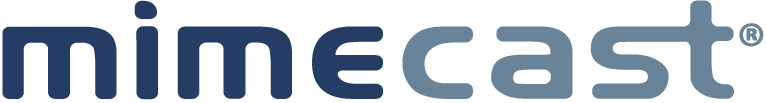


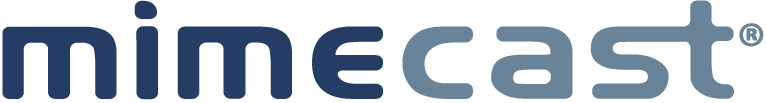

weibo.com {'status_line': '403 Forbidden', 'headers': {'Content-Length': ['4660'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:11:16 GMT'], 'X-Mc-Debug': ['OVvIcJhE+S+HtmDZS0kmJCBH1jXWbJgsmRm7bJPNt9Duh21OpcSFZdYHX9vaazBwjdeuzyiVwsWKbF3rC45yCCQ/VFdoHqaPamNZ2CJgt8s=']}, 'body': '<!DOCTYPE html><html><head><meta charset="UTF-8"><title>403 Forbidden</title><style>h1 { text-align: center; font-size: 48px; }\np { text-align: center; font-size: 18px; }\nimg { width: 200px; height: 30px; }\n</style></head><body><h1>403 Forbidden</h1><p>Unauthorized access from IP: 141.212.123.185, Unauthorized access, not a valid customer IP</p></body></html>', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIEjDCCAnSgAwIBAgIRALIxxtKMdQGH7dRbLTZ/fe0wDQYJKoZIhvcNAQELBQAwYDELMAkGA1UEBhMCVVMxHjAcBgNVBAoMFU1pbWVjYXN0IFNlcnZpY2VzIEx0ZDExMC8GA1UEAwwoUHJveHkgSW50ZXJtZWRpYXRlIENlcnRpZmljYXRlIEF1dGhvcml0eTAeFw0yMTA2MjcwMTExMTZaFw0yMTA3MDgwMTExMTZaMBQxEjAQBgNVBAMMCXdlaWJvLmNvbTCCASIwDQYJKoZIh
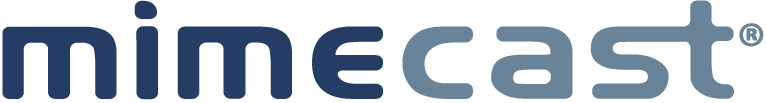


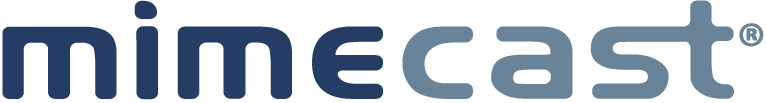

www.meetup.com {'status_line': '403 Forbidden', 'headers': {'Accept-Ranges': ['bytes'], 'Cache-Control': ['cache-control: public, max-age=0, must-revalidate'], 'Content-Length': ['0'], 'Content-Security-Policy': ["base-uri 'self'; connect-src * blob: data: ; default-src 'self' *.meetup.com *.dev.meetup.com:8001; font-src * data:; frame-ancestors 'self'; frame-src *; img-src * data: blob: ;script-src * 'unsafe-eval' 'unsafe-inline'; style-src * 'unsafe-inline'; object-src 'none'"], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:11:01 GMT'], 'Retry-After': ['0'], 'Server': ['Varnish'], 'Strict-Transport-Security': ['max-age=7776000'], 'Via': ['1.1 varnish'], 'X-Cache': ['MISS'], 'X-Cache-Hits': ['0'], 'X-Content-Type-Options': ['nosniff'], 'X-Frame-Options': ['SAMEORIGIN'], 'X-Served-By': ['cache-ams21060-AMS'], 'X-Timer': ['S1624842662.695769,VS0,VE0'], 'X-Xss-Protection': ['1; mode=block']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate'

spotify.com {'status_line': '403 Forbidden', 'headers': {'Alt-Svc': ['clear'], 'Content-Length': ['1579'], 'Content-Type': ['text/html; charset=UTF-8'], 'Referrer-Policy': ['no-referrer']}, 'body': '<!DOCTYPE html>\n<html lang=en>\n  <meta charset=utf-8>\n  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">\n  <title>Error 403 (Forbidden)!!1</title>\n  <style>\n    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:

ensonhaber.com {'status_line': '403 Forbidden', 'headers': {'Cache-Control': ['private, max-age=0, no-store, no-cache, must-revalidate, post-check=0, pre-check=0'], 'Cf-Ray': ['666306c1fbe03b1c-SJC'], 'Cf-Request-Id': ['0af1c28d3f00003b1cf82f4000000001'], 'Content-Length': ['16'], 'Content-Type': ['text/plain; charset=UTF-8'], 'Date': ['Mon, 28 Jun 2021 01:08:52 GMT'], 'Expect-Ct': ['max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"'], 'Expires': ['Thu, 01 Jan 1970 00:00:01 GMT'], 'Server': ['cloudflare'], 'X-Frame-Options': ['SAMEORIGIN']}, 'body': 'error code: 1005', 'TlsVersion': 771, 'CipherSuite': 49195, 'Certificate': 'MIIFHTCCBMOgAwIBAgIQDK3x+VsvB8xBzPUsTXjz+TAKBggqhkjOPQQDAjBKMQswCQYDVQQGEwJVUzEZMBcGA1UEChMQQ2xvdWRmbGFyZSwgSW5jLjEgMB4GA1UEAxMXQ2xvdWRmbGFyZSBJbmMgRUNDIENBLTMwHhcNMjEwNjA5MDAwMDAwWhcNMjIwNjA4MjM1OTU5WjBuMQswCQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEWMBQGA1UEBxMNU2FuIEZyYW5jaXNjbzEZMBcGA1UEChMQQ2xvdWRmbGFyZSwgSW5jLjEXMBUGA1UEA

quizizz.com {'status_line': '403 Forbidden', 'headers': {'Content-Length': ['11'], 'Content-Type': ['text/plain; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:13:51 GMT'], 'Server': ['awselb/2.0']}, 'body': 'Unavailable', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIGKjCCBRKgAwIBAgIQDNf4qrzNxmX+6dG54D8xiDANBgkqhkiG9w0BAQsFADBNMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMScwJQYDVQQDEx5EaWdpQ2VydCBTSEEyIFNlY3VyZSBTZXJ2ZXIgQ0EwHhcNMjAwOTIwMDAwMDAwWhcNMjExMDIyMDAwMDAwWjBnMQswCQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEVMBMGA1UEBxMMU2FudGEgTW9uaWNhMRQwEgYDVQQKEwtRdWl6aXp6IEluYzEWMBQGA1UEAwwNKi5xdWl6aXp6LmNvbTCCASIwDQYJKoZIhvcNAQEBBQADggEPADCCAQoCggEBAOCVidFV+5HlWqjQZZaDaDJcEFqVqcnTCMSQ7ZzExjpF89suchEeEQPUVGZLgQVDOrTG2FeIu5+Z7sWjp5ft5v3D5AtG8CRXlnV4a74hR5XIK6c/XRHbRk5KODKNDHInoaTemLW3frHAAPmikjU7IywCrnOiW+ZCXjeXN2+c9AtxQlvSa7xU/1dqGkwBy91HNO80UFYjwEhuf3jb2SG6KVHrB3HACP1KUHWPbKJCeasRif6P0kmIlDSSsP2IZkj1lZ0urVT3b21wit9wBgFGVR2oRNbTXsJ1wyv4J0HxGrTHETprHVgoirdIhQhkDLNA7DgMz+IV

statista.com {'status_line': '403 Forbidden', 'headers': {'Content-Length': ['118'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:11:54 GMT'], 'Server': ['awselb/2.0']}, 'body': '<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIF3TCCBMWgAwIBAgIQCZsaVUqqxI0cDukqMJwKpzANBgkqhkiG9w0BAQsFADBGMQswCQYDVQQGEwJVUzEPMA0GA1UEChMGQW1hem9uMRUwEwYDVQQLEwxTZXJ2ZXIgQ0EgMUIxDzANBgNVBAMTBkFtYXpvbjAeFw0yMTA2MTAwMDAwMDBaFw0yMjA3MDkyMzU5NTlaMBcxFTATBgNVBAMTDHN0YXRpc3RhLmNvbTCCASIwDQYJKoZIhvcNAQEBBQADggEPADCCAQoCggEBAIjw/tzmgHrLAMgSGTErEEo/RZxgo3C8r+khU9oXbhRzJuVPpWYCTZJQHVS3hGvf6w+Uj58yPC9brQArqeT593lt56GXpCuvJUYKMz7rZ2h81x0GAlIJJxHL5SdfiQDofmBg4gRFSxOlbSkpQur2uhjPscPcPQplhYKfeCQSc5p11EbXQReayYnRN9T2/HccqZXKDg+PoTjcOPZZGrQAMMRIUqkQ1Px3BEgyopV8yBFmosi9U8ZP53lYAnGxk/EOavwE8FJ/lScHyfP5bLdsql+cWM0YPAcPmsQpg0PgIh5oxJTm3NmJj52H5HmOuRCZ0Z1HVA64EAbvaeVsUWy

quizizz.com {'status_line': '403 Forbidden', 'headers': {'Content-Length': ['11'], 'Content-Type': ['text/plain; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:09:02 GMT'], 'Server': ['awselb/2.0']}, 'body': 'Unavailable', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIGKjCCBRKgAwIBAgIQDNf4qrzNxmX+6dG54D8xiDANBgkqhkiG9w0BAQsFADBNMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMScwJQYDVQQDEx5EaWdpQ2VydCBTSEEyIFNlY3VyZSBTZXJ2ZXIgQ0EwHhcNMjAwOTIwMDAwMDAwWhcNMjExMDIyMDAwMDAwWjBnMQswCQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEVMBMGA1UEBxMMU2FudGEgTW9uaWNhMRQwEgYDVQQKEwtRdWl6aXp6IEluYzEWMBQGA1UEAwwNKi5xdWl6aXp6LmNvbTCCASIwDQYJKoZIhvcNAQEBBQADggEPADCCAQoCggEBAOCVidFV+5HlWqjQZZaDaDJcEFqVqcnTCMSQ7ZzExjpF89suchEeEQPUVGZLgQVDOrTG2FeIu5+Z7sWjp5ft5v3D5AtG8CRXlnV4a74hR5XIK6c/XRHbRk5KODKNDHInoaTemLW3frHAAPmikjU7IywCrnOiW+ZCXjeXN2+c9AtxQlvSa7xU/1dqGkwBy91HNO80UFYjwEhuf3jb2SG6KVHrB3HACP1KUHWPbKJCeasRif6P0kmIlDSSsP2IZkj1lZ0urVT3b21wit9wBgFGVR2oRNbTXsJ1wyv4J0HxGrTHETprHVgoirdIhQhkDLNA7DgMz+IV

statista.com {'status_line': '403 Forbidden', 'headers': {'Content-Length': ['118'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:00 GMT'], 'Server': ['awselb/2.0']}, 'body': '<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIF3TCCBMWgAwIBAgIQCZsaVUqqxI0cDukqMJwKpzANBgkqhkiG9w0BAQsFADBGMQswCQYDVQQGEwJVUzEPMA0GA1UEChMGQW1hem9uMRUwEwYDVQQLEwxTZXJ2ZXIgQ0EgMUIxDzANBgNVBAMTBkFtYXpvbjAeFw0yMTA2MTAwMDAwMDBaFw0yMjA3MDkyMzU5NTlaMBcxFTATBgNVBAMTDHN0YXRpc3RhLmNvbTCCASIwDQYJKoZIhvcNAQEBBQADggEPADCCAQoCggEBAIjw/tzmgHrLAMgSGTErEEo/RZxgo3C8r+khU9oXbhRzJuVPpWYCTZJQHVS3hGvf6w+Uj58yPC9brQArqeT593lt56GXpCuvJUYKMz7rZ2h81x0GAlIJJxHL5SdfiQDofmBg4gRFSxOlbSkpQur2uhjPscPcPQplhYKfeCQSc5p11EbXQReayYnRN9T2/HccqZXKDg+PoTjcOPZZGrQAMMRIUqkQ1Px3BEgyopV8yBFmosi9U8ZP53lYAnGxk/EOavwE8FJ/lScHyfP5bLdsql+cWM0YPAcPmsQpg0PgIh5oxJTm3NmJj52H5HmOuRCZ0Z1HVA64EAbvaeVsUWy

udemy.com {'status_line': '403 Forbidden', 'headers': {'Cache-Control': ['private, max-age=0, no-store, no-cache, must-revalidate, post-check=0, pre-check=0'], 'Cf-Ray': ['666302eb4e6a1fea-AMS'], 'Cf-Request-Id': ['0af1c0270a00001feaaf3e4000000001'], 'Content-Length': ['16'], 'Content-Type': ['text/plain; charset=UTF-8'], 'Date': ['Mon, 28 Jun 2021 01:06:14 GMT'], 'Expect-Ct': ['max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"'], 'Expires': ['Thu, 01 Jan 1970 00:00:01 GMT'], 'Server': ['cloudflare'], 'Set-Cookie': ['__cf_bm=a581b1c3537c60ac3d58915205b4d1516ca90164-1624842374-1800-AeM+DM5G1MtJ9mMEwok2bPezMhx1CWaRKqFfEcGVjLN7jY5F4IUlpAY5mF9iJcw85BDw3BGMqFpYfk7oOS3SLQM=; path=/; expires=Mon, 28-Jun-21 01:36:14 GMT; domain=.udemy.com; HttpOnly; Secure; SameSite=None'], 'X-Content-Type-Options': ['nosniff'], 'X-Frame-Options': ['SAMEORIGIN']}, 'body': 'error code: 1020', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIFzzCCBLegAwIBAgIMY5Gve

In [ ]:
status = '403'
for ip, count in getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == status)].ip):
  displayFirstRow(segment[(segment.ip == ip) & (segment.cert_match == True) & (segment.https_status == status) ],
                  "https")

##### 404

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '404')].keyword)[:20]

[('atlassian.net', 3),
 ('mail.yandex.ru', 1),
 ('mileroticos.com', 1),
 ('slideshare.net', 1),
 ('www.tumblr.com', 1),
 ('apps.apple.com', 1)]

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '404')].ip)[:20]

[('104.192.137.5', 1),
 ('80.239.201.123', 1),
 ('104.192.137.4', 1),
 ('50.18.219.153', 1),
 ('108.174.11.74', 1),
 ('152.199.21.147', 1),
 ('104.192.137.3', 1),
 ('17.253.144.10', 1)]

In [ ]:
status = '404'
for ip, count in getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == status)].ip):
  displayFirstRow(segment[(segment.ip == ip) & (segment.cert_match == True) & (segment.https_status == status) ],
                  "https")

domain: atlassian.net, cert_domain: *.services.atlassian.com, {'status_line': '404 Not Found', 'headers': {'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:13:51 GMT'], 'Server': ['globaledge-envoy']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49195, 'Certificate': 'MIIFHzCCBKagAwIBAgIQCm4xp5rvnlkOEG2Q4hBfaDAKBggqhkjOPQQDAzBWMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMTAwLgYDVQQDEydEaWdpQ2VydCBUTFMgSHlicmlkIEVDQyBTSEEzODQgMjAyMCBDQTEwHhcNMjAxMjA3MDAwMDAwWhcNMjExMTI4MjM1OTU5WjB3MQswCQYDVQQGEwJBVTEYMBYGA1UECBMPTmV3IFNvdXRoIFdhbGVzMQ8wDQYDVQQHEwZTeWRuZXkxGjAYBgNVBAoTEUF0bGFzc2lhbiBQdHkgTHRkMSEwHwYDVQQDDBgqLnNlcnZpY2VzLmF0bGFzc2lhbi5jb20wWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAARmWIcWGNpwqkPwqR9DYRPbCMoxrV7idjoDz1StIpL9FYnhv4pH2m0ungcBZMkM72fGlcNUlH/Z4ZeGTSlj1LGAo4IDMzCCAy8wHwYDVR0jBBgwFoAUCrwIKReMpTlteg7OM8cus+37w3owHQYDVR0OBBYEFNOEXOBCN2lMIDtN0RhMvjEvwcBaMDsGA1UdEQQ0MDKCGCouc2VydmljZXMuYXRsYXNzaWFuLmNvbYIWc2VydmljZXMuYXRsYXNzaWFuLmNvbTAOBgNVHQ8BAf8EBAMCB4AwHQYDVR0lBBYwFAYIKwYBBQU

domain: mail.yandex.ru, cert_domain: tv-exp.ott.yandex.net, {'status_line': '404 Not found', 'headers': {'Content-Length': ['0']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIGJDCCBQygAwIBAgIQD0xo7Vhzyf6IRKYyZK4fhzANBgkqhkiG9w0BAQsFADBfMQswCQYDVQQGEwJSVTETMBEGA1UEChMKWWFuZGV4IExMQzEnMCUGA1UECxMeWWFuZGV4IENlcnRpZmljYXRpb24gQXV0aG9yaXR5MRIwEAYDVQQDEwlZYW5kZXggQ0EwHhcNMjEwMjE5MTUwNTU5WhcNMjEwODIwMTUwNTU5WjBhMQswCQYDVQQGEwJSVTEPMA0GA1UEBwwGTW9zY293MQwwCgYDVQQLDANJVE8xEzARBgNVBAoMCllhbmRleCBMTEMxHjAcBgNVBAMMFXR2LWV4cC5vdHQueWFuZGV4Lm5ldDCCASIwDQYJKoZIhvcNAQEBBQADggEPADCCAQoCggEBAOMdgkp9JYgLYwP188nJW0wz56l2kFNM6wkhkTqC0Q9mSKFQnx4tMoZwpTrGk0nkp/rqgB9387FB2Z5ARvBwEcywl04DFQlrHr//9Y7IBBAm9AnuydWMq2Y7bSaLqrVeb++QK8Q1os/mETyZDlfbwPvSFBrBik1wT8jlWOfeXh1upd3FyNy5Wgzwx/y72xn3pMuGMx056A+uG4Zuhsaz/DXksE5VXBw28xPTd+/K0Zufjh4lLyqoYjSfjxuofuKExtreGnZmadKFKkgvSrPLsJnNXGxcdZVvaOhyZHF0KGtCOKUcnkZ9PXut0VNs5hZoU0SvlUygr3FtpqOzLdmofO8CAwEAAaOCAtgwggLUMAwGA1UdEwEB/wQCMAAwaQYDVR0fBGIw

domain: atlassian.net, cert_domain: *.services.atlassian.com, {'status_line': '404 Not Found', 'headers': {'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:10:29 GMT'], 'Server': ['globaledge-envoy']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49195, 'Certificate': 'MIIFHzCCBKagAwIBAgIQCm4xp5rvnlkOEG2Q4hBfaDAKBggqhkjOPQQDAzBWMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMTAwLgYDVQQDEydEaWdpQ2VydCBUTFMgSHlicmlkIEVDQyBTSEEzODQgMjAyMCBDQTEwHhcNMjAxMjA3MDAwMDAwWhcNMjExMTI4MjM1OTU5WjB3MQswCQYDVQQGEwJBVTEYMBYGA1UECBMPTmV3IFNvdXRoIFdhbGVzMQ8wDQYDVQQHEwZTeWRuZXkxGjAYBgNVBAoTEUF0bGFzc2lhbiBQdHkgTHRkMSEwHwYDVQQDDBgqLnNlcnZpY2VzLmF0bGFzc2lhbi5jb20wWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAARmWIcWGNpwqkPwqR9DYRPbCMoxrV7idjoDz1StIpL9FYnhv4pH2m0ungcBZMkM72fGlcNUlH/Z4ZeGTSlj1LGAo4IDMzCCAy8wHwYDVR0jBBgwFoAUCrwIKReMpTlteg7OM8cus+37w3owHQYDVR0OBBYEFNOEXOBCN2lMIDtN0RhMvjEvwcBaMDsGA1UdEQQ0MDKCGCouc2VydmljZXMuYXRsYXNzaWFuLmNvbYIWc2VydmljZXMuYXRsYXNzaWFuLmNvbTAOBgNVHQ8BAf8EBAMCB4AwHQYDVR0lBBYwFAYIKwYBBQU

domain: mileroticos.com, cert_domain: *.mileroticos.com, {'status_line': '404 Not Found', 'headers': {'Content-Length': ['49535'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:08:49 GMT'], 'Etag': ['"5f9fcbf8-c17f"'], 'Server': ['nginx'], 'Vary': ['Accept-Encoding']}, 'body': '\n<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" dir="ltr"  lang="es-ES">\n<head>\n\n    <link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\n    <link rel="preload" href="https://fonts.gstatic.com/s/titilliumweb/v6/NaPecZTIAOhVxoMyOr9n_E7fdMPmDQ.woff2" as="font" type="font/woff2" crossorigin="">\n    <link rel="preload" href="https://fonts.gstatic.com/s/yanonekaffeesatz/v9/3y976aknfjLm_3lMKjiMgmUUYBs04Y8bH-o.woff2" as="font" type="font/woff2" crossorigin="">\n    <link rel="preconnect" href="https://js-agent.newrelic.com">\n    <link rel="preconnect" href="https://numbers.mileroticos.com">\n    <link rel="preconnect" href="https://certify.alexametrics.com">\n    <lin

domain: slideshare.net, cert_domain: www.slideshare.net, {'status_line': '404 Not Found on Accelerator', 'headers': {'Cache-Control': ['no-store'], 'Content-Language': ['en'], 'Content-Length': ['5530'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:48 GMT'], 'X-Li-Pop': ['prod-eda6'], 'X-Li-Proto': ['http/1.1'], 'X-Li-Uuid': ['qJ3Urp2ZjBaAIl20ECsAAA==']}, 'body': '<!-- EF of static content included-->\n<html>\n<head>\n  <title>404: Not Found</title>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n  <style type="text/css">\n/* GLOBAL */\nbody { margin: 0; padding: 0 0 10px 0; background: #FFF; color: #000; font: 82% arial, helvetica, "Nimbus Sans L", sans-serif; text-align: center; min-width: 775px; }\ntable { font-size: 100%; border: 0; }\nth { text-align: left; }\ntr.tblhdr { background: #999; }\n.helper { font-size: 85%; }\n.spacer { clear: both; line-height: 0; height: 0; _font-size: 1px; }\n.indent { margin-left: 35px; }\n.top { margin-top

domain: www.tumblr.com, cert_domain: tumblr.com, {'status_line': '404 Not Found', 'headers': {'Content-Length': ['345'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:22 GMT'], 'Server': ['ECAcc (sto/3ADC)']}, 'body': '<?xml version="1.0" encoding="iso-8859-1"?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n         "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n\t<head>\n\t\t<title>404 - Not Found</title>\n\t</head>\n\t<body>\n\t\t<h1>404 - Not Found</h1>\n\t</body>\n</html>\n', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIJCzCCB/OgAwIBAgIQBkEcF79OmhHOZnYb4xRXyTANBgkqhkiG9w0BAQsFADB1MQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMRkwFwYDVQQLExB3d3cuZGlnaWNlcnQuY29tMTQwMgYDVQQDEytEaWdpQ2VydCBTSEEyIEV4dGVuZGVkIFZhbGlkYXRpb24gU2VydmVyIENBMB4XDTIwMDcwOTAwMDAwMFoXDTIyMDQxNDEyMDAwMFowgcoxHTAbBgNVBA8MFFByaXZhdGUgT3JnYW5pemF0aW9uMRMwEQYLKwYBBAGCNzwCAQMTAlVTMRk

domain: atlassian.net, cert_domain: *.services.atlassian.com, {'status_line': '404 Not Found', 'headers': {'Content-Length': ['0'], 'Date': ['Mon, 28 Jun 2021 01:06:54 GMT'], 'Server': ['globaledge-envoy']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49195, 'Certificate': 'MIIFHzCCBKagAwIBAgIQCm4xp5rvnlkOEG2Q4hBfaDAKBggqhkjOPQQDAzBWMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMTAwLgYDVQQDEydEaWdpQ2VydCBUTFMgSHlicmlkIEVDQyBTSEEzODQgMjAyMCBDQTEwHhcNMjAxMjA3MDAwMDAwWhcNMjExMTI4MjM1OTU5WjB3MQswCQYDVQQGEwJBVTEYMBYGA1UECBMPTmV3IFNvdXRoIFdhbGVzMQ8wDQYDVQQHEwZTeWRuZXkxGjAYBgNVBAoTEUF0bGFzc2lhbiBQdHkgTHRkMSEwHwYDVQQDDBgqLnNlcnZpY2VzLmF0bGFzc2lhbi5jb20wWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAARmWIcWGNpwqkPwqR9DYRPbCMoxrV7idjoDz1StIpL9FYnhv4pH2m0ungcBZMkM72fGlcNUlH/Z4ZeGTSlj1LGAo4IDMzCCAy8wHwYDVR0jBBgwFoAUCrwIKReMpTlteg7OM8cus+37w3owHQYDVR0OBBYEFNOEXOBCN2lMIDtN0RhMvjEvwcBaMDsGA1UdEQQ0MDKCGCouc2VydmljZXMuYXRsYXNzaWFuLmNvbYIWc2VydmljZXMuYXRsYXNzaWFuLmNvbTAOBgNVHQ8BAf8EBAMCB4AwHQYDVR0lBBYwFAYIKwYBBQU

domain: apps.apple.com, cert_domain: images.apple.com, {'status_line': '404 Not Found on Accelerator', 'headers': {'Cache-Control': ['no-store'], 'Cdnuuid': ['5759d2b9-4b8e-4ff9-9f18-943ebdbff5d8-1247564689'], 'Content-Language': ['en'], 'Content-Length': ['287'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:06:53 GMT'], 'Server': ['ATS/8.1.2'], 'Via': ['http/1.1 uschi5-edge-bx-024.ts.apple.com (ApacheTrafficServer/8.1.2)'], 'X-Cache': ['none']}, 'body': '<HTML>\n<HEAD>\n<TITLE>Not Found on Accelerator</TITLE>\n</HEAD>\n\n<BODY BGCOLOR="white" FGCOLOR="black">\n<H1>Not Found on Accelerator</H1>\n<HR>\n\n<FONT FACE="Helvetica,Arial"><B>\nDescription: Your request on the host was not found.\nCheck the location and try again.\n</B></FONT>\n<HR>\n</BODY>\n', 'TlsVersion': 771, 'CipherSuite': 49195, 'Certificate': 'MIIGpTCCBkqgAwIBAgIQXmUvk2Zuels5ZlUaDBZ7qjAKBggqhkjOPQQDAjBRMQswCQYDVQQGEwJVUzETMBEGA1UEChMKQXBwbGUgSW5jLjEtMCsGA1UEAxMkQXBwbGUgUHVibGljIEVWIFNlcnZlciBFQ0MgQ0EgMS

##### 451

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '451')].ip)[:20]

[('193.58.251.11', 246)]

In [ ]:
getOrderedCount(segment[(segment.https_status == status)].ip)

[('193.58.251.11', 246),
 ('194.34.96.6', 82),
 ('194.247.191.190', 82),
 ('217.27.40.122', 80),
 ('178.218.88.14', 49),
 ('93.191.11.90', 34),
 ('5.129.186.222', 28),
 ('54.66.245.151', 10),
 ('13.55.47.48', 10),
 ('80.250.226.14', 7)]

In [ ]:
status = '451'
for ip, count in getOrderedCount(segment[(segment.https_status == status)].ip):
  displayFirstRow(segment[(segment.ip == ip) & (segment.https_status == status) ],
                  "https")

domain: bridges.torproject.org, cert_domain: bridges.torproject.org, {'status_line': '451 Unavailable For Legal Reasons', 'headers': {'Content-Length': ['2694'], 'Content-Type': ['text/html; encoding=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:13:52 GMT'], 'Server': ['SkyDNS'], 'Set-Cookie': ['_csrf=fdf4b8c3d2bf9cc8b9bfd2077d5a4f94; expires=Mon, 28 Jun 2021 01:28:52 GMT', 'sessionid=dSLgAlqRyuHzdLmPoqZEYFpxMSgLJpDH; expires=Mon, 28 Jun 2021 03:13:52 GMT; path=/; HttpOnly; secure'], 'Vary': ['Cookie']}, 'body': '\n  <!DOCTYPE html>\n  <html class="[ page ] [ \n  theme_white\n ]">\n    <head>\n      <meta charset="utf-8">\n      \n  \n    <title>\n  Настройки фильтра обновляются\n</title>\n  \n  <base href="https://cdn-b.skydns.ru/static/" target="_blank">\n  <link rel="preload stylesheet" href="css/styles.css" type="text/css" as="style">\n  <link rel="preload" href="fonts/pt/regular.ttf" type="font/ttf" as="font" crossorigin="preload anonymous">\n  <link rel="preload" href="fonts/pt/bold.ttf

domain: nyaa.si, cert_domain: zapret.local, {'status_line': '451 Unavailable For Legal Reasons', 'headers': {'Cache-Control': ['no-store, no-cache, must-revalidate'], 'Content-Length': ['3047'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:09:18 GMT'], 'Expires': ['Mon, 28 Jun 2021 04:09:18 +0300'], 'Server': ['Apache']}, 'body': '<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"><html xmlns="http://www.w3.org/1999/xhtml"><head><title>Blocked/Доступ ограничен</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><style>*{margin:0;padding:0;}html,body{height:100%;}body{font-size:14px;font-family:arial,sans-serif;background:#fff;}body div#main{position:absolute;left:0;right:0;top:0;bottom:0;margin:0 auto;}body div#main div.block{display:table;width:100%;height:100%;box-sizing:border-box;-webkit-box-sizing:border-box;-moz-box-sizing:border-box;}body div#main div.cent

domain: www.cannaweed.com, cert_domain: zapret.local, {'status_line': '451 Unavailable For Legal Reasons', 'headers': {'Cache-Control': ['no-store, no-cache, must-revalidate'], 'Content-Length': ['1814'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:09:06 GMT'], 'Expires': ['Mon, 28 Jun 2021 04:09:06 +0300'], 'Server': ['Apache']}, 'body': '<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"><html xmlns="http://www.w3.org/1999/xhtml"><head><title>Blocked/Доступ ограничен</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><style>*{margin:0;padding:0;}html,body{height:100%;}body{font-size:14px;font-family:arial,sans-serif;background:#fff;}body div#main{position:absolute;left:0;right:0;top:0;bottom:0;margin:0 auto;}body div#main div.block{display:table;width:100%;height:100%;box-sizing:border-box;-webkit-box-sizing:border-box;-moz-box-sizing:border-box;}body div#mai

domain: jw.org, cert_domain: None, {'status_line': '451 ', 'headers': {'Content-Length': ['1023'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:09:34 GMT'], 'Etag': ['"5b0e39ef-3ff"'], 'Server': ['nginx/1.10.2']}, 'body': '<html>\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n    <title>Доступ ограничен</title>\n    <!-- just for RKN util:\n    <title>Доступ ограничен</title>\n    -->\n    <style type="text/css">\n        body {\n            font-family: Helvetica, sans-serif;\n        }\n        h1 {\n            font-size: 60px;\n        }\n        p {\n            font-size: 55px;\n        }\n    </style>\n</head>\n<body>\n<table border=0 width=100% height=100%>\n    <tr valign=center>\n        <td align=center>\n            <h1>Доступ запрещён</h1><br>\n<img src="http://10.0.2.90/Queries/images/logo.png">\n            <p>Доступ к информационному ресурсу ограничен на основании Федерального закона от 27 июля 2006 г. N 149-ФЗ "Об инф

"\n Доступ запрещён\n\n Доступ к информационному ресурсу ограничен на основании Федерального закона от 27 июля 2006 г. N 149-ФЗ ""Об информации, информационных технологиях и о защите информации""\n"


domain: guardster.com, cert_domain: None, {'status_line': '451 ', 'headers': {'Content-Length': ['966'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:10:43 GMT'], 'Etag': ['"e2f2a28-3c6"'], 'Server': ['nginx/1.10.2']}, 'body': '<html>\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n    <title>Доступ ограничен</title>\n    <!-- just for RKN util:\n    <title>Доступ ограничен</title>\n    -->\n    <style type="text/css">\n        body {\n            font-family: Helvetica, sans-serif;\n        }\n        h1 {\n            font-size: 60px;\n        }\n        p {\n            font-size: 55px;\n        }\n    </style>\n</head>\n<body>\n<table border=0 width=100% height=100%>\n    <tr valign=center>\n        <td align=center>\n            <h1>Доступ запрещён</h1>\n            <p>Доступ к информационному ресурсу ограничен на основании Федерального закона от 27 июля 2006 г. N 149-ФЗ "Об информации, информационных технологиях и о защите информ

"\n Доступ запрещён\n Доступ к информационному ресурсу ограничен на основании Федерального закона от 27 июля 2006 г. N 149-ФЗ ""Об информации, информационных технологиях и о защите информации""\n"


domain: www.erowid.org, cert_domain: None, {'status_line': '451 ', 'headers': {'Content-Length': ['1745'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:09:59 GMT'], 'Etag': ['"5d67ab3c-6d1"'], 'Server': ['nginx/1.10.2']}, 'body': '<html>\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n    <title>Доступ ограничен</title>\n    <!-- just for RKN util:\n    <title>Доступ ограничен</title>\n    -->\n    <style type="text/css">\n        body {\n            font-family: Helvetica, sans-serif;\n        }\n        h1 {\n            font-size: 60px;\n        }\n        p {\n            font-size: 55px;\n        }\n    </style>\n</head>\n<body>\n<table border=0 width=100% height=100%>\n    <tr valign=center>\n        <td align=center>\n            <h1>Закрыто в России</h1>\n            <p>Доступ к данному ресурсу ограничен на территории Российской Федерации в соответствии с Федеральным законом от 27&nbsp;июля 2006&nbsp;г. №&nbsp;149-ФЗ &laquo;Об 

"\n Закрыто в России\n Доступ к данному ресурсу ограничен на территории Российской Федерации в соответствии с Федеральным законом от 27 июля 2006 г. № 149-ФЗ «Об информации, информационных технологиях и о защите информации» \nКажется, вы находитесь в России — и поэтому не можете увидеть этот сайт.\nВероятно, закрыть к нему доступ потребовал российский суд или Роскомнадзор.\nЕсли вы все-таки хотите его увидеть, вам придется покинуть территорию России или воспользоваться какими-то более простыми и доступными методами (о которых мы не имеем права вам говорить, но которые вы и без нас прекрасно знаете).\n\n"


domain: www.hotspotshield.com, cert_domain: *.2090000.ru, {'status_line': '451 ', 'headers': {'Content-Length': ['1213'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:12:08 GMT'], 'Etag': ['"5d285f8b-4bd"'], 'Server': ['nginx/1.14.0 (Ubuntu)']}, 'body': '<!DOCTYPE html>\r\n<html>\r\n<head>\r\n<meta charset="utf-8">\r\n<meta name="viewport" content="width=1024, initial-scale=1.0" />\r\n<title>Доступ к ресурсу ограничен</title>\r\n<link rel="stylesheet" href="css/style.css">\r\n<link rel="shortcut icon" href="favicon.ico" type="image/x-icon">\r\n<link href="https://fonts.googleapis.com/css?family=IBM+Plex+Sans&amp;subset=cyrillic" rel="stylesheet">\r\n</head>\r\n<body>\r\n\t\t<table class="mainTable" cellspacing="0" cellpadding="0" border="0">\r\n\t\t\t<tbody>\r\n\t\t\t\t<tr class="mainTable-content">\r\n\r\n\t\t\t\t\t<td>\r\n\t\t\t\t\t\t<div class="mainTable-content-icons">\t\r\n\t\t\t\t\t\t\t<img src="img/logo.svg" alt="" style="width: 150px;">\r\n\t\t\t\t\t\t</div>\r\n

"\r\n\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\tДоступ к ресурсу ограничен\r\n\t\t\t\t\t\tПроверить наличие доменного имени и (или) указателя страницы сайта, сетевого адреса в Едином реестре можно на сайте blocklist.rkn.gov.ru.\t\r\n\t\t\t\t\t"
""


domain: rutracker.org, cert_domain: copyrightpage.com, {'status_line': '451 ', 'headers': {'Content-Length': ['2538'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:11:44 GMT'], 'Server': ['nginx/1.10.3 (Ubuntu)']}, 'body': '<!DOCTYPE html>\n<html>\n        <head>\n        <title>Copyright Notice</title>\n        <meta name="robots" content="noindex, nofollow">\n        <style type="text/css">\nbody, td, th {\n        color: #FFFFFF;\n        font-family: Arial, Helvetica, sans-serif;\n        font-size: 22px;\n}\na:link {\n        text-decoration: none;\n}\na:visited {\n        text-decoration: none;\n        color: #FFF;\n}\na:hover {\n        text-decoration: underline;\n        color: #FFF;\n}\na:active {\n        text-decoration: none;\n        color: #FFF;\n}\nh1, h2, h3, h4, h5, h6 {\n        font-family: Georgia, "Times New Roman", Times, serif;\n}\na {\n        font-family: Arial, Helvetica, sans-serif;\n        font-size: 22px;\n        line-height: 1.2;\n     

domain: rarbg.to, cert_domain: copyrightpage.com, {'status_line': '451 ', 'headers': {'Content-Length': ['2391'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:10:23 GMT'], 'Server': ['nginx/1.14.0 (Ubuntu)']}, 'body': '<!DOCTYPE html>\n<html>\n        <head>\n        <title>Copyright Notice</title>\n        <meta name="robots" content="noindex, nofollow">\n        <style type="text/css">\nbody, td, th {\n\tcolor: #FFFFFF;\n\tfont-family: Arial, Helvetica, sans-serif;\n\tfont-size: 22px;\n}\na:link {\n\ttext-decoration: none;\n}\na:visited {\n\ttext-decoration: none;\n\tcolor: #FFF;\n}\na:hover {\n\ttext-decoration: underline;\n\tcolor: #FFF;\n}\na:active {\n\ttext-decoration: none;\n\tcolor: #FFF;\n}\nh1, h2, h3, h4, h5, h6 {\n\tfont-family: Georgia, "Times New Roman", Times, serif;\n}\na {\n\tfont-family: Arial, Helvetica, sans-serif;\n\tfont-size: 22px;\n\tline-height: 1.2;\n\tcolor: #FFF;\n}\nbody {\n\tbackground-color: #229C7A;\n}\nh1 {\n\tfont-size: 32px;\n\tletter

domain: nyaa.si, cert_domain: None, {'status_line': '451 ', 'headers': {'Content-Length': ['3180'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:51 GMT'], 'Etag': ['"5b0d5ab7-c6c"'], 'Server': ['nginx/1.10.2']}, 'body': '<html>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf8">\n  <meta http-equiv="Refresh" CONTENT="30; URL=https://blocklist.rkn.gov.ru/">\n  <head>\n    <title>Запрет доступа к запрашиваемой информации!</title>\n    <div style="display: none;">RestrictedMarker</div>\n  </head>\n  <body link="#339999" alink="#339999" vlink="#339999">\n    <font face="Arial">\n      <table height="100%" width="100%" cellspacing="0" cellpadding="5">\n        <tr>\n          <td align="center" valign="center">\n            <h1>Уважаемые пользователи!</h1>\n            <h2>Приносим Вам свои извинения, но доступ к запрашиваемому ресурсу ограничен!</h2>\n            <h3>Наиболее вероятная причина ограничения доступа:</h3>\n                Данный интернет-р

"\n Уважаемые пользователи!\n Приносим Вам свои извинения, но доступ к запрашиваемому ресурсу ограничен!\n Наиболее вероятная причина ограничения доступа:\n Данный интернет-ресурс включен Единый Реестр доменных имен, указателей страниц сайтов в сети «Интернет» и сетевых адресов, \n позволяющих идентифицировать сайты в сети «Интернет», содержащие информацию, распространение которой в Российской Федерации запрещено.\n Проверить наличие доменного имени и/или указателя страницы сайта, сетевого (IP) адреса в Едином Реестре можно на сайте: blocklist.rkn.gov.ru\n Через 30 секунд вы будете перенаправлены на сайт blocklist.rkn.gov.ru.\n \n \n Dear customers!\n We apologize, but access to the requested resource is restricted!\n The most like reason why the access is limited:\n This Internet resource included in Unified Register of domain names, indexes of pages of sites on the Internet and network addresses, \n to identify sites on the Internet, that contains information the dissemination of which is prohibited in the Russian Federation.\n You can check the presence of the domain name and/or the site page pointer, network (IP) address in the Unified Register on the website: blocklist.rkn.gov.ru\n After 30 seconds you will be redirected to the website blocklist.rkn.gov.ru blocklist.rkn.gov.ru.\n \n"
\n \n \n © 2000-2018 Complat-Telecom\n \n


##### 500

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '500')].keyword)[:20]

[('www.transparency.org', 1)]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
5306,186.2.163.219,sci-hub.tw,"{'status_line': '503 Service Unavailable', 'he...","{'status_line': '503 Service Unavailable', 'he...",True,True,None,503,True,503,MIIC2DCCAcACCQD6cDrf+5h8CTANBgkqhkiG9w0BAQsFAD...,None,None,True,DDOS-GUARD,ddos-guard,EU
40519,186.2.163.90,sci-hub.tw,"{'status_line': '503 Service Unavailable', 'he...","{'status_line': '503 Service Unavailable', 'he...",True,True,None,503,True,503,MIIC2DCCAcACCQD6cDrf+5h8CTANBgkqhkiG9w0BAQsFAD...,None,None,True,DDOS-GUARD,ddos-guard,EU
49998,190.115.31.104,www.alqassam.ps,"{'status_line': '503 Service Unavailable', 'he...","{'status_line': '503 Service Unavailable', 'he...",True,True,None,503,True,503,MIIC2DCCAcACCQD6cDrf+5h8CTANBgkqhkiG9w0BAQsFAD...,None,None,True,DDOS-GUARD,ddos-guard,EU


In [ ]:
status = '500'
for ip, count in getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == status)].ip):
  displayFirstRow(segment[(segment.ip == ip) & (segment.cert_match == True) & (segment.https_status == status) ],
                  "https")

domain: www.transparency.org, cert_domain: www.transparency.org, {'status_line': '500 Domain Not Found', 'headers': {'Accept-Ranges': ['bytes'], 'Cache-Control': ['private, no-cache'], 'Content-Length': ['261'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:09:03 GMT'], 'Retry-After': ['0'], 'Server': ['Varnish'], 'Via': ['1.1 varnish'], 'X-Served-By': ['cache-fra19123-FRA']}, 'body': '\n<html>\n<head>\n<title>Fastly error: unknown domain www.transparency.org</title>\n</head>\n<body>\n<p>Fastly error: unknown domain: www.transparency.org. Please check that this domain has been added to a service.</p>\n<p>Details: cache-fra19123-FRA</p></body></html>', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIFLzCCBBegAwIBAgISBMLowSiCtAsBX7FFmvRzp7BZMA0GCSqGSIb3DQEBCwUAMDIxCzAJBgNVBAYTAlVTMRYwFAYDVQQKEw1MZXQncyBFbmNyeXB0MQswCQYDVQQDEwJSMzAeFw0yMTAzMDkxMTUwNDZaFw0yMTA2MDcxMTUwNDZaMB8xHTAbBgNVBAMTFHd3dy50cmFuc3BhcmVuY3kub3JnMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA87I5

##### 503

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == '503')].keyword)[:20]

[('experience.arcgis.com', 1)]

In [ ]:
status = '503'
for ip, count in getOrderedCount(segment[(segment.cert_match == True) & (segment.https_status == status)].ip):
  displayFirstRow(segment[(segment.ip == ip) & (segment.cert_match == True) & (segment.https_status == status) ],
                  "https")

domain: experience.arcgis.com, cert_domain: *.arcgis.com, {'status_line': '503 Service Temporarily Unavailable', 'headers': {'Content-Length': ['162'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:06:32 GMT'], 'Server': ['awselb/2.0']}, 'body': '<html>\r\n<head><title>503 Service Temporarily Unavailable</title></head>\r\n<body>\r\n<center><h1>503 Service Temporarily Unavailable</h1></center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIGfTCCBWWgAwIBAgIQBqTolw9U6iF5S3wXHcj2CjANBgkqhkiG9w0BAQsFADBwMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMRkwFwYDVQQLExB3d3cuZGlnaWNlcnQuY29tMS8wLQYDVQQDEyZEaWdpQ2VydCBTSEEyIEhpZ2ggQXNzdXJhbmNlIFNlcnZlciBDQTAeFw0yMDA5MjIwMDAwMDBaFw0yMTEwMTMxMjAwMDBaMIGFMQswCQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTERMA8GA1UEBxMIUmVkbGFuZHMxNzA1BgNVBAoTLkVudmlyb25tZW50YWwgU3lzdGVtcyBSZXNlYXJjaCBJbnN0aXR1dGUsIEluYy4xFTATBgNVBAMMDCouYXJjZ2lzLmNvbTCCASIwDQYJKoZIhvcNAQEBBQADggEPADCCAQoCggEBAJ10atAu7l0hXqoYihcZebSn

In [ ]:
segment[(segment.https_status.isin(['500', '503'])) & (segment.https_match_blockpage == True)]#.https_matched_blockpage.unique()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
5306,186.2.163.219,sci-hub.tw,"{'status_line': '503 Service Unavailable', 'he...","{'status_line': '503 Service Unavailable', 'he...",True,True,None,503,True,503,MIIC2DCCAcACCQD6cDrf+5h8CTANBgkqhkiG9w0BAQsFAD...,None,None,True,DDOS-GUARD,ddos-guard,EU
40519,186.2.163.90,sci-hub.tw,"{'status_line': '503 Service Unavailable', 'he...","{'status_line': '503 Service Unavailable', 'he...",True,True,None,503,True,503,MIIC2DCCAcACCQD6cDrf+5h8CTANBgkqhkiG9w0BAQsFAD...,None,None,True,DDOS-GUARD,ddos-guard,EU
49998,190.115.31.104,www.alqassam.ps,"{'status_line': '503 Service Unavailable', 'he...","{'status_line': '503 Service Unavailable', 'he...",True,True,None,503,True,503,MIIC2DCCAcACCQD6cDrf+5h8CTANBgkqhkiG9w0BAQsFAD...,None,None,True,DDOS-GUARD,ddos-guard,EU


#### Cert match - Innocent IPs

Insight: real pages should have different page length

In [ ]:
#segment.loc[segment["https_status"] == "451", "https_match_blockpage"] = True
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_match_blockpage != True)].ip)[:20]

[('50.18.219.153', 294),
 ('205.139.110.211', 274),
 ('195.130.217.29', 198),
 ('5.189.169.177', 108),
 ('168.119.202.236', 108),
 ('176.31.102.224', 106),
 ('176.9.122.183', 102),
 ('208.67.216.154', 95),
 ('208.67.216.159', 82),
 ('204.110.220.2', 77),
 ('51.158.73.117', 77),
 ('146.112.203.77', 73),
 ('162.159.36.12', 63),
 ('51.15.38.199', 18),
 ('162.223.88.52', 17),
 ('185.134.23.170', 15),
 ('178.32.49.27', 13),
 ('146.112.47.233', 11),
 ('91.134.231.179', 11),
 ('146.112.47.166', 10)]

In [ ]:
#segment.loc[segment["https_status"] == "451", "https_match_blockpage"] = True
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_match_blockpage != True) & (segment.https_status == '200')].ip)[:20]

[('5.189.169.177', 108),
 ('50.18.219.153', 86),
 ('176.9.122.183', 34),
 ('168.119.202.236', 33),
 ('176.31.102.224', 32),
 ('51.158.73.117', 31),
 ('51.15.38.199', 6),
 ('176.9.122.176', 6),
 ('168.119.202.234', 5),
 ('203.5.76.48', 5),
 ('210.176.33.115', 5),
 ('162.223.88.52', 5),
 ('85.10.207.52', 4),
 ('203.106.94.144', 4),
 ('186.189.194.217', 4),
 ('82.148.119.230', 4),
 ('104.75.84.63', 4),
 ('121.119.254.131', 4),
 ('203.94.209.55', 4),
 ('175.45.42.233', 4)]

In [ ]:
segment[segment.ip == '50.18.219.153']#.https_status.unique()
segment[(segment.ip == '50.18.219.153') & (segment.https_status == '200')]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage
28523,50.18.219.153,udn.com,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '200 OK', 'headers': {'Cache-C...",True,True,None,302,True,200,MIIGhzCCBW+gAwIBAgIQBvbrZSV57ihlA1XF5ktUDTANBg...,*.udn.com,True,False,NaN
28567,50.18.219.153,www.opendns.com,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,302,True,200,MIIFMjCCBBqgAwIBAgISA6ntLAZioh6lZM1eft6zy3ZtMA...,www.opendns.com,True,False,NaN
28573,50.18.219.153,www.theatlantic.com,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,302,True,200,MIIHIjCCBgqgAwIBAgIQDv1IB8fterJABQ0uXhn1hzANBg...,www.theatlantic.com,True,False,NaN
28575,50.18.219.153,www.barnesandnoble.com,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '200 OK', 'headers': {'Cache-C...",True,True,None,302,True,200,MIIGTTCCBTWgAwIBAgIQCcoypXVPc+jYDYdqNE/EijANBg...,*.barnesandnoble.com,True,False,NaN
28577,50.18.219.153,www.nbcnews.com,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '200 OK', 'headers': {'Content...",True,True,None,302,True,200,MIIGKzCCBROgAwIBAgIQAnVNQffOakyawsSZY+KBXTANBg...,*.nbcnews.com,True,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,50.18.219.153,www.pravda.ru,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '200 OK', 'headers': {'Cache-C...",True,True,None,302,True,200,MIIGGDCCBQCgAwIBAgIQAYtQJSk0Rtbe0YwM5X6EzzANBg...,*.pravda.ru,True,False,NaN
30012,50.18.219.153,afip.gob.ar,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,302,True,200,MIIHwzCCBqugAwIBAgIQM+4+lOtvmz5RAPFZPZX+gTANBg...,www.afip.gob.ar,True,False,NaN
30096,50.18.219.153,www.cbc.ca,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '200 OK', 'headers': {'Cache-C...",True,True,None,302,True,200,MIILaTCCClGgAwIBAgIQA9vkRg/kA1E2GR2GNTEKRDANBg...,secure.cbc.ca,True,False,NaN
30098,50.18.219.153,soft98.ir,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '200 OK', 'headers': {'Alt-Svc...",True,True,None,302,True,200,MIIFXTCCBEWgAwIBAgISA87Pl2Id87hk2oaCJMwQeKCxMA...,www.static.soft98.ir,True,False,NaN


In [ ]:
ip_df = []
s = '200'
for ip in segment[(segment.cert_match == True) & (segment.https_match_blockpage != True)].ip.unique():
    page_length = segment[(segment['ip'] == ip) & (segment['https_status'] == s)].https.apply(lambda x: len(str(x))).tolist()
    if len(page_length) == 0:
        continue
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = segment[(segment['ip'] == ip) & (segment['https_status'] == s)].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    ip_df.append({'ip': ip,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,})
    
ip_df = pd.DataFrame(ip_df)


In [ ]:
ip_df[ip_df.standard_deviation == 0].sort_values('domain_count', ascending=False).head(80)

,ip,domain_count,avg_length,standard_deviation,similarity
540,109.201.135.176,2,1885.0,0.0,1.0
1713,52.85.214.125,1,69406.0,0.0,1.0
1711,177.69.235.99,1,11409.0,0.0,1.0
1710,212.58.237.247,1,68934.0,0.0,1.0
1709,23.193.169.220,1,73598.0,0.0,1.0
...,...,...,...,...,...
1601,86.51.81.178,1,11410.0,0.0,1.0
1600,177.69.235.65,1,69743.0,0.0,1.0
1599,79.140.81.104,1,71936.0,0.0,1.0
1598,104.85.248.107,1,61831.0,0.0,1.0


In [ ]:
# Sanity check: are we sure that all these pages are not blockpages?

In [ ]:
ip_df[ip_df.avg_length < 10000].sort_values('domain_count', ascending=False)

,ip,domain_count,avg_length,standard_deviation,similarity
1388,5.189.169.177,140,1625.085714,0.955728,0.999412
175,45.77.66.118,2,5617.000000,1780.494875,0.683017
540,109.201.135.176,2,1885.000000,0.000000,1.000000
515,220.181.38.149,1,4714.000000,0.000000,1.000000
569,99.86.212.45,1,3332.000000,0.000000,1.000000
574,62.33.207.196,1,3429.000000,0.000000,1.000000
1030,99.86.212.89,1,3332.000000,0.000000,1.000000
1237,99.86.212.19,1,3333.000000,0.000000,1.000000
1305,99.86.212.8,1,3333.000000,0.000000,1.000000
1937,198.102.61.236,1,6223.000000,0.000000,1.000000


In [ ]:
segment[segment.ip == '5.189.169.177']

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage
42500,5.189.169.177,coursera.org,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Connect...",True,True,None,301,True,200,MIIEIDCCAwigAwIBAgIEK1D4pDANBgkqhkiG9w0BAQsFAD...,coursera.org,True,False,NaN
42502,5.189.169.177,google.co.za,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Connect...",True,True,None,301,True,200,MIIEFjCCAv6gAwIBAgIEIuug6zANBgkqhkiG9w0BAQsFAD...,*.co.za,False,False,NaN
42504,5.189.169.177,google.co.kr,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Connect...",True,True,None,301,True,200,MIIEFjCCAv6gAwIBAgIEINa1+DANBgkqhkiG9w0BAQsFAD...,*.co.kr,False,False,NaN
42520,5.189.169.177,kickassclassical.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Connect...",True,True,None,301,True,200,MIIEMDCCAxigAwIBAgIEdCpDhzANBgkqhkiG9w0BAQsFAD...,kickassclassical.com,True,False,NaN
42522,5.189.169.177,gmarket.co.kr,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Connect...",True,True,None,301,True,200,MIIEFjCCAv6gAwIBAgIEINa1+DANBgkqhkiG9w0BAQsFAD...,*.co.kr,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43237,5.189.169.177,avaaz.org,"{'status_line': '301 Moved Permanently', 'head...","Get ""https://5.189.169.177:443/"": remote error...",True,True,None,301,False,None,None,None,None,None,NaN
43238,5.189.169.177,creditkarma.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Connect...",True,True,None,301,True,200,MIIEJjCCAw6gAwIBAgIEOFp5CzANBgkqhkiG9w0BAQsFAD...,creditkarma.com,True,False,NaN
43242,5.189.169.177,www.casinotropez.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Connect...",True,True,None,301,True,200,MIIELDCCAxSgAwIBAgIENasKWTANBgkqhkiG9w0BAQsFAD...,*.casinotropez.com,True,False,NaN
43280,5.189.169.177,haosou.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Connect...",True,True,None,301,True,200,MIIEHDCCAwSgAwIBAgIEfRDM/TANBgkqhkiG9w0BAQsFAD...,haosou.com,True,False,NaN


#### Cert match - blockpage sanity check

In [ ]:
for _, row in segment[(segment.ip == '185.134.23.173') & (segment.https_status == '200')].iterrows():
  print(row['keyword'], row['cert_domain'], row['https'])

ocsp.comodoca.com *.ssl.hwcdn.net {'status_line': '200 OK', 'headers': {'Cache-Control': ['no-store, no-cache, max-age=0, must-revalidate, private,  max-stale=0, post-check=0, pre-check=0'], 'Content-Length': ['5'], 'Content-Type': ['application/ocsp-response'], 'Date': ['Mon, 28 Jun 2021 01:07:24 GMT'], 'Server': ['Apache'], 'X-Hw': ['1624842444.cds079.lo4.hn,1624842444.cds082.lo4.sc,1624842444.cds082.lo4.p'], 'X-Ocsp-Responder-Id': ['mcdpcaocsp4']}, 'body': '0\x03\n\x01\x01', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIGNTCCBR2gAwIBAgIQdJ91I9ynqnIt2cTPmVnp5zANBgkqhkiG9w0BAQsFADCBjzELMAkGA1UEBhMCR0IxGzAZBgNVBAgTEkdyZWF0ZXIgTWFuY2hlc3RlcjEQMA4GA1UEBxMHU2FsZm9yZDEYMBYGA1UEChMPU2VjdGlnbyBMaW1pdGVkMTcwNQYDVQQDEy5TZWN0aWdvIFJTQSBEb21haW4gVmFsaWRhdGlvbiBTZWN1cmUgU2VydmVyIENBMB4XDTIwMDEwMjAwMDAwMFoXDTIyMDExOTIzNTk1OVowGjEYMBYGA1UEAwwPKi5zc2wuaHdjZG4ubmV0MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAxqpUyOvgPCbjZH8Tgzkk++3sLxtAwh43OVJSLPAba8tnLf80w7CzlmSUewGVCrksO6tkxNI3p7JC1iTb

In [ ]:
displayFirstRow(segment[(segment.ip == '159.255.26.69') & (segment.https_status == '200')], 
                'https')
segment[(segment.ip == '159.255.26.69') & (segment.https_status == '200')].cert_domain.unique()

www.freeservers.com {'status_line': '200 OK', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['2036'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:34 GMT'], 'Etag': ['"6083e080-7f4"'], 'Last-Modified': ['Sat, 24 Apr 2021 09:10:24 GMT'], 'Server': ['nginx']}, 'body': '<body>\n<!-- Yandex.Metrika counter -->\n<div style="display:none;"><script type="text/javascript"> (function(w, c) {\n     (w[c] = w[c] || []).push(function() {\n         try {\n             w.yaCounter9542920 = new Ya.Metrika({id:9542920,enableAll: true});\n         }\n         catch(e) { }\n     });\n})(window, "yandex_metrika_callbacks");\n</script></div>\n<script src="//mc.yandex.ru/metrika/watch.js" type="text/javascript" defer="defer"></script>\n<noscript><div><img src="//mc.yandex.ru/watch/9542920"\nstyle="position:absolute; left:-9999px;" alt="" /></div></noscript>\n<!-- /Yandex.Metrika counter -->\n<!-- Yandex.Metrika counter -->\n<script type="text/javascript" >\n   (function(m,e,t

array(['blockpage.cair.ru'], dtype=object)

### Certificate parsing error

In [ ]:
ip_candidates = ip_df[ip_df.standard_deviation == 0].sort_values('domain_count', ascending=False).head(20).ip.unique()
ip2domain_count = dict(zip(ip_df.ip, ip_df.domain_count))
for ip in ip_candidates:
  print(f"{ip}, {ip2domain_count[ip]}, Certificate Common Names: {segment[(segment.ip == ip) & (segment.https_status == '200')].cert_domain.unique()}")

159.255.26.69, 399, Certificate Common Names: ['blockpage.cair.ru']
212.1.226.59, 329, Certificate Common Names: []
80.87.199.46, 301, Certificate Common Names: []
159.65.107.38, 297, Certificate Common Names: ['yt33.cf']
45.77.186.255, 296, Certificate Common Names: []
86.57.224.86, 283, Certificate Common Names: ['86.57.224.82']
103.153.190.250, 203, Certificate Common Names: ['internetpositif.winet.net.id']
62.213.11.249, 171, Certificate Common Names: ['TW']
195.186.208.170, 169, Certificate Common Names: ['i-dnsn-blocko-1.sharedit.ch']
103.247.216.203, 154, Certificate Common Names: ['block.hsp.net.id']
121.166.148.201, 141, Certificate Common Names: ['WIN-1734Q9U36AT']
202.137.1.74, 125, Certificate Common Names: []
103.126.86.6, 125, Certificate Common Names: ['ns1.rasibintang.net.id']
202.169.44.80, 125, Certificate Common Names: []
103.148.28.29, 125, Certificate Common Names: []
202.152.4.67, 124, Certificate Common Names: []
176.103.130.135, 120, Certificate Common Names: ['

In [ ]:
unique_certs =list(filter(None, segment.cert.unique().tolist()))

for cert in unique_certs:
  suc, res = getCommonName(cert)
  if suc == 0:
    print(suc, res)
  elif suc == -1:
    try:
      print(suc, res.subject.get_attributes_for_oid(NameOID.ORGANIZATION_NAME)[0].value)
    except:
      print(suc, res)


# here we can see the ones failed to parse all belong to Russia
# Might be because of custom CA: https://github.com/pyca/cryptography/issues/4085
# These Russian Certificate only have country infomation in the issuer section

0 ['beta.ifad.org', 'ifad.org', 'maintenance.ifad.org', 'treasury.ifad.org', 'www.ifad.org']
-1 WatchGuard Technologies, Inc.
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 ddos-guard
-1 Internet Widgits Pty Ltd
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 Softion
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 <Certificate(subject=<Name(C=\ \ )>, ...)>
-1 Yuginterseti Ltd
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 Internet Widgits Pty Ltd
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 <Certificate(subject=<Name(C=RU)>, ...)>
-1 <Certificate(subject=<Name(C=RU)>, ...)>


### Cert mismatch

In [ ]:
segment[segment.cert_match == False].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage
2,151.101.130.217,theintercept.com,"{'status_line': '500 Domain Not Found', 'heade...","{'status_line': '500 Domain Not Found', 'heade...",True,True,None,500,True,500,MIIGETCCBPmgAwIBAgIMICiKx3BOxSYJtUpEMA0GCSqGSI...,e.sni.fastly.net,False,False,NaN
5,104.27.195.88,www.siecus.org,"{'status_line': '409 Conflict', 'headers': {'C...","{'status_line': '403 Forbidden', 'headers': {'...",True,True,None,409,True,403,MIIEmDCCBD6gAwIBAgIQARL+f8gjMx1CNn0yP+Mv4DAKBg...,ssl382603.cloudflaressl.com,False,False,NaN
6,104.17.160.60,www.datpiff.com,EOF,"{'status_line': '403 Forbidden', 'headers': {'...",True,False,EOF,None,True,403,MIIFMzCCBNigAwIBAgIQCv/YpVzVoB8EdhS8QvEa0TAKBg...,ssl761569.cloudflaressl.com,False,False,NaN
8,83.222.126.242,www.4shared.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '302 Moved Temporarily', 'head...",True,True,None,301,True,302,MIIFLTCCBBWgAwIBAgISA2+iDG0OgoRuPUgZGWbB2jjmMA...,2shared.com,False,False,NaN
15,207.194.199.88,elpais.com,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '302 Moved Temporarily', 'head...",True,True,None,302,True,302,MIIOFzCCDP+gAwIBAgISBH26UAqJpHEs0f6FpFmixxMFMA...,prisa.cdn.arcpublishing.com,False,False,NaN


In [ ]:
segment[segment.cert_match == False].https_status.unique()

array(['500', '403', '302', '200', '400', '301', '404', '502', '503',
       '406', '421', '308', '418', '401', '307', '410', '700', '451',
       '464', '204', '508', '303'], dtype=object)

In [ ]:
mismatch_cert_domains = segment[(segment.cert_match == False) & (segment.https_status == '200')].cert_domain.unique().tolist()

In [ ]:
for domain in sorted(mismatch_cert_domains):
  print(domain)
print(len(mismatch_cert_domains))

# *.prod.iad2.secureserver.net keyword: secure, block, dns, illegal, 
# internetpositif.id, internetpositif.winet.net.id 


*.arubabusiness.it
*.avantel.ru
*.balticom.lv
*.beeg.com
*.biobiochile.cl
*.cloud.microstrategy.com
*.co.id
*.co.jp
*.co.kr
*.co.th
*.co.ve
*.co.za
*.com.ar
*.com.au
*.com.br
*.com.cn
*.com.mx
*.com.pk
*.com.tr
*.com.tw
*.com.ve
*.com.vn
*.cyon.net
*.d.ssl.fastly.net
*.dansknet.dk
*.dexterchaney.com
*.ecer.com
*.edf.org
*.electricembers.net
*.eqxiu.com
*.facebook.com
*.fdibenchmark.com
*.gamingcommission.be
*.go-text.me
*.google.com
*.gridserver.com
*.gutenberg.org
*.hoplite.io
*.hypernet.co.id
*.inbox.com
*.itb.ac.id
*.iyiou.com
*.keptprivate.com
*.laodong.vn
*.lxlabs.com
*.lycos.com
*.metrasat.co.id
*.mivamerchant.net
*.myserverhosts.com
*.naukanet.ru
*.npr.org
*.ntdtv.com
*.ok.ru
*.overdrive.com
*.pacyworld.com
*.prod.iad2.secureserver.net
*.prod.phx3.secureserver.net
*.secure-secure.uk
*.secure.hostingprod.com
*.securenym.net
*.senselan.ch
*.services.belgium.be
*.sindonews.com
*.ssl.hwcdn.net
*.stackexchange.com
*.thedeluxepapercompany.com.au
*.turk.net
*.twimg.com
*.uberspace.de
*

#### HTTP blockpage?

In [ ]:
segment[(segment.cert_match == False) & (segment.http_match_blockpage == True)].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,http_match_blockpage,http_matched_blockpage
1880,94.140.14.35,sfsi.org,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIFPTCCBMSgAwIBAgIQDxFJ6x/Wdd+SFTl96cGyBTAKBg...,dns.adguard.com,False,True,blocking-pages - Blocking pages for AdGuard pr...,DigiCert Inc,US,True,blocking-pages - Blocking pages for AdGuard pr...
1882,94.140.14.35,bongacams.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIFPTCCBMSgAwIBAgIQDxFJ6x/Wdd+SFTl96cGyBTAKBg...,dns.adguard.com,False,True,blocking-pages - Blocking pages for AdGuard pr...,DigiCert Inc,US,True,blocking-pages - Blocking pages for AdGuard pr...
1886,94.140.14.35,goaskalice.columbia.edu,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIFPTCCBMSgAwIBAgIQDxFJ6x/Wdd+SFTl96cGyBTAKBg...,dns.adguard.com,False,True,blocking-pages - Blocking pages for AdGuard pr...,DigiCert Inc,US,True,blocking-pages - Blocking pages for AdGuard pr...
1888,94.140.14.35,pornhub.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIFPTCCBMSgAwIBAgIQDxFJ6x/Wdd+SFTl96cGyBTAKBg...,dns.adguard.com,False,True,blocking-pages - Blocking pages for AdGuard pr...,DigiCert Inc,US,True,blocking-pages - Blocking pages for AdGuard pr...
1893,94.140.14.35,thepiratebay.org,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIFPTCCBMSgAwIBAgIQDxFJ6x/Wdd+SFTl96cGyBTAKBg...,dns.adguard.com,False,True,blocking-pages - Blocking pages for AdGuard pr...,DigiCert Inc,US,True,blocking-pages - Blocking pages for AdGuard pr...


In [ ]:
getOrderedCount(segment[(segment.cert_match == False) & (segment.http_match_blockpage == True)].cert_org)

[('GlobalSign nv-sa', 1265),
 ("Let's Encrypt", 771),
 ('DigiCert Inc', 348),
 ('BELTELECOM', 283),
 ('GoDaddy.com, Inc.', 234),
 ('SwissSign AG', 210),
 ('TW', 171),
 ('Any', 164),
 ('Sectigo Limited', 132),
 ('COMODO CA Limited', 87),
 ('Ð\x9eÐ\x9eÐ\x9e Ð\x92ÐµÐ»Ð»ÐµÑ\x81 Ð¢ÐµÐ»ÐµÐºÐ¾Ð¼', 80),
 ('Ð®Ð\x9cÐ\x9eÐ¡ Ð¦Ð\x95Ð\x9dÐ¢Ð\xa0', 80),
 ('SPbSC RAS', 80),
 ('XX', 73),
 ('MT', 70),
 ('WatchGuard', 36),
 ('Unizeto Technologies S.A.', 31),
 ('QuoVadis Limited', 22),
 ('MELT-Internet', 21),
 ('Telsy SpA', 17),
 ('MFP', 11),
 ('SomeOrganization', 8),
 ('QuoVadis Trustlink B.V.', 7),
 ('MyCompany', 4),
 ('A1', 3),
 ('Internet Widgits Pty Ltd', 3)]

In [ ]:
segment[(segment.cert_match == False) & (segment.http_match_blockpage == True) & (segment.cert_org == 'BELTELECOM')]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,http_match_blockpage,http_matched_blockpage
58705,86.57.224.86,thecoolposts.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIDpDCCAoygAwIBAgIJAPgnkNF8/T5DMA0GCSqGSIb3DQ...,86.57.224.82,False,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...,BELTELECOM,BY,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...
58706,86.57.224.86,kizlarsoruyor.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIDpDCCAoygAwIBAgIJAPgnkNF8/T5DMA0GCSqGSIb3DQ...,86.57.224.82,False,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...,BELTELECOM,BY,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...
58707,86.57.224.86,www.eurogrand.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIDpDCCAoygAwIBAgIJAPgnkNF8/T5DMA0GCSqGSIb3DQ...,86.57.224.82,False,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...,BELTELECOM,BY,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...
58708,86.57.224.86,www.dcaa.mil,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIDpDCCAoygAwIBAgIJAPgnkNF8/T5DMA0GCSqGSIb3DQ...,86.57.224.82,False,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...,BELTELECOM,BY,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...
58709,86.57.224.86,www.xvideos.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIDpDCCAoygAwIBAgIJAPgnkNF8/T5DMA0GCSqGSIb3DQ...,86.57.224.82,False,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...,BELTELECOM,BY,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59343,86.57.224.86,www.whs.mil,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIDpDCCAoygAwIBAgIJAPgnkNF8/T5DMA0GCSqGSIb3DQ...,86.57.224.82,False,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...,BELTELECOM,BY,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...
59349,86.57.224.86,www.birthcontrol.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIDpDCCAoygAwIBAgIJAPgnkNF8/T5DMA0GCSqGSIb3DQ...,86.57.224.82,False,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...,BELTELECOM,BY,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...
59352,86.57.224.86,www.appzplanet.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIDpDCCAoygAwIBAgIJAPgnkNF8/T5DMA0GCSqGSIb3DQ...,86.57.224.82,False,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...,BELTELECOM,BY,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...
59353,86.57.224.86,www.nifty.org,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,200,MIIDpDCCAoygAwIBAgIJAPgnkNF8/T5DMA0GCSqGSIb3DQ...,86.57.224.82,False,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...,BELTELECOM,BY,True,Доступ да запытанага вамі Інтэрнэт-рэсурса заб...


#### Blockpages/Certificate that indicates blocking

In [ ]:
segment[(segment.cert_match == False) & (segment.https_match_blockpage == True)].cert_domain.unique()
# 213.177.28.90 - Romania

array(['dns.adguard.com', '*.turk.net', '*.barnesandnoble.com',
       'block.vit-net.ru', 'bloqueo.ice.co.cr', 'www.rockstargames.com',
       'sinsa.com.ni', 'web-block', 'kpprc-mwbs.kpprc.edu.tw', 'att.com',
       'gd.spbrc.ru', '*.balticom.lv', '*.avantel.ru', 'dpi',
       'blinds.homedepotdev.com', 'forbidden.citytelecom.ru',
       'stats.defense.gov', 'dnsft.cloud.zyxel.com', 'internetpositif.id',
       'rkn.mega-com.ru', '*.rtl2.de', 'www.opentable.com',
       '*.proxify.com', 'embed.france24.com', 'san5.here.com',
       'sglyncwebext.ocbc.com', '*.gamingcommission.be',
       'internetpositif.winet.net.id', 'staging.fendi.com',
       'block.myrepublic.co.id', 'sinkhole.telsy.com', 'zabrana.mts.rs',
       'commerce.inditex.com', 'www.afrc.af.mil', 'localhost.localdomain',
       'lintasjaya.net', 'ns1.rasibintang.net.id', 'dnssehat.ltn.net.id',
       'block.hsp.net.id', 'europa.eu', 'www.tvicb.com', 'zapret.local',
       'leggmason.com', '1blocked.compnet.ru', 'SRVMINT

In [ ]:
print(calCertSimilarity('illegal.mdes.go.th', '200'))
for _, row in segment[segment.cert_domain == 'illegal.mdes.go.th'].iterrows():
  print(row['https'])
  break

{'cert': 'illegal.mdes.go.th', 'domain_count': 6, 'avg_length': 2421.0, 'standard_deviation': 0.0, 'similarity': 1.0}
{'status_line': '200 OK', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['104'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:05:20 GMT'], 'Etag': ['"5f574212-68"'], 'Last-Modified': ['Tue, 08 Sep 2020 08:34:26 GMT'], 'Server': ['nginx/1.16.1']}, 'body': '<html>\n<body>\n<div align="center">\n<img src="mdes.jpg" width="800" height="700">\n</div>\n</body>\n</html>\n', 'TlsVersion': 771, 'CipherSuite': 49172, 'Certificate': 'MIIFuzCCBKOgAwIBAgIMPNFKlCdJnUDWIIsqMA0GCSqGSIb3DQEBCwUAMEwxCzAJBgNVBAYTAkJFMRkwFwYDVQQKExBHbG9iYWxTaWduIG52LXNhMSIwIAYDVQQDExlBbHBoYVNTTCBDQSAtIFNIQTI1NiAtIEcyMB4XDTIwMDkyNDA0MTgyOVoXDTIxMTAyNjA0MTgyOVowHTEbMBkGA1UEAxMSaWxsZWdhbC5tZGVzLmdvLnRoMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA2eV+e+Y9K+c8Xi3b6nW9orq9LAHSphog8EUqrjpfOwUAzkh0rboAV4LeG0LoaTLHkpii9XJcINe7r7KaH5HNs7PpaRAdRpEOjbQ61YfoyIyMEadTJRXlQ6OrVfanK9XKlI4Uo/WVev0

In [ ]:
# segment.cert_domain = segment.cert_domain.apply(lambda x: str(x))
cert_domain_df = []
for domain in segment[(segment.cert_match == False) & (segment.https_match_blockpage == False)].cert_domain.unique():
  domain_info = calCertSimilarity(domain, '200')
  if not domain_info:
    #print(f"Nonetype: {domain}")
    continue
  cert_domain_df.append(domain_info)
  if domain_info['domain_count'] > 1 and domain_info['similarity'] == 1:
    print(domain)
cert_domain_df = pd.DataFrame(cert_domain_df)
# Check it tomorrow - 2022-03-30

yy.com
cupertinofood.com
cryptonomicon.us
www.stackssl.com
yt33.cf
*.electricembers.net
*.services.belgium.be
*.overdrive.com
blockpage.cair.ru
www.fark.com
localhost.localdomain
WIN-1734Q9U36AT
*.thedeluxepapercompany.com.au
*.zhibo8.cc
internetpositif.id
*.myserverhosts.com
*.securenym.net
illegal.mdes.go.th
defcon.org
*.co.kr
*.co.jp
*.com.cn
*.com.tw
*.com.br
*.co.id
*.com.ar
*.com.tr
*.keptprivate.com
rallystageteam.co.uk
*.laodong.vn
*.cloud.microstrategy.com
Fireware web CA
submission.org
*.pacyworld.com
espiv.net
bucer.org
web
pekon.pesisirbaratkab.go.id
*.prod.phx3.secureserver.net


In [ ]:
cert_domain_df[cert_domain_df.similarity == 1].sort_values('domain_count', ascending=False).head(20)

,cert,domain_count,avg_length,standard_deviation,similarity
27,yt33.cf,297,19814.0,0.0,1.0
62,WIN-1734Q9U36AT,141,87826.0,0.0,1.0
207,pekon.pesisirbaratkab.go.id,109,2003.0,0.0,1.0
76,internetpositif.id,63,16574.0,0.0,1.0
54,blockpage.cair.ru,40,4210.0,0.0,1.0
186,Fireware web CA,36,2282.0,0.0,1.0
128,illegal.mdes.go.th,6,2421.0,0.0,1.0
139,*.com.cn,6,1615.0,0.0,1.0
138,*.co.jp,5,1611.0,0.0,1.0
173,rallystageteam.co.uk,5,41447.0,0.0,1.0


In [ ]:
printFirstRow(segment[(segment.cert_domain == '*.com.cn') & (segment.https_status == '200')], 'https')
#displayFirstRow(segment[(segment.cert_domain == 'pekon.pesisirbaratkab.go.id') & (segment.https_status == '200')], 'https')


domain: zcool.com.cn, cert_domain: *.com.cn, {'status_line': '200 OK', 'headers': {'Connection': ['keep-alive'], 'Content-Length': ['0'], 'Content-Type': ['text/html; charset=UTF-8']}, 'body': '', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIEGDCCAwCgAwIBAgIEJeSwPDANBgkqhkiG9w0BAQsFADCCAVkxCzAJBgNVBAYTAkRFMQ8wDQYDVQQIEwZCYXllcm4xFDASBgNVBAcTC09kZWx6aGF1c2VuMR0wGwYDVQQKExRrZXdlb24gUHJpdmFjeSBDbG91ZDEZMBcGA1UECxMQUEtJIFNlcnZpY2UgVGVhbTEeMBwGA1UEAxMVa2V3ZW9uIEFkQmxvY2sgUm9vdENBMSAwHgYJKoZIhvcNAQkBFhFwa2lAa2V3ZW9uLmNlbnRlcjEWMBQGCgmSJomT8ixkARkWBmNlbnRlcjEWMBQGCgmSJomT8ixkARkWBmtld2VvbjEQMA4GA1UEKhMHVG9yc3RlbjEPMA0GA1UEBBMGSmFobmtlMR4wHAYDVQQMExVrZXdlb24gQWRCbG9jayBSb290Q0ExNDAyBgNVBA0TK2tld2VvbiBBZEJsb2NrIFJvb3QgQ2VydGlmaWNhdGlvbiBBdXRob3JpdHkwHhcNMjEwMzA5MDE1MzEzWhcNMjIwNDA5MDE1MzEzWjATMREwDwYDVQQDDAgqLmNvbS5jbjCCASIwDQYJKoZIhvcNAQEBBQADggEPADCCAQoCggEBAOOe3Bk3aRC+3wqCnQfoC4xk+tOssw3c3oeAi/wmThUKXO4rM964EkoLnEtkzg0ZnzsPvF2b79rmcC5/2S6lfrhPYeA9RsxcRiMIKj02OgOwt5d8fNWGx2VkPQ

In [ ]:
all_certs = list(filter(None, segment.cert.unique().tolist()))
len(all_certs)

3096

#### Issuer indicating blocking

In [ ]:
def sortColumnUnique(series):
  return sorted(list(filter(None, series.unique().tolist())))

In [ ]:
sortColumnUnique(segment['cert_org'])

['A1',
 'Acme Co',
 'Actalis S.p.A.',
 'Amazon',
 'Any',
 'Apache HTTP Server',
 'Apple Inc.',
 'BELTELECOM',
 'Beijing Knownsec Information Technology Co., Ltd',
 'CJCS TransTeleCom',
 'COMODO CA Limited',
 'Cablenet Comm. Systems Ltd.',
 'Cisco',
 'Cloudflare, Inc.',
 'Corporation Service Company',
 'Cybertrust Japan Co., Ltd.',
 'DHIMYOTIS',
 'DNSFilter',
 'DigiCert Inc',
 'DigiCert, Inc.',
 'DreamHost',
 'Entrust, Inc.',
 'GEANT Vereniging',
 'Gandi',
 'GeoTrust Inc.',
 'GeoTrust, Inc.',
 'GlobalSign nv-sa',
 'GoDaddy.com, Inc.',
 'GoGetSSL',
 'Google Trust Services',
 'Google Trust Services LLC',
 'Greenhost',
 'Hellenic Academic and Research Institutions Cert. Authority',
 'Hoplite Industries, Inc.',
 'HydrantID (Avalanche Cloud Corporation)',
 'Internet Widgits Pty Ltd',
 'Internet2',
 'LGI',
 'LeaseWeb CDN B.V.',
 "Let's Encrypt",
 'MELT-Internet',
 'MFP',
 'MT',
 'Microsoft Corporation',
 'Mimecast Services Ltd',
 'Ministry of Truth',
 'MyCompany',
 'NetAlerts',
 'Network Solu

In [ ]:
printFirstRow(segment[segment.cert_org == '行政院'], 'https')

domain: xvideos.com, cert_domain: twb.moe.edu.tw, {'status_line': '302 Found', 'headers': {'Content-Length': ['216'], 'Content-Type': ['text/html; charset=iso-8859-1'], 'Date': ['Mon, 28 Jun 2021 01:09:01 GMT'], 'Location': ['https://twb.moe.edu.tw/deny.html'], 'Server': ['Apache']}, 'body': '<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>302 Found</title>\n</head><body>\n<h1>Found</h1>\n<p>The document has moved <a href="https://twb.moe.edu.tw/deny.html">here</a>.</p>\n</body></html>\n', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIHVTCCBT2gAwIBAgIQOCT7YI3k6LlGo82i+S185zANBgkqhkiG9w0BAQsFADBYMQswCQYDVQQGEwJUVzESMBAGA1UECgwJ6KGM5pS/6ZmiMTUwMwYDVQQDDCzmlL/lupzkvLrmnI3lmajmlbjkvY3mhpHorYnnrqHnkIbkuK3lv4MgLSBHMTAeFw0yMDAyMDYwOTEyNTJaFw0yMjAyMDYwOTEyNTJaMF8xCzAJBgNVBAYTAlRXMQ8wDQYDVQQHDAboh7rngaMxEjAQBgNVBAoMCeihjOaUv+mZojESMBAGA1UECwwJ5pWZ6IKy6YOoMRcwFQYDVQQDDA50d2IubW9lLmVkdS50dzCCASIwDQYJKoZIhvcNAQEBBQADggEPADCCAQoCggEBAKBs7BxEK7ZMUjWHr24jGR7jAlB

In [ ]:
redirect_df = segment[segment.https_status.isin(['301', '302', '303', '308'])]

In [ ]:
redirect_df['redirect_match'] = redirect_df.apply(lambda x: checkRedirect(x.keyword, x.https), axis=1)
getOrderedCount(redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == True)].ip)[:30]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# If there cases where certicate common name matches but headers.Location mismatch?
getOrderedCount(redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == True)].ip)[:30]

[('204.110.220.2', 77),
 ('50.18.219.153', 8),
 ('176.31.102.224', 4),
 ('168.119.202.236', 4),
 ('51.158.73.117', 3),
 ('176.9.122.183', 2),
 ('104.72.252.52', 1),
 ('149.210.158.185', 1),
 ('185.177.54.9', 1),
 ('51.15.38.199', 1),
 ('185.177.54.1', 1),
 ('23.53.224.35', 1),
 ('178.32.49.27', 1),
 ('23.216.17.35', 1),
 ('185.134.23.170', 1),
 ('23.216.22.56', 1),
 ('89.249.66.40', 1),
 ('185.134.23.173', 1),
 ('54.92.76.223', 1),
 ('54.172.28.123', 1),
 ('91.134.231.179', 1)]

In [ ]:
getOrderedCount(redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == True)].cert_org)[:30]

[('Securly, Inc', 77),
 ('DigiCert Inc', 11),
 ('Sectigo Limited', 8),
 ('Entrust, Inc.', 4),
 ('GlobalSign nv-sa', 4),
 ("Let's Encrypt", 3),
 ('Google Trust Services LLC', 3),
 ('COMODO CA Limited', 1),
 ('Google Trust Services', 1),
 ('Amazon', 1)]

In [ ]:
def flattenList(l):
  return [x[0] for x in l]

for org, count in getOrderedCount(redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == True)].cert_org):
  print(org)
  locations = redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == True) & (redirect_df.cert_org == org)].https.apply(lambda x: x['headers']['Location']).tolist()
  locations = flattenList(locations)
  print(org, set([tld(domain) for domain in locations]), len(locations), len(locations)/len(set([tld(domain) for domain in locations])), '\n')

Securly, Inc
Securly, Inc {'securly'} 77 77.0 

DigiCert Inc
DigiCert Inc {'ionos', '', 'smotrim', 'americorps', 'churchofjesuschrist'} 11 2.2 

Sectigo Limited
Sectigo Limited {'', 'senseicbdoil', 'noip'} 8 2.6666666666666665 

Entrust, Inc.
Entrust, Inc. {'servicenow'} 4 4.0 

GlobalSign nv-sa
GlobalSign nv-sa {''} 4 4.0 

Let's Encrypt
Let's Encrypt {'', 'weedmaps', 'wfrtds'} 3 1.0 

Google Trust Services LLC
Google Trust Services LLC {'google'} 3 3.0 

COMODO CA Limited
COMODO CA Limited {'zotonic'} 1 1.0 

Google Trust Services
Google Trust Services {'google'} 1 1.0 

Amazon
Amazon {''} 1 1.0 



In [ ]:
redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == True) & (redirect_df.cert_org == 'Entrust, Inc.')].https.apply(lambda x: x['headers']['Location']).tolist()

[['https://www.servicenow.com/'],
 ['https://www.servicenow.com/'],
 ['https://www.servicenow.com/'],
 ['https://www.servicenow.com/']]

In [ ]:
getOrderedCount(redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == True) & (redirect_df.cert_org == 'DigiCert Inc')].ip)

[('50.18.219.153', 4),
 ('104.72.252.52', 1),
 ('185.177.54.9', 1),
 ('185.177.54.1', 1),
 ('23.53.224.35', 1),
 ('23.216.17.35', 1),
 ('23.216.22.56', 1),
 ('54.172.28.123', 1)]

In [ ]:
redirect_mismatch = set(redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == False) & (~redirect_df.cert.isnull())].cert_org.unique())
redirect_match = set(redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == True)].cert_org.unique())
redirect_mismatch = redirect_mismatch - redirect_match
redirect_mismatch

{'Apple Inc.',
 'CJCS TransTeleCom',
 'Cablenet Comm. Systems Ltd.',
 'Cloudflare, Inc.',
 'Gandi',
 'GoDaddy.com, Inc.',
 'Internet2',
 'LGI',
 'Ministry of Truth',
 'MyCompany',
 None,
 'RU-Center (ЗАО Региональный Сетевой Информационный Центр)',
 'Starfield Technologies, Inc.',
 'Telecomitalia S.p.A.',
 'Terrecablate Reti e Servizi srl',
 'WESTCALL',
 'cPanel, Inc.',
 '行政院'}

In [ ]:
len(redirect_mismatch)

18

In [ ]:
for org in redirect_mismatch:
  if not org:
    continue
  print(org)
  locations = redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == False) & (redirect_df.cert_org == org)].https.apply(lambda x: x['headers']['Location']).tolist()
  locations = flattenList(locations)
  print(locations)
  print(set([tld(domain) for domain in locations]), len(locations), len(locations)/len(set([tld(domain) for domain in locations])), '\n')

CJCS TransTeleCom
['http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.ttk.ru', 'http://fz139.t

In [ ]:
for org in redirect_mismatch:
  if not org:
    continue

  locations = redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == False) & (redirect_df.cert_org == org)].https.apply(lambda x: x['headers']['Location']).tolist()
  locations = flattenList(locations)
  ratio = len(locations)/len(set([tld(domain) for domain in locations]))
  if ratio > 5:
    print(f"cert_org={org}, redirect={locations[0]},  ratio={ratio}")

cert_org=CJCS TransTeleCom, redirect=http://fz139.ttk.ru,  ratio=156.0
cert_org=行政院, redirect=https://twb.moe.edu.tw/deny.html,  ratio=23.0
cert_org=MyCompany, redirect=http://comnetz.iconpln.co.id/web/58y3nime91twk6cs,  ratio=66.0
cert_org=Terrecablate Reti e Servizi srl, redirect=http://aams.terrecablate.it,  ratio=15.0


In [ ]:
printFirstRow(redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == False) & (redirect_df.cert_org == 'CJCS TransTeleCom')], 'https')
printFirstRow(redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == False) & (redirect_df.cert_org == '行政院')], 'https')
printFirstRow(redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == False) & (redirect_df.cert_org == 'MyCompany')], 'https')

printFirstRow(redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == False) & (redirect_df.cert_org == 'Terrecablate Reti e Servizi srl')], 'https')

domain: dailymotion.com, cert_domain: *, {'status_line': '301 Moved Permanently', 'headers': {'Content-Length': ['184'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:07:45 GMT'], 'Location': ['http://fz139.ttk.ru'], 'Server': ['nginx/1.2.1']}, 'body': '<html>\r\n<head><title>301 Moved Permanently</title></head>\r\n<body bgcolor="white">\r\n<center><h1>301 Moved Permanently</h1></center>\r\n<hr><center>nginx/1.2.1</center>\r\n</body>\r\n</html>\r\n', 'TlsVersion': 769, 'CipherSuite': 49172, 'Certificate': 'MIIDsjCCApqgAwIBAgIJAK+7d+l5Ptq/MA0GCSqGSIb3DQEBBQUAMEQxCzAJBgNVBAYTAlJVMRowGAYDVQQKExFDSkNTIFRyYW5zVGVsZUNvbTENMAsGA1UECxMERElUQjEKMAgGA1UEAxQBKjAeFw0xMzAxMTgwNjU3MzdaFw0yMzAxMTYwNjU3MzdaMEQxCzAJBgNVBAYTAlJVMRowGAYDVQQKExFDSkNTIFRyYW5zVGVsZUNvbTENMAsGA1UECxMERElUQjEKMAgGA1UEAxQBKjCCASIwDQYJKoZIhvcNAQEBBQADggEPADCCAQoCggEBAKaeWuGtTGPG6kHmfiMy8XPcdrxyUxXVmBabW4LOVQ5qEZEKM1GO0E6LZ34TpI1KGyujbogTKvKrbrYgbIKqNrpJp+W3ZjnlRdMZyJwiMwIOW3EwDq4bA80iRg1/pQ2uDEEOzD34+CdTR1PvqeAZ/

In [ ]:
redirect_df[(redirect_df['redirect_match'] == False) & (redirect_df['cert_match'] == False) & (redirect_df.cert_org == 'MyCompany')].ip.unique()

array(['103.144.182.26'], dtype=object)

In [ ]:
from inspect import getframeinfo
redirect_df[(redirect_df['redirect_match'] == True) & (redirect_df['cert_match'] == False) & (redirect_df.cert_domain == 'block.cloudveil.org')]

#printFirstRow(redirect_df[(redirect_df['redirect_match'] == True) & (redirect_df['cert_match'] == False) & (redirect_df.cert_org == 'A1')], 'http')

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match
71278,45.32.203.129,abc.go.com,"{'status_line': '302 Found', 'headers': {'Cont...","{'status_line': '302 Found', 'headers': {'Cont...",True,True,None,302,True,302,MIICzDCCAbSgAwIBAgIJAO0d4/hi4lHkMA0GCSqGSIb3DQ...,block.cloudveil.org,False,False,NaN,None,None,True


In [ ]:
getOrderedCount(redirect_df[(redirect_df['redirect_match'] == False)&(redirect_df['cert_org']=='Amazon')& (redirect_df['cert_match'] == False)].keyword)

[('www.state.gov', 5),
 ('worldometers.info', 4),
 ('mosalasonline.com', 3),
 ('imgur.com', 3),
 ('fr.wikipedia.org', 2),
 ('etoro.com', 2),
 ('www.meaphone.com', 2),
 ('www.meetup.com', 2),
 ('www.medecinsdumonde.org', 2),
 ('worldofwarcraft.com', 1),
 ('www.blizzard.com', 1),
 ('www.guildwars.com', 1)]

In [ ]:
redirect_df[(redirect_df['redirect_match'] == False)&(redirect_df['cert_org']=='Apple Inc.')& (redirect_df['cert_match'] == False)]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match
10562,17.178.96.29,www.jackdaniels.com,"{'status_line': '302 Found', 'headers': {'Cont...","{'status_line': '302 Found', 'headers': {'Cont...",True,True,None,302,True,302,MIIHvzCCBqegAwIBAgIQC3vbTE5sQ8pa45Xuwum/1DANBg...,itunes.com,False,False,NaN,Apple Inc.,US,False
53976,17.172.224.35,www.jackdaniels.com,"{'status_line': '302 Found', 'headers': {'Cont...","{'status_line': '302 Found', 'headers': {'Cont...",True,True,None,302,True,302,MIIHvzCCBqegAwIBAgIQC3vbTE5sQ8pa45Xuwum/1DANBg...,itunes.com,False,False,NaN,Apple Inc.,US,False
64901,17.142.160.29,www.jackdaniels.com,"{'status_line': '302 Found', 'headers': {'Cont...","{'status_line': '302 Found', 'headers': {'Cont...",True,True,None,302,True,302,MIIHvzCCBqegAwIBAgIQC3vbTE5sQ8pa45Xuwum/1DANBg...,itunes.com,False,False,NaN,Apple Inc.,US,False


In [ ]:
redirect_df[(redirect_df['redirect_match'] == False)&(redirect_df['cert_org']=='Cloudflare, Inc.')& (redirect_df['cert_match'] == False)]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match
880,91.134.231.179,discordapp.com,EOF,"{'status_line': '301 Moved Permanently', 'head...",True,False,EOF,None,True,301,MIIEujCCBGGgAwIBAgIQCmfDTZErsMNJMwAM+xvFVTAKBg...,sni.cloudflaressl.com,False,False,NaN,"Cloudflare, Inc.",US,False
11250,185.134.23.173,discordapp.com,EOF,"{'status_line': '301 Moved Permanently', 'head...",True,False,EOF,None,True,301,MIIEujCCBGGgAwIBAgIQCmfDTZErsMNJMwAM+xvFVTAKBg...,sni.cloudflaressl.com,False,False,NaN,"Cloudflare, Inc.",US,False
16505,89.249.66.40,discordapp.com,EOF,"{'status_line': '301 Moved Permanently', 'head...",True,False,EOF,None,True,301,MIIEujCCBGGgAwIBAgIQCmfDTZErsMNJMwAM+xvFVTAKBg...,sni.cloudflaressl.com,False,False,NaN,"Cloudflare, Inc.",US,False
51757,178.32.49.27,discordapp.com,EOF,"{'status_line': '301 Moved Permanently', 'head...",True,False,EOF,None,True,301,MIIEujCCBGGgAwIBAgIQCmfDTZErsMNJMwAM+xvFVTAKBg...,sni.cloudflaressl.com,False,False,NaN,"Cloudflare, Inc.",US,False


In [ ]:

for _, row in redirect_df[(redirect_df['redirect_match'] == False)&(redirect_df['cert_org']=='行政院')& (redirect_df['cert_match'] == False)].iterrows():
  print(row['https']['headers']['Location'])
  break

['https://twb.moe.edu.tw/deny.html']


#### No common name but have organizations in cert.issuer



In [ ]:
segment[(segment.cert_domain == 'None') & (~segment.cert_org.isnull())].cert_org.unique()

array(['WatchGuard Technologies, Inc.', 'ddos-guard',
       'Internet Widgits Pty Ltd', 'Softion', 'Yuginterseti Ltd'],
      dtype=object)

domain: coronavirus-map.com, cert_domain: None, {'status_line': '200 OK', 'headers': {'Content-Language': ['en'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:06:33 GMT'], 'Server': ['nginx/1.14.0 (Ubuntu)'], 'Vary': ['Accept-Language, Accept-Encoding'], 'X-Frame-Options': ['SAMEORIGIN']}, 'body': '\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8"/>\n    <title>WEBSITE BLOCKED</title>\n\n    \n    <style type="text/css">/*\n * This is the primary file which defines all other styles included in the Filterhole.\n * This is essentially a minimal subset of the normal Strongarm styles.\n */\n/*\n * Begin Bootstrap imports. This is identical to the imports in\n * \'bootstrap/bootstrap.less\', but with unneeded\n */\n/*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */\n@import url("https://fonts.googleapis.com/css?family=Open+Sans:300,400,400i,700,700i|Raleway:400,400i,700,700i");\nhtml {\n  font-family: 
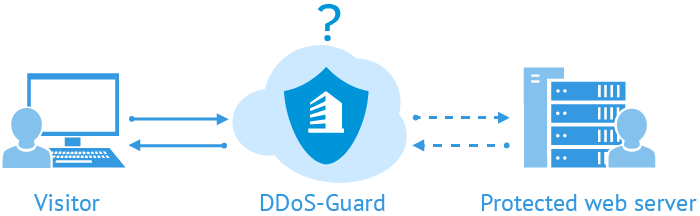

In [ ]:
for org in segment[(segment.cert_domain == 'None') & (~segment.cert_org.isnull())].cert_org.unique():
  printFirstRow(segment[(segment.cert_org == org)], 'https')
  print(org, '\n')

In [ ]:
calOrgSimilarity('Yuginterseti Ltd', '200')

{'avg_length': 6887.0,
 'domain_count': 73,
 'org': 'Yuginterseti Ltd',
 'similarity': 1.0,
 'standard_deviation': 0.0}

#### No common_name/organization, but has country info

In [ ]:
segment[(segment.cert_domain == 'None') & (segment.cert_org.isnull()) & (~segment.cert_country.isnull())].cert_country.unique()

array(['RU', '  '], dtype=object)

In [ ]:
segment[(segment.cert_domain == 'None') & (segment.cert_org.isnull()) & (~segment.cert_country.isnull()) & (segment.cert_country == 'RU')].ip.unique()

array(['194.247.185.251', '80.250.226.14', '217.149.17.4', '92.42.129.16',
       '91.204.252.158', '178.213.249.52', '217.27.40.122',
       '46.183.176.130', '188.65.128.218', '93.191.11.90',
       '178.218.88.14', '93.171.103.222', '194.190.72.74', '130.255.81.5'],
      dtype=object)

In [ ]:
cert2issuer = dict()
for cert in all_certs:
 
  parsed_cert = getIssuer(cert)
  try:
    issuer = parsed_cert.issuer.get_attributes_for_oid(NameOID.COMMON_NAME)[0].value
    #print("common name", issuer, '\n')
  except:
    try:
      issuer = parsed_cert.issuer.get_attributes_for_oid(NameOID.ORGANIZATION_NAME)[0].value
      #print(cert)#, cert)
      print("organization", issuer, '\n')
    except:
      issuer = parsed_cert.issuer.get_attributes_for_oid(NameOID.COUNTRY_NAME)[0].value
      #print(cert)#, cert)
      print("country", issuer, '\n')
  
  cert2issuer[cert] = issuer


# keweon AdBlock RootCA: certificate common name: [*.com.cn, *.co.jp, *.co.kr]

organization WatchGuard Technologies, Inc. 

country RU 

organization ddos-guard 

organization Internet Widgits Pty Ltd 

country RU 

organization Softion 

country RU 

country RU 

country    

organization Yuginterseti Ltd 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

organization Cloudflare, Inc. 

o

In [ ]:
parsed_cert.issuer.rfc4514_string()
parsed_cert.issuer.get_attributes_for_oid(NameOID.COUNTRY)[0].value

AttributeError: ignored

In [ ]:
from cryptography.hazmat.primitives import hashes
parsed_cert.fingerprint(hashes.SHA256())
#parsed_cert.issuer.rfc4514_string()
parsed_cert.issuer.get_attributes_for_oid(NameOID.COUNTRY_NAME)[0].value#rfc4514_string()

'RU'

In [ ]:
def getIssuer(cert_raw):
  pem_data = '-----BEGIN CERTIFICATE-----\n'+cert_raw+'\n-----END CERTIFICATE-----'
  try:
      cert = x509.load_pem_x509_certificate(str.encode(pem_data), default_backend())
      return cert
  except:
      print(f"cert error: {cert_raw}")
      return -1, 0
  common_names = cert.subject.get_attributes_for_oid(NameOID.COMMON_NAME)
  if len(common_names) == 0:
      try:
          san = cert.extensions.get_extension_for_class(x509.SubjectAlternativeName)
      except:
          return -1, cert
      san_dns_names = san.value.get_values_for_type(x509.DNSName)
      return 0, san_dns_names
  return 1, common_names[0].value

In [ ]:
segment[(segment.cert_domain == '*.com.cn') ].keyword.unique()

array(['zcool.com.cn', 'chinadaily.com.cn', 'pcbaby.com.cn', 'zol.com.cn',
       'sina.com.cn', 'w3school.com.cn'], dtype=object)

#### Special Certificates

In [ ]:
mismatch_cert_domains = segment[(segment.cert_match == False) & (segment.https_status == '200')].cert_domain.unique().tolist()
special_cert_domain = [domain for domain in mismatch_cert_domains if '.' not in domain]
special_cert_domain.append('localhost.localdomain')

# PROBABLY MISCONFIGIRATION/special configuration: Plesk, localhost, worf, Parallels Panel, Fireware web CA 


In [ ]:
[domain for domain in mismatch_cert_domains if 'localhost' in domain]

['localhost', 'localhost.localdomain']

In [ ]:
for domain in special_cert_domain:
  ip_counts = getOrderedCount(segment[segment.cert_domain == domain].ip)
  print(domain)
  for ip, count in ip_counts:
    print(ip, count, getOrderedCount(segment[(segment.cert_domain == domain)].https_status), getOrderedCount(segment[(segment.cert_domain == domain)].https_match_blockpage))
    
  print(' ')

# web-block, dpi, WIN-1734Q9U36AT (fail to parse by highly likely Korean blockpage), SRVMINTIC01-PRUEBAS, TW, CarbonBP

Plesk
77.68.3.233 1 [('303', 1), ('200', 1)] [(False, 2)]
18.188.182.234 1 [('303', 1), ('200', 1)] [(False, 2)]
 
web-block
83.69.208.124 70 [('200', 70)] [(True, 70)]
 
dpi
91.229.48.123 80 [('200', 160)] [(True, 160)]
195.178.192.22 80 [('200', 160)] [(True, 160)]
 
WIN-1734Q9U36AT
121.166.148.201 141 [('200', 141)] [(False, 141)]
 
localhost
193.151.107.214 5 [('200', 7), ('403', 5), ('404', 1), ('502', 1)] [(False, 14)]
81.12.39.200 5 [('200', 7), ('403', 5), ('404', 1), ('502', 1)] [(False, 14)]
13.72.15.107 2 [('200', 7), ('403', 5), ('404', 1), ('502', 1)] [(False, 14)]
185.203.72.17 1 [('200', 7), ('403', 5), ('404', 1), ('502', 1)] [(False, 14)]
208.73.204.158 1 [('200', 7), ('403', 5), ('404', 1), ('502', 1)] [(False, 14)]
 
worf
193.37.35.141 1 [('200', 1)] [(False, 1)]
 
Parallels Panel
37.128.144.181 1 [('200', 1)] [(False, 1)]
 
SRVMINTIC01-PRUEBAS
201.234.177.235 8 [('200', 8)] [(True, 8)]
 
TW
62.213.11.249 171 [('200', 171)] [(True, 171)]
 
CarbonBP
195.248.71.153 79 

In [ ]:


# Investigate those without blockpages matches

calCertSimilarity('WIN-1734Q9U36AT', '200')
# Very likely a blockpage

{'avg_length': 87826.0,
 'cert': 'WIN-1734Q9U36AT',
 'domain_count': 141,
 'similarity': 1.0,
 'standard_deviation': 0.0}

In [ ]:
for _, row in segment[(segment.cert_domain == 'WIN-1734Q9U36AT')].iterrows():
  print(row['https'])
  break

# I am almost certain this is a blockpage?

{'status_line': '200 OK', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['353812'], 'Content-Type': ['image/jpeg'], 'Date': ['Mon, 28 Jun 2021 01:07:38 GMT'], 'Etag': ['"d59c2b19fc9bd31:0"'], 'Last-Modified': ['Fri, 02 Feb 2018 08:01:58 GMT'], 'Server': ['Microsoft-IIS/8.5'], 'X-Powered-By': ['ASP.NET']}, 'body': '����\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00��\x00fExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x06\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x03\x01\x00\x05\x00\x00\x00\x01\x00\x00\x00V\x03\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x00Q\x10\x00\x01\x00\x00\x00\x01\x01\x00\x00\x00Q\x11\x00\x04\x00\x00\x00\x01\x00\x00\x0e�Q\x12\x00\x04\x00\x00\x00\x01\x00\x00\x0e�\x00\x00\x00\x00\x00\x01��\x00\x00����\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c��\x00C\x01\x02\x

In [ ]:
calCertSimilarity('localhost')
segment[segment.cert_domain == 'localhost'].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage
15311,81.12.39.200,nobitex.ir,EOF,"{'status_line': '200 OK', 'headers': {'Accept-...",True,False,EOF,None,True,200,MIIDozCCAosCFBAGXmbB8DCEUhVjQ9mqMuLbp8DbMA0GCS...,localhost,False,False,NaN
15312,81.12.39.200,soft98.ir,EOF,"{'status_line': '200 OK', 'headers': {'Accept-...",True,False,EOF,None,True,200,MIIDozCCAosCFBAGXmbB8DCEUhVjQ9mqMuLbp8DbMA0GCS...,localhost,False,False,NaN
15314,81.12.39.200,divar.ir,EOF,"{'status_line': '200 OK', 'headers': {'Accept-...",True,False,EOF,None,True,200,MIIDozCCAosCFBAGXmbB8DCEUhVjQ9mqMuLbp8DbMA0GCS...,localhost,False,False,NaN
15316,81.12.39.200,www.irna.ir,EOF,"{'status_line': '200 OK', 'headers': {'Accept-...",True,False,EOF,None,True,200,MIIDozCCAosCFBAGXmbB8DCEUhVjQ9mqMuLbp8DbMA0GCS...,localhost,False,False,NaN
15319,81.12.39.200,shaparak.ir,EOF,"{'status_line': '200 OK', 'headers': {'Accept-...",True,False,EOF,None,True,200,MIIDozCCAosCFBAGXmbB8DCEUhVjQ9mqMuLbp8DbMA0GCS...,localhost,False,False,NaN


In [ ]:
for domain in special_cert_domain[6:]:
  ip_counts = getOrderedCount(segment[segment.cert_domain == domain].ip)
  
  for ip, count in ip_counts:
    if getOrderedCount(segment[(segment.cert_domain == domain)].https_match_blockpage)[0][0] != True:
      print(ip, count, getOrderedCount(segment[(segment.cert_domain == domain)].https_status))
      for _, row in segment[(segment.cert_domain == domain) & (segment.https_status == '200')].iterrows():
        print(row['https'])
        break
  print(domain, '\n')
  input()

37.128.144.181 1 [('200', 1)]
{'status_line': '200 OK', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['133'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:09:06 GMT'], 'Etag': ['"85-5640a1298af00"'], 'Last-Modified': ['Wed, 31 Jan 2018 03:28:28 GMT'], 'Server': ['nginx/1.18.0'], 'Vary': ['Accept-Encoding']}, 'body': '<html><frameset rows="100%,*" frameborder="0"><frame src="https://placeholder.hostnet.nl/vps/" noresize="noresize"></frameset></html>', 'TlsVersion': 771, 'CipherSuite': 52392, 'Certificate': 'MIIDszCCApsCBFT/Eo8wDQYJKoZIhvcNAQEFBQAwgZ0xCzAJBgNVBAYTAlVTMREwDwYDVQQIEwhWaXJnaW5pYTEQMA4GA1UEBxMHSGVybmRvbjESMBAGA1UEChMJUGFyYWxsZWxzMRgwFgYDVQQLEw9QYXJhbGxlbHMgUGFuZWwxGDAWBgNVBAMTD1BhcmFsbGVscyBQYW5lbDEhMB8GCSqGSIb3DQEJARYSaW5mb0BwYXJhbGxlbHMuY29tMB4XDTE1MDMxMDE1NDkzNVoXDTE2MDMwOTE1NDkzNVowgZ0xCzAJBgNVBAYTAlVTMREwDwYDVQQIEwhWaXJnaW5pYTEQMA4GA1UEBxMHSGVybmRvbjESMBAGA1UEChMJUGFyYWxsZWxzMRgwFgYDVQQLEw9QYXJhbGxlbHMgUGFuZWwxGDAWBgNVBAMTD1BhcmFsbGVscyBQYW5

In [ ]:
getOrderedCount(segment[segment.cert_domain == 'localhost.localdomain'].ip)

[('103.144.182.26', 66), ('195.168.1.60', 4)]

#### CDNs

In [ ]:
check_cdn_df = segment[(segment.cert_match == False) & (segment.https_match_blockpage == False) & (segment.cert_domain != 'None') & (segment.https_status == '200')]                    

In [ ]:
valid_cert_mismatch = set(check_cdn_df.cert_domain.unique().tolist())
print(len(valid_cert_mismatch))                      

165


In [ ]:
segment[(segment.cert_match == False) & (segment.https_match_blockpage == False)].cert_domain.astype(str).nunique()

549

In [ ]:
cdn_candidates = valid_cert_mismatch - set(special_cert_domain)
len(cdn_candidates)

157

In [ ]:
cdns = ['fastly', 'cloudflare', 'cdn', 'cloudfront', 'amazon', 'microsoft', 'google', 'aliyun']
cdn_excluded = []
cdn_domains = []
for domain in cdn_candidates:
  if matchList(domain, cdns):
    cdn_domains.append(domain)
    print(domain)
  else:
    cdn_excluded.append(domain)

*.google.com
cdn-content-production.cxpublic.com
*.d.ssl.fastly.net
sni.cloudflaressl.com
*.ssl.hwcdn.net
mshcdn.com
lanacionar.cdn.arcpublishing.com


In [ ]:
# check if CDNs would have blockpages
cdn_domain_df = []
for domain in cdn_domains:
  domain_info = calCertSimilarity(check_cdn_df, domain, '200')
  if not domain_info:
    #print(f"Nonetype: {domain}")
    continue
  cdn_domain_df.append(domain_info)
  if domain_info['domain_count'] > 1 and domain_info['similarity'] == 1:
    print(domain)
cdn_domain_df = pd.DataFrame(cdn_domain_df)

In [ ]:
cdn_domain_df

,cert,domain_count,avg_length,standard_deviation,similarity
0,*.google.com,1,72777.000000,0.816497,0.999989
1,cdn-content-production.cxpublic.com,1,70038.000000,0.000000,1.000000
2,*.d.ssl.fastly.net,1,48902.000000,0.000000,1.000000
3,sni.cloudflaressl.com,22,61860.402985,1409.723034,0.977211
4,*.ssl.hwcdn.net,1,2632.750000,0.216506,0.999918
5,mshcdn.com,1,69767.800000,0.178885,0.999997
6,lanacionar.cdn.arcpublishing.com,1,68287.569364,0.291762,0.999996


In [ ]:
#displayFirstRow(check_cdn_df[check_cdn_df.cert_domain == 'sni.cloudflaressl.com'], 'https')
check_cdn_df[check_cdn_df.cert_domain == 'sni.cloudflaressl.com'].keyword.unique()
# blockpages free

array(['discord.com', 'www.tawk.to', 'beeg.com', 'www.ftchinese.com',
       'www.vibe.com', 'www.madamasr.com', 'cdnjs.com',
       'www.eccouncil.org', 'www.genymotion.com', 'creativecommons.org',
       'www.economist.com', 'www.change.org', 'raseef22.net',
       'www.wnd.com', 'digg.com', 'www.drudgereport.com', 'hamariweb.com',
       'whatismyipaddress.com', 'www.truecaller.com', 'www.fotolog.com',
       'albawabhnews.com', 'www.ahram.org.eg'], dtype=object)

In [ ]:
getOrderedCount(check_cdn_df[check_cdn_df.cert_domain.isin(cdn_excluded)].cert_org)

[("Let's Encrypt", 5247),
 ('GoDaddy.com, Inc.', 906),
 ('DigiCert Inc', 472),
 ('Sectigo Limited', 279),
 (None, 111),
 ('Hoplite Industries, Inc.', 43),
 ('keweon Privacy Cloud', 32),
 ('GlobalSign nv-sa', 17),
 ('cPanel, Inc.', 7),
 ('Amazon', 5),
 ('GEANT Vereniging', 5),
 ('The Daniel Morante Company, Inc.', 4),
 ('torproject.org', 4),
 ('COMODO CA Limited', 4),
 ('Starfield Technologies, Inc.', 3),
 ('Hellenic Academic and Research Institutions Cert. Authority', 3),
 ('GeoTrust Inc.', 2),
 ('T-Systems International GmbH', 2),
 ('TAIWAN-CA', 1),
 ('SwissSign AG', 1),
 ('TrustAsia Technologies, Inc.', 1),
 ('SSL Corporation', 1),
 ('Microsoft Corporation', 1),
 ('default domain', 1),
 ('DreamHost', 1),
 ('Actalis S.p.A.', 1),
 ('Network Solutions L.L.C.', 1),
 ('lxlabs', 1),
 ('etone', 1),
 ('GeoTrust, Inc.', 1),
 ('Google Trust Services LLC', 1),
 ('Entrust, Inc.', 1)]

#### Let's Encrypt

In [ ]:
getOrderedCount(check_cdn_df[check_cdn_df.cert_org == 'Let\'s Encrypt'].keyword)[:20]

[('www.jpeocbrnd.osd.mil', 366),
 ('www.lanacion.com.ar', 346),
 ('www.nationalguard.mil', 315),
 ('www.northcom.mil', 313),
 ('www.dfas.mil', 313),
 ('www.dcaa.mil', 313),
 ('www.dcma.mil', 313),
 ('www.dia.mil', 313),
 ('www.nro.gov', 312),
 ('www.pfpa.mil', 311),
 ('www.centcom.mil', 310),
 ('www.jcs.mil', 310),
 ('www.pacom.mil', 309),
 ('www.southcom.mil', 308),
 ('www.dla.mil', 308),
 ('www.stratcom.mil', 303),
 ('www.dtra.mil', 78),
 ('www.dpaa.mil', 60),
 ('mashable.com', 5),
 ('xabbs.com', 5)]

In [ ]:
getOrderedCount(check_cdn_df[check_cdn_df.cert_org == 'GoDaddy.com, Inc.'].keyword)[:20]

[('www.megaproxy.com', 4),
 ('tiktok.com', 4),
 ('daum.net', 3),
 ('digg.com', 3),
 ('encrypted.google.com', 3),
 ('www.dailysabah.com', 3),
 ('www.bitfinex.com', 3),
 ('sites.google.com', 3),
 ('jw.org', 3),
 ('nbcnews.com', 3),
 ('www.theguardian.com', 3),
 ('btguard.com', 3),
 ('google.ca', 3),
 ('www.overdrive.com', 3),
 ('dagospia.com', 3),
 ('substack.com', 3),
 ('www.search.com', 3),
 ('web.archive.org', 3),
 ('www.xroxy.com', 3),
 ('bloomberg.com', 3)]

In [ ]:
getOrderedCount(check_cdn_df[check_cdn_df.cert_org == 'DigiCert Inc'].keyword)[:20]


[('www.eurogrand.com', 392),
 ('login.live.com', 18),
 ('zhanqi.tv', 7),
 ('zhaket.com', 7),
 ('www.wechat.com', 4),
 ('nbcnews.com', 4),
 ('steamcommunity.com', 4),
 ('web.wechat.com', 3),
 ('stats.bls.gov', 3),
 ('www.messenger.com', 3),
 ('ereenerall.fun', 3),
 ('sites.google.com', 2),
 ('www.indiatimes.com', 2),
 ('www.pogo.com', 1),
 ('www.ea.com', 1),
 ('joinmastodon.org', 1),
 ('www.metacrawler.com', 1),
 ('www.dogpile.com', 1),
 ('bet365.com', 1),
 ('www.rescue.org', 1)]

In [ ]:
getOrderedCount(check_cdn_df[check_cdn_df.cert_org == 'keweon Privacy Cloud'].keyword)[:20]

[('w3school.com.cn', 1),
 ('mercadolibre.com.ar', 1),
 ('excite.co.jp', 1),
 ('google.com.pk', 1),
 ('hurriyet.com.tr', 1),
 ('realestate.com.au', 1),
 ('milliyet.com.tr', 1),
 ('kontan.co.id', 1),
 ('rakuten.co.jp', 1),
 ('google.co.ve', 1),
 ('pchome.com.tw', 1),
 ('sina.com.cn', 1),
 ('google.com.vn', 1),
 ('11st.co.kr', 1),
 ('dmm.co.jp', 1),
 ('lanacion.com.ar', 1),
 ('lazada.co.th', 1),
 ('brainly.co.id', 1),
 ('mercadolivre.com.br', 1),
 ('mercadolibre.com.ve', 1)]

In [ ]:
getOrderedCount(check_cdn_df[check_cdn_df.cert_org == 'TAIWAN-CA'].keyword)[:20]
printFirstRow(check_cdn_df[check_cdn_df.cert_org == 'TAIWAN-CA'], 'https')

domain: www.ipvanish.com, {'status_line': '200 OK', 'headers': {'Cache-Control': ['max-age=0'], 'Connection': ['keep-alive'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:13:51 GMT'], 'Expires': ['Mon, 28 Jun 2021 01:13:51 GMT'], 'Keep-Alive': ['timeout=20'], 'P3p': ['CP="IDC DSP COR ADM DEVi TAIi PSA PSD IVAi IVDi CONi HIS OUR IND CNT"'], 'Server': ['nginx/1.4.4'], 'Set-Cookie': ['mobile_charset=zh_tw; path=/; domain=i-part.com.tw'], 'X-Ipair': ['1']}, 'body': '<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\r\n<html>\r\n<head>\r\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n    <meta http-equiv="CACHE-CONTROL" content="NO-CACHE">\r\n    <meta http-equiv="PRAGMA" content="NO-CACHE">\r\n    <meta http-equiv="expires" content="Wed, 26 Feb 1997 08:21:57 GMT">\r\n    <meta name="Keywords" content="交友,聊天室,聊天,聯誼,配對,戀愛" />\r\n    <meta name="Description" content="提供聊天室傳情聊天、網路交友

In [ ]:
"""
e.sni.fastly.net: 500 Domain Not Found
*.cloudfront.net: 400 Bad Request
ssl*.cloudflaressl.com: 403 Forbidden
sni.cloudflaressl.com: 301 Moved Permanently', 200 ✰ This one has legit pages
prisa.cdn.arcpublishing.com: 302 Moved Temporarily only for elpais.com	
lanacionar.cdn.arcpublishing.com: 200 ✰
"""
segment[segment.cert_domain.str.contains('.cloudflaressl.com', na=False)].https_status.unique() #=> '403', '301', '200'
# legit: segment[(segment.cert_domain.str.contains('.cloudflaressl.com', na=False)) & (segment.https_status == '200')]
segment[segment.cert_domain.str.contains('lanacionar.cdn.arcpublishing.com', na=False)]

# Legit pages check
segment[(segment.cert_domain.isin(cdn_domains)) & (segment.https_status == '200')]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match
27,207.194.199.88,www.lanacion.com.ar,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Cache-C...",True,True,None,301,True,200,MIIGDDCCBPSgAwIBAgISA874mw/X4IPJL9wFueV3g4UkMA...,lanacionar.cdn.arcpublishing.com,False
465,203.116.175.146,www.lanacion.com.ar,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Cache-C...",True,True,None,301,True,200,MIIGDDCCBPSgAwIBAgISA874mw/X4IPJL9wFueV3g4UkMA...,lanacionar.cdn.arcpublishing.com,False
892,91.134.231.179,ocsp.comodoca.com,"{'status_line': '200 OK', 'headers': {'Cache-C...","{'status_line': '200 OK', 'headers': {'Cache-C...",True,True,None,200,True,200,MIIGNTCCBR2gAwIBAgIQdJ91I9ynqnIt2cTPmVnp5zANBg...,*.ssl.hwcdn.net,False
941,176.31.154.13,discord.com,EOF,"{'status_line': '200 OK', 'headers': {'Accept-...",True,False,EOF,None,True,200,MIIEtTCCBFugAwIBAgIQB92CSGa8+bgtORFq2j6oXDAKBg...,sni.cloudflaressl.com,False
978,113.171.231.124,www.lanacion.com.ar,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Cache-C...",True,True,None,301,True,200,MIIGDDCCBPSgAwIBAgISA874mw/X4IPJL9wFueV3g4UkMA...,lanacionar.cdn.arcpublishing.com,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83445,184.28.173.67,www.lanacion.com.ar,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Cache-C...",True,True,None,301,True,200,MIIGDDCCBPSgAwIBAgISA874mw/X4IPJL9wFueV3g4UkMA...,lanacionar.cdn.arcpublishing.com,False
83604,113.171.230.142,www.lanacion.com.ar,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Cache-C...",True,True,None,301,True,200,MIIGDDCCBPSgAwIBAgISA874mw/X4IPJL9wFueV3g4UkMA...,lanacionar.cdn.arcpublishing.com,False
83656,94.130.124.125,discord.com,EOF,"{'status_line': '200 OK', 'headers': {'Accept-...",True,False,EOF,None,True,200,MIIEtTCCBFugAwIBAgIQB92CSGa8+bgtORFq2j6oXDAKBg...,sni.cloudflaressl.com,False
83924,203.134.79.72,www.lanacion.com.ar,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Cache-C...",True,True,None,301,True,200,MIIGDDCCBPSgAwIBAgISA874mw/X4IPJL9wFueV3g4UkMA...,lanacionar.cdn.arcpublishing.com,False


#### Parent-child relationships

# Write back test

In [ ]:
%%bigquery --project firehook-censoredplanet original_scan
SELECT 
  domain,
  category,
  ip,
  date,
  received[OFFSET(0)].ip as received_ip,
  received[OFFSET(0)].asnum as received_asnum,
  received[OFFSET(0)].asname as received_asname,
  netblock,
  asn,
  as_name,
  as_full_name,
  as_class,
  country,
  organization,
  name
FROM
  `firehook-censoredplanet.laplante.satellite_scan_inline_blockpages`
WHERE
  date = "2021-06-23"
  AND anomaly = True
  AND rcode = 0
  # AND error not like "%dns: short read%"
# why is the has_type_a None?

In [ ]:
%%bigquery --project firehook-censoredplanet original_scan_normal
SELECT
  CASE WHEN ARRAY_LENGTH(received) > 0 THEN received[OFFSET(0)].ip ELSE null END AS received_ip,
  CASE WHEN ARRAY_LENGTH(received) > 0 THEN received[OFFSET(0)].asnum ELSE null END AS received_asnum,
  CASE WHEN ARRAY_LENGTH(received) > 0 THEN received[OFFSET(0)].asname ELSE null END AS received_asname,
  domain,
  category,
  ip,
  date,
  netblock,
  asn,
  as_name,
  as_full_name,
  as_class,
  country,
  organization,
  name,
FROM
  `firehook-censoredplanet.laplante.satellite_scan_inline_blockpages`
WHERE
  date = "2021-06-23"
  AND anomaly = False
  AND rcode = 0

In [ ]:
original_scan_normal #41873073 lines

,f0_
0,41873073


In [ ]:
original_scan.shape

(559013, 15)

In [ ]:
559013/41873073

0.013350178526424368

In [ ]:

%%bigquery --project firehook-censoredplanet original_scan
SELECT 
  distinct has_type_a
FROM
  `firehook-censoredplanet.laplante.satellite_scan_flattened_no_received_ip_tagging`
WHERE
  date = "2021-06-23"
LIMIT 1000
  # AND has_type_a = True

In [ ]:
original_scan = orginal_scan
original_scan.head()

,domain,category,ip,date,received_ip,received_asnum,received_asname,netblock,asn,as_name,as_full_name,as_class,country,organization,name
0,de.lirio.us,Social Networking,194.158.78.138,2021-06-23,96.47.230.67,8100.0,ASN-QUADRANET-GLOBAL,194.158.76.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,ns2.xena.ad.
1,de.lirio.us,Social Networking,194.158.78.137,2021-06-23,96.47.230.67,8100.0,ASN-QUADRANET-GLOBAL,194.158.76.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,ns1.xena.ad.
2,www.ecequality.org,LGBT,194.158.78.137,2021-06-23,160.153.136.3,21501.0,GODADDY-AMS,194.158.76.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,ns1.xena.ad.
3,www.ecequality.org,LGBT,109.111.112.32,2021-06-23,160.153.136.3,21501.0,GODADDY-AMS,109.111.112.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,transfer.ftth.viamoda.ad.
4,www.ecequality.org,LGBT,194.158.78.138,2021-06-23,160.153.136.3,21501.0,GODADDY-AMS,194.158.76.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,ns2.xena.ad.


In [ ]:
original_scan.shape

(559013, 15)

## Generate outcome for IPs
Logic: follow the order of the heuristics, if the outcome of an IP is already written (not null), then don't write

In [ ]:
ip2outcome = {ip:None for ip in segment.ip.unique().tolist()}

In [ ]:
len(ip2outcome)

6959

In [ ]:
def checkOverlap(l1, l2):
  return set(l1).intersection(set(l2))

In [ ]:
def isTagged(d, ip):
  return not d[ip]

def checkTaggedPercentage(d):
  return sum([1 for ip, outcome in d.items() if outcome])/len(d)

def updateOutcome(d, ip, outcome):
  if d[ip]:
    #print(f"{ip} already has outcome {d[ip]}")
    res = d[ip].split('/')[0]
    new_res = outcome.split('/')[0]
    if res != new_res:
      print(f"!!!!!!!Disagree: {ip}: {d[ip]} vs {outcome}")
    return d
  else:
    d[ip] = outcome
    return d 

checkTaggedPercentage(ip2outcome)

0.0

#### Sumarized

In [ ]:
ip2outcome = {ip:None for ip in segment.ip.unique().tolist()}
# 451
ip_451 = segment[(segment.https_status.isin(['451'])) | (segment.http_status.isin(['451']))].ip.unique().tolist()
for ip in ip_451:
  updateOutcome(ip2outcome, ip, 'blocked/blockpage_status_451')

# cert match 200 - blockpage matches
target_df = segment[(segment.cert_match == True) & (segment.https_match_blockpage) & (segment.https_status == '200')]
ip_cert_match_blockpage_match = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.https_matched_blockpage))
for ip in ip_cert_match_blockpage_match:
  outcome = f'blocked/blockpage_{fp2name[ip2fp[ip]]}'
  updateOutcome(ip2outcome, ip, outcome)

target_df = segment[(segment.cert_match == True) & (segment.https_match_blockpage == False) &\
                    (segment.http_match_blockpage) & (segment.http_status == '200')]
ip_cert_match_blockpage_match = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.http_matched_blockpage))
for ip in ip_cert_match_blockpage_match:
  outcome = f'blocked/blockpage_{fp2name[ip2fp[ip]]}'
  updateOutcome(ip2outcome, ip, outcome)

# cert mismatch 200 - blockpage matches
target_df = segment[(segment.cert_match == False) & (segment.https_match_blockpage) & (segment.https_status == '200')]
ip_cert_match_blockpage_match = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.https_matched_blockpage))
for ip in ip_cert_match_blockpage_match:
  outcome = f'blocked/blockpage_{fp2name[ip2fp[ip]]}'
  updateOutcome(ip2outcome, ip, outcome)

target_df = segment[(segment.cert_match == False) & (segment.https_match_blockpage == False) &\
                    (segment.http_match_blockpage) & (segment.http_status == '200')]
ip_cert_match_blockpage_match = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.http_matched_blockpage))
for ip in ip_cert_match_blockpage_match:
  outcome = f'blocked/blockpage_{fp2name[ip2fp[ip]]}'
  updateOutcome(ip2outcome, ip, outcome)

# 200 - blockpage mismatches
ip_cert_match = segment[(segment.https_match_blockpage == False)& (segment.http_match_blockpage == False) &\
                        (segment.https_status == '200') & (segment.cert_match)].ip.unique().tolist()
for ip in ip_cert_match:
  updateOutcome(ip2outcome, ip, 'expected/cert_match')

# cert match -300 - location matches
redirect_https = segment[(segment.fetched_https) & (segment.cert_match == True) &(segment.https_status.isin(['301', '302', '303', '308']))]
redirect_https['redirect_match'] = redirect_https.apply(lambda x: checkRedirect(x.keyword, x.https), axis=1)
redirect_https['https_location'] = redirect_https.https.apply(lambda x: None if 'headers' not in x else x['headers']['Location'][0])
redirect_cert_match_location_match = redirect_https[(redirect_https['redirect_match'] == True)].ip.unique().tolist()
for ip in redirect_cert_match_location_match:
  updateOutcome(ip2outcome, ip, 'expected/redirect_cert_match_location_match')

# cert match -300 - location mismatches above thres
redirect_cert_match_location_mismatch = redirect_https[(redirect_https['redirect_match'] == False)].ip.unique().tolist()
threshold = 10
ip_cert_match_location_mismatch = []
for cert_org, count in getOrderedCount(redirect_https[(redirect_https.redirect_match == False)].cert_org)[:30]:
  cert_df = redirect_https[(redirect_https.cert_org == cert_org)&(redirect_https.redirect_match == False)]
  tlds = set([tld(location) for location in cert_df.https_location.unique()])
  if count/len(tlds) > threshold:
    for ip in cert_df.ip.unique():
      ip_cert_match_location_mismatch.append(ip)
for ip in ip_cert_match_location_mismatch:
  updateOutcome(ip2outcome, ip, 'blocked/redirect_cert_match_location_mismatch_above_thres')

# cert mismatch - 300 - location matches
redirect_https_cert_mismatch = segment[(segment.fetched_https) & (segment.cert_match == False) &(segment.https_status.isin(['301', '302', '303', '308']))]
redirect_https_cert_mismatch['redirect_match'] = redirect_https_cert_mismatch.apply(lambda x: checkRedirect(x.keyword, x.https), axis=1)
redirect_https_cert_mismatch['https_location'] = redirect_https_cert_mismatch.https.apply(lambda x: None if 'headers' not in x else x['headers']['Location'][0])
redirect_cert_mismatch_location_match = redirect_https[(redirect_https['redirect_match'] == True)].ip.unique().tolist()

ip_cert_mismatch_location_match = []
ip_cert_mismatch_location_match_above_thres = []
for cert_org, count in getOrderedCount(redirect_https_cert_mismatch[(redirect_https_cert_mismatch.redirect_match == True)].cert_org)[:30]:
  if not cert_org:
    continue
  cert_df = redirect_https_cert_mismatch[(redirect_https_cert_mismatch.cert_org == cert_org)&\
                                         (redirect_https_cert_mismatch.redirect_match == True)&(redirect_https_cert_mismatch.cert_match == False)]
  
  
  for ip in cert_df.ip.unique():
    domains_count = cert_df[cert_df.ip == ip].keyword.nunique()
    tlds = set([tld(location) for location in cert_df[cert_df.ip == ip].https_location.unique()])
    if domains_count/len(tlds) > threshold:
      ip_cert_mismatch_location_match_above_thres.append(ip)
    else:
      ip_cert_mismatch_location_match.append(ip)

for ip in set(ip_cert_mismatch_location_match_above_thres):
  updateOutcome(ip2outcome, ip, 'blocked/redirect_ip_cert_mismatch_location_match_above_thres')

for ip in set(ip_cert_mismatch_location_match):
  updateOutcome(ip2outcome, ip, 'expected/redirect_ip_cert_mismatch_location_match')

# cert mismatch - 300 - location mismatches
ip_cert_mismatch_location_mismatch_above_thres = []
ip_cert_mismatch_location_mismatch = []
for cert_org, count in getOrderedCount(redirect_https_cert_mismatch[(redirect_https_cert_mismatch.redirect_match == False)].cert_org)[:30]:
  if not cert_org:
    continue
  cert_df = redirect_https_cert_mismatch[(redirect_https_cert_mismatch.cert_org == cert_org)&\
                                         (redirect_https_cert_mismatch.redirect_match == False)&(redirect_https_cert_mismatch.cert_match == False)]
  
  for ip in cert_df.ip.unique():
    domains_count = cert_df[cert_df.ip == ip].keyword.nunique()
    tlds = set([tld(location) for location in cert_df[cert_df.ip == ip].https_location.unique()])
    if domains_count/len(tlds) > threshold:
      ip_cert_mismatch_location_mismatch_above_thres.append(ip)
    else:
      ip_cert_mismatch_location_mismatch.append(ip)

for ip in set(ip_cert_mismatch_location_mismatch_above_thres):
  updateOutcome(ip2outcome, ip, 'blocked/redirect_ip_cert_mismatch_location_mismatch_above_thres')

for ip in set(ip_cert_mismatch_location_mismatch):
  updateOutcome(ip2outcome, ip, 'expected/redirect_ip_cert_mismatch_location_mismatch')

# cert mismatch blockpage mismatch
ip_cert_match = segment[(segment.https_match_blockpage == False)& (segment.http_match_blockpage == False) &\
                        (segment.https_status == '200') & (segment.cert_match == False)].ip.unique().tolist()
for ip in ip_cert_match:
  updateOutcome(ip2outcome, ip, 'expected/cert_mismatch_blockpage_mismatch')

segment_http = segment[(segment.fetched_http) & (segment.fetched_https == False)]
target_df = segment_http[(segment_http.http_match_blockpage) & (segment_http.http_status == '200')]
http_match_blockpage = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.http_matched_blockpage))
for ip in http_match_blockpage:
  outcome = f'blocked/blockpage_{fp2name[ip2fp[ip]]}'
  updateOutcome(ip2outcome, ip, outcome)

http_mismatch_blockpage = segment_http[(segment_http.http_match_blockpage == False) & (segment_http.http_status == '200')].ip.unique()
for ip in http_mismatch_blockpage:
  updateOutcome(ip2outcome, ip, 'expected/http_only_blockpage_mismatch')

target_df = segment[(segment.https_status.isin(['500', '503'])) & (segment.https_match_blockpage)]
ip_503 = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.http_matched_blockpage))
for ip in ip_503:
  outcome = f'blocked/blockpage_{fp2name[ip2fp[ip]]}'
  updateOutcome(ip2outcome, ip, outcome)

# IPs that hosted nothing:
no_content_ips = segment[(segment.fetched_http == False) & (segment.fetched_https == False)].ip.unique()
# completeness:
no_content_ips = []
for ip in no_content_ips:
  if (segment[segment.ip == ip].fetched_http.nunique() > 1) or (segment[segment.ip == ip].fetched_https.nunique() > 1):
    continue
  updateOutcome(ip2outcome, ip, 'unknown/ip_no_content_hosted')
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

!!!!!!!Disagree: 88.203.129.148: blocked/blockpage_russia6 vs expected/redirect_ip_cert_mismatch_location_match
!!!!!!!Disagree: 88.149.128.114: blocked/blockpage_e_unk_it_notice vs expected/http_only_blockpage_mismatch


In [ ]:
checkOverlap(set([ip for ip, outcome in ip2outcome.items() if outcome]), set(tmp))
# Great

set()

In [ ]:
checkTaggedPercentage(ip2outcome)

0.789912343727547

# Check Orginal Test

## "expected" IP - FP

In [ ]:
def getIPwithString(d, string):
  res = []
  for ip, outcome in d.items():
    if outcome and string in outcome:
      res.append(ip)
  return res

In [ ]:
expected_ips = getIPwithString(ip2outcome, 'expected')

In [ ]:
print(f"{len(expected_ips)}/{original_scan.ip.nunique()} = {len(expected_ips)/original_scan.ip.nunique()}")

4796/20091 = 0.2387138519735205


In [ ]:
total_lines = original_scan.shape[0]
expected_lines = original_scan[original_scan.received_ip.isin(expected_ips)].shape[0]
print(f"{expected_lines}/{total_lines} = {expected_lines/total_lines}")

182360/559013 = 0.32621781604363403


## "blockpage IPs" - FN

In [ ]:
blockpage_ips = getIPwithString(ip2outcome, 'blockpage')

In [ ]:
original_scan_normal.head() #0.0.0.0????

,received,received_ip,received_asnum,received_asname,domain,category,ip,date,netblock,asn,as_name,as_full_name,as_class,country,organization,name
0,"[{'ip': '0.0.0.0', 'asnum': None, 'asname': No...",0.0.0.0,None,None,sxyprn.com,Pornography,121.100.49.90,2021-06-23,121.100.49.0/24,38742,AWCC-AS-AP,Afghan Wireless,Transit/Access,AF,Afghan Wireless Communication Company,121-100-49-90.rdns.afghan-wireless.com.
1,"[{'ip': '0.0.0.0', 'asnum': None, 'asname': No...",0.0.0.0,None,None,www.hustler.com,Pornography,103.42.3.115,2021-06-23,103.42.3.0/24,38742,AWCC-AS-AP,Afghan Wireless,Transit/Access,AF,Afghan Wireless Communication Company,103-42-3-115.rdns.afghan-wireless.com.
2,"[{'ip': '0.0.0.0', 'asnum': None, 'asname': No...",0.0.0.0,None,None,www.breastenlargementmagazine.com,Public Health,103.42.3.133,2021-06-23,103.42.3.0/24,38742,AWCC-AS-AP,Afghan Wireless,Transit/Access,AF,Afghan Wireless Communication Company,103-42-3-133.rdns.afghan-wireless.com.
3,"[{'ip': '0.0.0.0', 'asnum': None, 'asname': No...",0.0.0.0,None,None,alt.com,Pornography,103.42.3.179,2021-06-23,103.42.3.0/24,38742,AWCC-AS-AP,Afghan Wireless,Transit/Access,AF,Afghan Wireless Communication Company,103-42-3-179.rdns.afghan-wireless.com.
4,"[{'ip': '0.0.0.0', 'asnum': None, 'asname': No...",0.0.0.0,None,None,www.youporn.com,Pornography,121.100.49.84,2021-06-23,121.100.49.0/24,38742,AWCC-AS-AP,Afghan Wireless,Transit/Access,AF,Afghan Wireless Communication Company,121-100-49-84.rdns.afghan-wireless.com.


In [ ]:
len(blockpage_ips)

801

In [ ]:
getOrderedCount(segment[segment.ip.isin(blockpage_ips)].ip)[:30]

[('193.58.251.1', 471),
 ('159.255.26.69', 399),
 ('198.251.90.72', 342),
 ('212.1.226.59', 329),
 ('80.87.199.46', 301),
 ('64.13.192.76', 300),
 ('64.13.232.149', 300),
 ('98.159.108.61', 298),
 ('64.13.192.74', 297),
 ('159.65.107.38', 297),
 ('45.77.186.255', 296),
 ('98.159.108.57', 293),
 ('86.57.224.86', 283),
 ('104.244.43.248', 271),
 ('104.244.43.228', 270),
 ('104.244.43.208', 270),
 ('104.244.43.57', 270),
 ('104.244.43.182', 270),
 ('104.244.43.234', 269),
 ('104.244.43.229', 269),
 ('104.244.43.128', 268),
 ('104.244.43.104', 267),
 ('130.211.15.150', 250),
 ('193.58.251.11', 246),
 ('103.153.190.250', 203),
 ('62.213.11.249', 171),
 ('195.186.208.170', 169),
 ('103.247.216.203', 154),
 ('193.192.98.40', 150),
 ('193.192.98.49', 150)]

# Heuristics

### Check if status == 451 0.17%
Uniformed distribution

In [ ]:
segment[segment.http_status.isin(['303'])].https_status.unique()

array(['303'], dtype=object)

In [ ]:
segment[segment.http_status.isin(['451'])].https_status.unique()

array(['451', None], dtype=object)

In [ ]:
segment[segment.https_status.isin(['451'])].http_status.unique()

array(['451', None], dtype=object)

In [ ]:
ip_451 = segment[(segment.https_status.isin(['451'])) | (segment.http_status.isin(['451']))].ip.unique().tolist()
for ip in ip_451:
  print(ip, segment[segment.ip == ip].http_status.unique(), segment[segment.ip == ip].https_status.unique())

80.250.226.14 ['451'] ['451']
93.174.131.38 ['451'] [None]
194.247.191.190 ['451'] ['451']
194.34.96.6 ['451'] ['451']
217.27.40.122 ['451'] ['451']
93.191.11.90 ['451'] ['451']
13.55.47.48 ['451'] ['451']
178.218.88.14 ['451' None] ['451' None]
54.66.245.151 ['451'] ['451']
193.58.251.1 [None '451'] [None]
5.129.186.222 ['451'] ['451']
193.58.251.11 ['451'] ['451']


In [ ]:
for ip in ip_451:
  updateOutcome(ip2outcome, ip, 'blockpage_status_451')
checkTaggedPercentage(ip2outcome)

0.001724385687598793

# If has HTTPS

### Check if cert match

### If cert matches 0.0574%

##### 200 - if blockpage_match - do we want to note down these cert orgs?

In [ ]:
# if https.cert.common_name matches but http matches blockpage
segment[(segment.cert_match == True) & (segment.http_match_blockpage) & (segment.http_status == '200')].https_match_blockpage.unique() # Good

array([True], dtype=object)

In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_match_blockpage) & (segment.http_status == '200')].cert_org)

[('NetAlerts', 342), ('Zscaler Inc.', 159), ('DNSFilter', 101)]

In [ ]:
segment[(segment.cert_match == True) & (segment.http_match_blockpage) & (segment.http_status == '200')]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
39045,198.251.90.72,www.victoriassecret.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,True,200,MIIB/zCCAYWgAwIBAgIQZG9hZ/AVSf4oy6fSFSqUmzAKBg...,www.victoriassecret.com,True,True,<title>Website Filtered</title>,NetAlerts,None
39047,198.251.90.72,www.bittorrent.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,True,200,MIIB9jCCAXugAwIBAgIQECTDcAGYN8gVHqaav7VOaTAKBg...,www.bittorrent.com,True,True,<title>Website Filtered</title>,NetAlerts,None
39053,198.251.90.72,www.nifty.org,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,True,200,MIIB7DCCAXKgAwIBAgIRAOhujP7Kh5Cs33Cj3idHPpIwCg...,www.nifty.org,True,True,<title>Website Filtered</title>,NetAlerts,None
39056,198.251.90.72,premierbet.co.ao,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,True,200,MIIB8jCCAXegAwIBAgIQJiILsdndbZa0wb7RosbdRjAKBg...,premierbet.co.ao,True,True,<title>Website Filtered</title>,NetAlerts,None
39068,198.251.90.72,www.privateinternetaccess.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,True,200,MIICDjCCAZOgAwIBAgIRALUbwwJfhtzifj6nLVVxMQswCg...,www.privateinternetaccess.com,True,True,<title>Website Filtered</title>,NetAlerts,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77560,198.251.90.71,bongacams.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,True,200,MIIB6jCCAXGgAwIBAgIRANV2yg3QMxMZam526QZAxqEwCg...,bongacams.com,True,True,<title>Website Filtered</title>,DNSFilter,None
77562,198.251.90.71,www.bittorrent.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,True,200,MIIB8zCCAXqgAwIBAgIQGOkqmASsPPp5AXlBZ/0htzAKBg...,www.bittorrent.com,True,True,<title>Website Filtered</title>,DNSFilter,None
77564,198.251.90.71,www.sexedlibrary.org,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,True,200,MIIB+TCCAX+gAwIBAgIRAP9kDXIzN4GpQc93zu3PpVEwCg...,www.sexedlibrary.org,True,True,<title>Website Filtered</title>,DNSFilter,None
77567,198.251.90.71,www.nifty.org,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,True,200,MIIB6zCCAXGgAwIBAgIRANoFPHJ70zRg+dsePKIupdMwCg...,www.nifty.org,True,True,<title>Website Filtered</title>,DNSFilter,None


In [ ]:
getOrderedCount(segment[(segment.cert_match == True) & (segment.https_match_blockpage) & (segment.http_status == '200')].ip)

[('198.251.90.72', 342),
 ('198.251.90.71', 101),
 ('34.216.207.42', 80),
 ('44.235.238.204', 79)]

In [ ]:
target_df = segment[(segment.cert_match == True) & (segment.https_match_blockpage) & (segment.http_status == '200')]
ip_cert_match_blockpage_match = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.https_matched_blockpage))

In [ ]:
for ip in ip_cert_match_blockpage_match:
  outcome = f'blockpage_{fp2name[ip2fp[ip]]}'
  print(ip, outcome)
  updateOutcome(ip2outcome, ip, outcome)
  
checkTaggedPercentage(ip2outcome)

198.251.90.72 blockpage_e_unk_filtered
34.216.207.42 blockpage_f_gen_blocked_8
44.235.238.204 blockpage_f_gen_blocked_8
198.251.90.71 blockpage_e_unk_filtered


0.0005747952291995977

In [ ]:
len(ip_cert_match_blockpage_match) / len(ip2outcome) * 100

0.057479522919959766

1878/559013 = 0.33594925341628906%


0.0033594925341628905

#### 200 cert match not blockpage 14.88%

In [ ]:
ip_cert_match = segment[(segment.cert_match == True) & (segment.https_match_blockpage == False) & (segment.https_status == '200')].ip.unique().tolist()

In [ ]:
len(ip_cert_match)/len(ip2outcome)*100

36.08277051300474

In [ ]:
len(ip_cert_match)
for ip in ip_cert_match:
  updateOutcome(ip2outcome, ip, 'expected/cert_match')
  
checkTaggedPercentage(ip2outcome)

72.136.198.40 already has outcome expected/cert_match
23.196.229.112 already has outcome expected/cert_match
92.123.106.120 already has outcome expected/cert_match
92.122.225.49 already has outcome expected/cert_match
13.33.233.42 already has outcome expected/cert_match
200.28.95.219 already has outcome expected/cert_match
110.164.29.153 already has outcome expected/cert_match
45.64.78.120 already has outcome expected/cert_match
139.45.207.72 already has outcome expected/cert_match
2.20.249.138 already has outcome expected/cert_match
161.49.20.35 already has outcome expected/cert_match
2.21.14.185 already has outcome expected/cert_match
82.102.180.208 already has outcome expected/cert_match
195.22.200.81 already has outcome expected/cert_match
200.149.59.8 already has outcome expected/cert_match
72.136.198.145 already has outcome expected/cert_match
151.101.4.84 already has outcome expected/cert_match
187.189.12.73 already has outcome expected/cert_match
13.227.73.9 already has outcome

0.6074148584566748

In [ ]:
ipListPercentage(original_scan, ip_cert_match)

83158/559013 = 14.875861563147906%


0.14875861563147905

In [ ]:
checkOverlap(ip_cert_match_blockpage_match, ip_cert_match)

set()

#### 300+ redirect location match

In [ ]:
# HTTPS Match
redirect_https = segment[(segment.fetched_https) & (segment.cert_match == True) &(segment.https_status.isin(['301', '302', '303', '308']))]
redirect_https['redirect_match'] = redirect_https.apply(lambda x: checkRedirect(x.keyword, x.https), axis=1)
redirect_https['https_location'] = redirect_https.https.apply(lambda x: None if 'headers' not in x else x['headers']['Location'][0])
getOrderedCount(redirect_https[(redirect_https['redirect_match'] == True)].ip)[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[('50.18.219.153', 194),
 ('208.67.216.154', 95),
 ('208.67.216.159', 82),
 ('146.112.203.77', 73),
 ('176.31.102.224', 70),
 ('168.119.202.236', 70),
 ('176.9.122.183', 65),
 ('162.159.36.12', 63),
 ('51.158.73.117', 43),
 ('162.223.88.52', 12),
 ('146.112.47.233', 11),
 ('51.15.38.199', 11),
 ('185.134.23.170', 11),
 ('146.112.47.166', 10),
 ('146.112.47.185', 9),
 ('146.112.47.14', 8),
 ('178.32.49.27', 8),
 ('146.112.47.201', 8),
 ('146.112.47.47', 8),
 ('146.112.194.86', 8)]

In [ ]:
redirect_https.columns

Index(['ip', 'keyword', 'http', 'https', 'fetched', 'fetched_http',
       'http_error', 'http_status', 'http_match_blockpage',
       'http_matched_blockpage', 'fetched_https', 'https_status', 'cert',
       'cert_domain', 'cert_match', 'https_match_blockpage',
       'https_matched_blockpage', 'cert_org', 'cert_country', 'redirect_match',
       'https_location'],
      dtype='object')

In [ ]:
getOrderedCount(redirect_https[(redirect_https['redirect_match'] == False)].ip)[:20]

[('204.110.220.2', 77),
 ('50.18.219.153', 8),
 ('176.31.102.224', 4),
 ('168.119.202.236', 4),
 ('51.158.73.117', 3),
 ('176.9.122.183', 2),
 ('104.72.252.52', 1),
 ('149.210.158.185', 1),
 ('185.177.54.9', 1),
 ('51.15.38.199', 1),
 ('185.177.54.1', 1),
 ('23.53.224.35', 1),
 ('178.32.49.27', 1),
 ('23.216.17.35', 1),
 ('185.134.23.170', 1),
 ('23.216.22.56', 1),
 ('89.249.66.40', 1),
 ('185.134.23.173', 1),
 ('54.92.76.223', 1),
 ('54.172.28.123', 1)]

In [ ]:
redirect_cert_match_location_match = redirect_https[(redirect_https['redirect_match'] == True)].ip.unique().tolist()
redirect_cert_match_location_mismatch = redirect_https[(redirect_https['redirect_match'] == False)].ip.unique().tolist()
overlaps = list(checkOverlap(redirect_cert_match_location_match, redirect_cert_match_location_mismatch))
len(overlaps)
overlaps[:20]

['168.119.202.236',
 '178.32.49.27',
 '91.134.231.179',
 '50.18.219.153',
 '89.249.66.40',
 '176.31.102.224',
 '176.9.122.183',
 '185.134.23.170',
 '51.15.38.199',
 '185.134.23.173',
 '51.158.73.117']

In [ ]:
redirect_https[redirect_https.ip == '200.60.136.139']
# these IP might actually be the ones that have parent - child relationships

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match,https_location
69982,200.60.136.139,zara.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIGTzCCBTegAwIBAgIQCSAYVNaBDrukDkFoErM3lzANBg...,zara.com,True,False,None,DigiCert Inc,US,True,https://www.zara.com/


In [ ]:
redirect_https[(redirect_https.ip.isin(list(overlaps)))&(redirect_https.redirect_match == False)].cert_org.unique()

array(['Sectigo Limited', 'Google Trust Services LLC', 'GlobalSign nv-sa',
       'Entrust, Inc.', "Let's Encrypt", 'Google Trust Services',
       'DigiCert Inc'], dtype=object)

In [ ]:
redirect_https[(redirect_https.ip.isin(list(overlaps))) & (redirect_https.redirect_match == False)].https_location.unique()

array(['/', 'https://marketingplatform.google.com/about/enterprise/',
       '/home', 'https://www.noip.com/', 'https://www.servicenow.com/',
       'https://wfrtds.org/', 'https://senseicbdoil.com/', '/us',
       'https://www.churchofjesuschrist.org', 'https://www.ionos.com/',
       '/en', '/index80.php', '/discovery/', 'https://smotrim.ru/',
       'https://weedmaps.com/news'], dtype=object)

In [ ]:
location = 'https://manage.cloudveil.org/unblock_request/new_request?category_name=BLOCKED_BY_DNS&user_id=DNS&device_name=141.212.123.185&blocked_request=dGlrdG9rLmNvbS8='
redirect_https[(redirect_https.ip.isin(list(overlaps))) & (redirect_https.redirect_match == False) & (redirect_https.https_location == location)]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match,https_location
71269,45.32.203.129,tiktok.com,"{'status_line': '302 Found', 'headers': {'Cont...","{'status_line': '302 Found', 'headers': {'Cont...",True,True,None,302,False,None,...,302,MIICzDCCAbSgAwIBAgIJAO0d4/hi4lHkMA0GCSqGSIb3DQ...,block.cloudveil.org,False,False,None,None,None,False,https://manage.cloudveil.org/unblock_request/n...


##### special IP

In [ ]:
redirect_https[redirect_https.ip == '50.18.219.153'].cert_org.unique()

array(['DigiCert Inc', 'GlobalSign nv-sa', "Let's Encrypt",
       'Sectigo Limited', 'GoDaddy.com, Inc.', 'Google Trust Services',
       'Entrust, Inc.', 'Wells Fargo & Company', 'Cloudflare, Inc.',
       'COMODO CA Limited', 'Gandi', 'Google Trust Services LLC',
       'Cybertrust Japan Co., Ltd.', 'GEANT Vereniging', 'Amazon',
       'Microsoft Corporation', 'Corporation Service Company',
       'Unizeto Technologies S.A.', 'Telecomitalia S.p.A.',
       'T-Systems International GmbH', 'TAIWAN-CA', 'cPanel, Inc.',
       'TrustAsia Technologies, Inc.',
       'RU-Center (ЗАО Региональный Сетевой Информационный Центр)'],
      dtype=object)

In [ ]:
redirect_https[redirect_https.ip == '176.31.102.224']

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match,https_location
19934,176.31.102.224,smartsheet.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIFJDCCBAygAwIBAgISA9LIRu/DjBfDSETLcbcQKMHMMA...,smartsheet.com,True,False,None,Let's Encrypt,US,True,https://www.smartsheet.com/
19940,176.31.102.224,www.cnn.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,301,False,None,...,302,MIINUjCCDDqgAwIBAgIQAfnIcRGMX4426gaf1p3RzDANBg...,*.api.cnn.com,True,False,None,GlobalSign nv-sa,BE,True,https://edition.cnn.com/
19942,176.31.102.224,explorer.ooni.io,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIFrDCCBJSgAwIBAgISBF4ZlafR7R+heJE61lVAFcXeMA...,ams-explorer.ooni.nu,True,False,None,Let's Encrypt,US,True,https://explorer.ooni.org/
19943,176.31.102.224,twitch.tv,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIHjzCCBnegAwIBAgIQAZMYATwYJ47XYB+G+1x2JDANBg...,*.androidtv.tv.twitch.tv,True,False,None,GlobalSign nv-sa,BE,True,https://www.twitch.tv/
19944,176.31.102.224,forbes.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIF0DCCBLigAwIBAgIQAWIRkVFW1uX+kT986fwQCzANBg...,forbes.com,True,False,None,GlobalSign nv-sa,BE,True,https://www.forbes.com/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20432,176.31.102.224,www.skype.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIHkjCCBXqgAwIBAgITfwAEYQuu19ncR0mVcAAAAARhCz...,www.skype.com,True,False,None,Microsoft Corporation,US,True,https://www.skype.com/en/
20488,176.31.102.224,sci-hub.tw,"{'status_line': '302 Found', 'headers': {'Cont...","{'status_line': '302 Found', 'headers': {'Cont...",True,True,None,302,False,None,...,302,MIIMoDCCC4igAwIBAgISAxYneF1X9pAtAJJx3SpU/y75MA...,dearsystems.co,False,False,None,Let's Encrypt,US,True,http://ww25.sci-hub.tw/?subid1=20210628-1108-0...
20490,176.31.102.224,taobao.com,"{'status_line': '302 Found', 'headers': {'Cont...","{'status_line': '302 Found', 'headers': {'Cont...",True,True,None,302,False,None,...,302,MIIJ6DCCCNCgAwIBAgIMUKKvfKuof3H15hEXMA0GCSqGSI...,*.tmall.com,False,False,None,GlobalSign nv-sa,BE,True,https://www.taobao.com/
20525,176.31.102.224,17track.net,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIGvzCCBaegAwIBAgIQCuYbaPGiszUsTg6/YEfPITANBg...,*.17track.net,True,False,None,DigiCert Inc,US,True,https://www.17track.net/


##### update right redirects

In [ ]:
for ip in redirect_cert_match_location_match:
  updateOutcome(ip2outcome, ip, 'expected/redirect_cert_match_location_match')
checkTaggedPercentage(ip2outcome)

176.9.122.183 already has outcome expected/cert_match


0.009627820089093261

In [ ]:
ipListPercentage(original_scan, redirect_cert_match_location_match)

4187/559013 = 0.7489986816049%


0.007489986816049001

#### 300+ location mismatch

In [ ]:
redirect_cert_match_location_mismatch = redirect_https[(redirect_https['redirect_match'] == False)].ip.unique().tolist()
threshold = 10
ip_cert_match_location_mismatch = []
for cert_org, count in getOrderedCount(redirect_https[(redirect_https.redirect_match == False)].cert_org)[:30]:
  cert_df = redirect_https[(redirect_https.cert_org == cert_org)&(redirect_https.redirect_match == False)]
  tlds = set([tld(location) for location in cert_df.https_location.unique()])
  if count/len(tlds) > threshold:
    for ip in cert_df.ip.unique():
      ip_cert_match_location_mismatch.append(ip)
for ip in ip_cert_match_location_mismatch:
  updateOutcome(ip2outcome, ip, 'blocked/redirect_cert_match_location_mismatch_above_thres')

#### 300 - check IP group overlaps - empty

In [ ]:
checkOverlap(redirect_cert_match_location_match, ip_cert_match_location_mismatch)

set()

#### 500+

In [ ]:
segment[(segment.cert_match) & (segment.https_status.isin(['500', '503']))]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
1770,3.217.71.127,experience.arcgis.com,"{'status_line': '301 Moved Permanently', 'head...",{'status_line': '503 Service Temporarily Unava...,True,True,None,301,False,None,True,503,MIIGfTCCBWWgAwIBAgIQBqTolw9U6iF5S3wXHcj2CjANBg...,*.arcgis.com,True,False,None,DigiCert Inc,US
32820,151.101.14.132,www.transparency.org,"{'status_line': '500 Domain Not Found', 'heade...","{'status_line': '500 Domain Not Found', 'heade...",True,True,None,500,False,None,True,500,MIIFLzCCBBegAwIBAgISBMLowSiCtAsBX7FFmvRzp7BZMA...,www.transparency.org,True,False,None,Let's Encrypt,US


### If cert mismatches

#### 200 - if blockpage matches (HTTPS blockpage matches is a subset of HTTP blockpage matches)

In [ ]:
segment[(segment.cert_match == False) & (segment.https_match_blockpage) & (segment.http_status == '200')].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
1880,94.140.14.35,sfsi.org,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,blocking-pages - Blocking pages for AdGuard pr...,True,200,MIIFPTCCBMSgAwIBAgIQDxFJ6x/Wdd+SFTl96cGyBTAKBg...,dns.adguard.com,False,True,blocking-pages - Blocking pages for AdGuard pr...,DigiCert Inc,US
1882,94.140.14.35,bongacams.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,blocking-pages - Blocking pages for AdGuard pr...,True,200,MIIFPTCCBMSgAwIBAgIQDxFJ6x/Wdd+SFTl96cGyBTAKBg...,dns.adguard.com,False,True,blocking-pages - Blocking pages for AdGuard pr...,DigiCert Inc,US
1886,94.140.14.35,goaskalice.columbia.edu,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,blocking-pages - Blocking pages for AdGuard pr...,True,200,MIIFPTCCBMSgAwIBAgIQDxFJ6x/Wdd+SFTl96cGyBTAKBg...,dns.adguard.com,False,True,blocking-pages - Blocking pages for AdGuard pr...,DigiCert Inc,US
1888,94.140.14.35,pornhub.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,blocking-pages - Blocking pages for AdGuard pr...,True,200,MIIFPTCCBMSgAwIBAgIQDxFJ6x/Wdd+SFTl96cGyBTAKBg...,dns.adguard.com,False,True,blocking-pages - Blocking pages for AdGuard pr...,DigiCert Inc,US
1893,94.140.14.35,thepiratebay.org,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,200,True,blocking-pages - Blocking pages for AdGuard pr...,True,200,MIIFPTCCBMSgAwIBAgIQDxFJ6x/Wdd+SFTl96cGyBTAKBg...,dns.adguard.com,False,True,blocking-pages - Blocking pages for AdGuard pr...,DigiCert Inc,US


In [ ]:
segment[(segment.cert_match == False) & (segment.https_match_blockpage == False) & (segment.http_match_blockpage) & (segment.http_status == '200')].ip.unique()

array(['88.203.129.148', '178.252.252.9', '144.202.183.77'], dtype=object)

In [ ]:
segment[(segment.cert_match == False) & (segment.https_match_blockpage) & (segment.http_match_blockpage == False) & (segment.https_status == '200')].shape[0]

220

In [ ]:
# cert mismatch 200 - blockpage matches
target_df = segment[(segment.cert_match == False) & (segment.https_match_blockpage) & (segment.https_status == '200')]
ip_cert_match_blockpage_match = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.https_matched_blockpage))
for ip in ip_cert_match_blockpage_match:
  outcome = f'blockpage_{fp2name[ip2fp[ip]]}'
  updateOutcome(ip2outcome, ip, outcome)

target_df = segment[(segment.cert_match == False) & (segment.https_match_blockpage == False) &\
                    (segment.http_match_blockpage) & (segment.http_status == '200')]
ip_cert_match_blockpage_match = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.http_matched_blockpage))
for ip in ip_cert_match_blockpage_match:
  outcome = f'blockpage_{fp2name[ip2fp[ip]]}'
  updateOutcome(ip2outcome, ip, outcome)

In [ ]:
target_df = segment[(segment.cert_match == False) & (segment.https_match_blockpage == False) &\
                    (segment.http_match_blockpage) & (segment.http_status == '200')]
ip_cert_match_blockpage_match = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.http_matched_blockpage))
for ip in ip_cert_match_blockpage_match:
  outcome = f'blockpage_{fp2name[ip2fp[ip]]}'
  updateOutcome(ip2outcome, ip, outcome)


### A good lesson here

88.203.129.148 already has outcome expected/redirect_ip_cert_mismatch_location_match
178.252.252.9 already has outcome blocked/redirect_ip_cert_mismatch_location_mismatch_above_thres


In [ ]:
segment[segment.ip == '88.203.129.148']

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
48703,88.203.129.148,www.roxypalace.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,200,True,Търсената от Вас страница е с неразрешено съдъ...,True,301,MIIDuzCCAqOgAwIBAgIJAJKrZhQYpro3MA0GCSqGSIb3DQ...,a1hosting.bg,False,False,None,A1,BG
48704,88.203.129.148,www.goldenrivieracasino.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,200,True,Търсената от Вас страница е с неразрешено съдъ...,True,301,MIIDuzCCAqOgAwIBAgIJAJKrZhQYpro3MA0GCSqGSIb3DQ...,a1hosting.bg,False,False,None,A1,BG
48706,88.203.129.148,www.spinpalace.com,"{'status_line': '200 OK', 'headers': {'Accept-...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,200,True,Търсената от Вас страница е с неразрешено съдъ...,True,301,MIIDuzCCAqOgAwIBAgIJAJKrZhQYpro3MA0GCSqGSIb3DQ...,a1hosting.bg,False,False,None,A1,BG


#### 200 - Cert mismatch blockpage mismatch

In [ ]:
segment[(segment.cert_match == False) & (segment.https_match_blockpage == False) & (segment.https_status == '200')].cert_org.unique()

array(["Let's Encrypt", 'DigiCert Inc', 'Entrust, Inc.', 'cPanel, Inc.',
       'Sectigo Limited', 'Cloudflare, Inc.', 'Google Trust Services LLC',
       'GoDaddy.com, Inc.', None, 'GEANT Vereniging',
       'Google Trust Services', 'Plesk', 'GlobalSign nv-sa',
       'T-Systems International GmbH', 'none', 'GeoTrust, Inc.',
       'GeoTrust Inc.', 'COMODO CA Limited', 'etone', 'Amazon', 'lxlabs',
       'Hoplite Industries, Inc.', 'torproject.org',
       'SomeOrganizationalUnit', 'Network Solutions L.L.C.', 'Parallels',
       'Actalis S.p.A.',
       'Hellenic Academic and Research Institutions Cert. Authority',
       'keweon Privacy Cloud', 'DreamHost', 'default domain',
       'Microsoft Corporation', 'SSL Corporation', 'WatchGuard',
       'TrustAsia Technologies, Inc.', 'The Daniel Morante Company, Inc.',
       'SomeOrganization', 'Starfield Technologies, Inc.', 'Greenhost',
       'SwissSign AG', 'TAIWAN-CA'], dtype=object)

In [ ]:
printFirstRow(segment[(segment.cert_match == False) & (segment.https_match_blockpage == False) & (segment.https_status == '200')&
        (segment.http_match_blockpage)], 'http')

domain: guardster.com, {'status_line': '200 OK', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['165'], 'Content-Type': ['text/html; charset=UTF-8'], 'Date': ['Mon, 28 Jun 2021 01:12:05 GMT'], 'Etag': ['"a5-56996d96167f2"'], 'Last-Modified': ['Wed, 11 Apr 2018 18:31:36 GMT'], 'Server': ['Apache']}, 'body': '<!DOCTYPE html>\n<html>\n<head>\n<title></title>\n</head>\n<body bgcolor="#548DD4">\n<!-- Help Now -->\n<!-- Guardian DNS v1 -->\n<!-- IP:144.202.183.77 -->\n</body>\n</html>\n'}


In [ ]:
segment[(segment.cert_match == False) & (segment.https_match_blockpage == False) & (segment.https_status == '200')&
        (segment.http_match_blockpage)].ip.unique()

array(['144.202.183.77'], dtype=object)

In [ ]:
printFirstRow(segment[(segment.cert_match == False) & (segment.https_match_blockpage == False) & 
        (segment.https_status == '200')& (segment.cert_org.isnull()) & (segment.ip =='103.8.238.25')], 'https')

domain: www.hustler.com, {'status_line': '200 OK', 'headers': {'Accept-Ranges': ['bytes'], 'Cache-Control': ['no-cache, no-store, must-revalidate'], 'Content-Length': ['163'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:13:25 GMT'], 'Expires': ['0'], 'Last-Modified': ['Wed, 09 Jun 2021 14:09:18 GMT'], 'Pragma': ['no-cache'], 'Server': ['nginx/1.21.0']}, 'body': '<html><head><META HTTP-EQUIV="Cache-control" CONTENT="no-cache"><META HTTP-EQUIV="refresh" CONTENT="0;URL=/cgi-sys/defaultwebpage.cgi"></head><body></body></html>\n', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIEJTCCAw2gAwIBAgIFANvIbFwwDQYJKoZIhvcNAQELBQAwVjEkMCIGA1UEAwwbcGVrb24ucGVzaXNpcmJhcmF0a2FiLmdvLmlkMS4wLAYJKoZIhvcNAQkBFh9zc2xAcGVrb24ucGVzaXNpcmJhcmF0a2FiLmdvLmlkMB4XDTIxMDIxMjE4MTQ1MVoXDTIyMDIxMjE4MTQ1MVowVjEkMCIGA1UEAwwbcGVrb24ucGVzaXNpcmJhcmF0a2FiLmdvLmlkMS4wLAYJKoZIhvcNAQkBFh9zc2xAcGVrb24ucGVzaXNpcmJhcmF0a2FiLmdvLmlkMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEArc6DneDFgfCro3PHClAQ9hxu66

In [ ]:
ip_cert_match = segment[(segment.https_match_blockpage == False)& (segment.http_match_blockpage == False) & (segment.https_status == '200')].ip.unique().tolist()
for ip in ip_cert_match:
  updateOutcome(ip2outcome, ip, 'expected/cert_match')

In [ ]:
ip_cert_match = segment[(segment.https_match_blockpage == False)& (segment.http_match_blockpage == False) &\
                        (segment.https_status == '200') & (segment.cert_match == False)].ip.unique().tolist()
for ip in ip_cert_match:
  updateOutcome(ip2outcome, ip, 'expected/cert_mismatch_blockpage_mismatch')

207.194.199.88 already has outcome expected/redirect_ip_cert_mismatch_location_match
217.31.233.51 already has outcome expected/redirect_cert_match_location_match
139.175.41.19 already has outcome expected/redirect_ip_cert_mismatch_location_mismatch
92.122.225.51 already has outcome expected/redirect_ip_cert_mismatch_location_mismatch
110.164.29.153 already has outcome expected/cert_match
200.28.95.219 already has outcome expected/cert_match
210.57.59.208 already has outcome expected/cert_match
91.134.231.179 already has outcome expected/cert_match
23.48.213.72 already has outcome expected/redirect_ip_cert_mismatch_location_mismatch
176.31.154.13 already has outcome expected/cert_match
184.86.248.64 already has outcome expected/cert_match
193.246.48.129 already has outcome expected/cert_match
118.69.16.221 already has outcome expected/cert_match
203.5.76.49 already has outcome expected/cert_match
86.51.81.144 already has outcome expected/cert_match
122.155.237.241 already has outcome e

#### 300 location matches - a lot of IPs overlaps with cert_match_location_match

In [ ]:
redirect_https_cert_mismatch = segment[(segment.fetched_https) & (segment.cert_match == False) &(segment.https_status.isin(['301', '302', '303', '308']))]
redirect_https_cert_mismatch['redirect_match'] = redirect_https_cert_mismatch.apply(lambda x: checkRedirect(x.keyword, x.https), axis=1)
redirect_https_cert_mismatch['https_location'] = redirect_https_cert_mismatch.https.apply(lambda x: None if 'headers' not in x else x['headers']['Location'][0])
redirect_cert_mismatch_location_match = redirect_https[(redirect_https['redirect_match'] == True)].ip.unique().tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
redirect_https_cert_mismatch[(redirect_https_cert_mismatch['redirect_match'] == True)].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match,https_location
8,83.222.126.242,www.4shared.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '302 Moved Temporarily', 'head...",True,True,None,301,False,None,...,302,MIIFLTCCBBWgAwIBAgISA2+iDG0OgoRuPUgZGWbB2jjmMA...,2shared.com,False,False,None,Let's Encrypt,US,True,http://www.4shared.com
15,207.194.199.88,elpais.com,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '302 Moved Temporarily', 'head...",True,True,None,302,False,None,...,302,MIIOFzCCDP+gAwIBAgISBH26UAqJpHEs0f6FpFmixxMFMA...,prisa.cdn.arcpublishing.com,False,False,None,Let's Encrypt,US,True,https://elpais.com/america/
28,189.247.165.171,elpais.com,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '302 Moved Temporarily', 'head...",True,True,None,302,False,None,...,302,MIIOFzCCDP+gAwIBAgISBH26UAqJpHEs0f6FpFmixxMFMA...,prisa.cdn.arcpublishing.com,False,False,None,Let's Encrypt,US,True,https://elpais.com/america/
49,195.22.200.81,elpais.com,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '302 Moved Temporarily', 'head...",True,True,None,302,False,None,...,302,MIIOFzCCDP+gAwIBAgISBH26UAqJpHEs0f6FpFmixxMFMA...,prisa.cdn.arcpublishing.com,False,False,None,Let's Encrypt,US,True,https://elpais.com/america/
86,213.57.23.155,elpais.com,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '302 Moved Temporarily', 'head...",True,True,None,302,False,None,...,302,MIIOFzCCDP+gAwIBAgISBH26UAqJpHEs0f6FpFmixxMFMA...,prisa.cdn.arcpublishing.com,False,False,None,Let's Encrypt,US,True,https://elpais.com/america/


In [ ]:
getOrderedCount(redirect_https_cert_mismatch[(redirect_https_cert_mismatch.redirect_match == True)].cert_org)[:30]

[('Sectigo Limited', 705),
 ("Let's Encrypt", 608),
 ('DigiCert Inc', 66),
 ('GoGetSSL', 24),
 ('Amazon', 14),
 ('GlobalSign nv-sa', 7),
 ('Google Trust Services LLC', 4),
 ('Cloudflare, Inc.', 4),
 ('A1', 3),
 ('Google Trust Services', 3),
 (None, 2),
 ('SomeOrganization', 2),
 ('GoDaddy.com, Inc.', 2),
 ('Gandi', 2),
 ('Plesk', 1),
 ('Entrust, Inc.', 1),
 ('Corporation Service Company', 1)]

In [ ]:
redirect_https_cert_mismatch[(redirect_https_cert_mismatch.cert_org == 'GoGetSSL')&(redirect_https_cert_mismatch.redirect_match == True)].head()
# What is this

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match,https_location
950,194.169.181.36,doh.dns.sb,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIFoDCCBIigAwIBAgIRANEx8zIJ7iOgHKiOnxdSy0YwDQ...,doh.sb,False,False,None,GoGetSSL,LV,True,https://dns.sb/doh/
2289,45.125.0.26,doh.dns.sb,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIFoDCCBIigAwIBAgIRANEx8zIJ7iOgHKiOnxdSy0YwDQ...,doh.sb,False,False,None,GoGetSSL,LV,True,https://dns.sb/doh/
5421,193.32.86.5,doh.dns.sb,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIFoDCCBIigAwIBAgIRANEx8zIJ7iOgHKiOnxdSy0YwDQ...,doh.sb,False,False,None,GoGetSSL,LV,True,https://dns.sb/doh/
7730,202.5.221.133,doh.dns.sb,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIFoDCCBIigAwIBAgIRANEx8zIJ7iOgHKiOnxdSy0YwDQ...,doh.sb,False,False,None,GoGetSSL,LV,True,https://dns.sb/doh/
8925,193.32.86.2,doh.dns.sb,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIFoDCCBIigAwIBAgIRANEx8zIJ7iOgHKiOnxdSy0YwDQ...,doh.sb,False,False,None,GoGetSSL,LV,True,https://dns.sb/doh/


In [ ]:
redirect_https_cert_mismatch[(redirect_https_cert_mismatch.cert_org == 'Sectigo Limited')&(redirect_https_cert_mismatch.redirect_match == True)].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match,https_location
1016,146.247.14.182,www.ifrc.org,"{'status_line': '302 Found', 'headers': {'Conn...","{'status_line': '302 ', 'headers': {'Content-L...",True,True,None,302,False,None,...,302,MIIGsDCCBZigAwIBAgIQfHXjOyM71INBwHC8w8dCKDANBg...,"['beta.ifad.org', 'ifad.org', 'maintenance.ifa...",False,False,None,Sectigo Limited,GB,True,https://www.ifrc.org/en/web/guest
17073,35.227.233.104,so.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '302 Found', 'headers': {'Alt-...",True,True,None,301,False,None,...,302,MIIJaTCCCFGgAwIBAgIQGbW3fkmO8assawnfwRDkUjANBg...,softonic.com,False,False,None,Sectigo Limited,GB,True,https://en.softonic.com
28597,50.18.219.153,mayoclinic.org,"{'status_line': '302 Moved Temporarily', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,302,False,None,...,301,MIIIAzCCBuugAwIBAgIRANGg/0RBUeTYkJDRR3zelb0wDQ...,mwredirects5.mayo.edu,False,False,None,Sectigo Limited,GB,True,https://www.mayoclinic.org/
32439,151.101.77.164,www.rfa.org,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved', 'headers': {'Acce...",True,True,None,301,False,None,...,301,MIIIiDCCB3CgAwIBAgIRALlHgDlnE59malS1bCe4UrUwDQ...,nytimes.com,False,False,None,Sectigo Limited,GB,True,http://www.rfa.org/
32488,151.101.77.164,elpais.com,"{'status_line': '302 Found', 'headers': {'Acce...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,302,False,None,...,302,MIIIiDCCB3CgAwIBAgIRALlHgDlnE59malS1bCe4UrUwDQ...,nytimes.com,False,False,None,Sectigo Limited,GB,True,https://elpais.com/america/


In [ ]:
redirect_https_cert_mismatch[(redirect_https_cert_mismatch.cert_org == 'Sectigo Limited')&(redirect_https_cert_mismatch.redirect_match == True)&\
                             (redirect_https_cert_mismatch.cert_match == False) & (redirect_https_cert_mismatch.ip == '109.235.61.210')]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match,https_location
40645,109.235.61.210,www.rxmarijuana.com,"{'status_line': '404 Not Found', 'headers': {'...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,404,False,None,...,302,MIIGhDCCBWygAwIBAgIQZgP4dxZJ721eZaYyQY/j7zANBg...,login.jusprogdns.com,False,False,None,Sectigo Limited,GB,True,https://login.jusprogdns.com/block/?uri=www.rx...
40646,109.235.61.210,dmm.co.jp,"{'status_line': '404 Not Found', 'headers': {'...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,404,False,None,...,302,MIIGhDCCBWygAwIBAgIQZgP4dxZJ721eZaYyQY/j7zANBg...,login.jusprogdns.com,False,False,None,Sectigo Limited,GB,True,https://login.jusprogdns.com/block/?uri=dmm.co...
40647,109.235.61.210,delicious.com,"{'status_line': '404 Not Found', 'headers': {'...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,404,False,None,...,302,MIIGhDCCBWygAwIBAgIQZgP4dxZJ721eZaYyQY/j7zANBg...,login.jusprogdns.com,False,False,None,Sectigo Limited,GB,True,https://login.jusprogdns.com/block/?uri=delici...
40648,109.235.61.210,www.maven.co.il,"{'status_line': '404 Not Found', 'headers': {'...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,404,False,None,...,302,MIIGhDCCBWygAwIBAgIQZgP4dxZJ721eZaYyQY/j7zANBg...,login.jusprogdns.com,False,False,None,Sectigo Limited,GB,True,https://login.jusprogdns.com/block/?uri=www.ma...
40650,109.235.61.210,pirateparty.org.au,"{'status_line': '404 Not Found', 'headers': {'...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,404,False,None,...,302,MIIGhDCCBWygAwIBAgIQZgP4dxZJ721eZaYyQY/j7zANBg...,login.jusprogdns.com,False,False,None,Sectigo Limited,GB,True,https://login.jusprogdns.com/block/?uri=pirate...
40653,109.235.61.210,world.internationalism.org,"{'status_line': '302 Found', 'headers': {'Acce...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,302,False,None,...,302,MIIGhDCCBWygAwIBAgIQZgP4dxZJ721eZaYyQY/j7zANBg...,login.jusprogdns.com,False,False,None,Sectigo Limited,GB,True,https://login.jusprogdns.com/block/?uri=world....
40655,109.235.61.210,www.lushstories.com,"{'status_line': '404 Not Found', 'headers': {'...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,404,False,None,...,302,MIIGhDCCBWygAwIBAgIQZgP4dxZJ721eZaYyQY/j7zANBg...,login.jusprogdns.com,False,False,None,Sectigo Limited,GB,True,https://login.jusprogdns.com/block/?uri=www.lu...
40657,109.235.61.210,bittornado.com,"{'status_line': '302 Found', 'headers': {'Acce...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,302,False,None,...,302,MIIGhDCCBWygAwIBAgIQZgP4dxZJ721eZaYyQY/j7zANBg...,login.jusprogdns.com,False,False,None,Sectigo Limited,GB,True,https://login.jusprogdns.com/block/?uri=bittor...
40659,109.235.61.210,peacefire.org,"{'status_line': '302 Found', 'headers': {'Acce...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,302,False,None,...,302,MIIGhDCCBWygAwIBAgIQZgP4dxZJ721eZaYyQY/j7zANBg...,login.jusprogdns.com,False,False,None,Sectigo Limited,GB,True,https://login.jusprogdns.com/block/?uri=peacef...
40661,109.235.61.210,www.rollitup.org,"{'status_line': '404 Not Found', 'headers': {'...","{'status_line': '302 Found', 'headers': {'Acce...",True,True,None,404,False,None,...,302,MIIGhDCCBWygAwIBAgIQZgP4dxZJ721eZaYyQY/j7zANBg...,login.jusprogdns.com,False,False,None,Sectigo Limited,GB,True,https://login.jusprogdns.com/block/?uri=www.ro...


In [ ]:
ip_cert_mismatch_location_match = []
ip_cert_mismatch_location_match_above_thres = []
for cert_org, count in getOrderedCount(redirect_https_cert_mismatch[(redirect_https_cert_mismatch.redirect_match == True)].cert_org)[:30]:
  if not cert_org:
    continue
  cert_df = redirect_https_cert_mismatch[(redirect_https_cert_mismatch.cert_org == cert_org)&\
                                         (redirect_https_cert_mismatch.redirect_match == True)&(redirect_https_cert_mismatch.cert_match == False)]
  
  
  for ip in cert_df.ip.unique():
    domains_count = cert_df[cert_df.ip == ip].keyword.nunique()
    tlds = set([tld(location) for location in cert_df[cert_df.ip == ip].https_location.unique()])
    if domains_count/len(tlds) > threshold:
      print(cert_org, ip)
      ip_cert_mismatch_location_match_above_thres.append(ip)
    else:
      ip_cert_mismatch_location_match.append(ip)

for ip in set(ip_cert_mismatch_location_match_above_thres):
  updateOutcome(ip2outcome, ip, 'blocked/redirect_ip_cert_mismatch_location_match_above_thres')

for ip in set(ip_cert_mismatch_location_match):
  updateOutcome(ip2outcome, ip, 'expected/redirect_ip_cert_mismatch_location_match')

Sectigo Limited 109.235.61.171
Sectigo Limited 109.235.61.210
82.102.180.208 already has outcome expected/redirect_cert_match_location_match
178.159.1.155 already has outcome expected/redirect_cert_match_location_match
185.134.23.170 already has outcome expected/redirect_cert_match_location_match
176.9.122.183 already has outcome expected/cert_match
104.75.84.54 already has outcome expected/redirect_cert_match_location_match
203.5.76.48 already has outcome expected/redirect_cert_match_location_match
113.171.234.211 already has outcome expected/redirect_cert_match_location_match
104.115.80.50 already has outcome expected/redirect_cert_match_location_match
23.196.229.91 already has outcome expected/redirect_cert_match_location_match
213.57.23.185 already has outcome expected/redirect_cert_match_location_match
43.225.108.161 already has outcome expected/redirect_cert_match_location_match
87.245.209.247 already has outcome expected/redirect_cert_match_location_match
201.174.96.136 already 

#### 300 locationo mismatch

In [ ]:
redirect_https_cert_mismatch[(redirect_https_cert_mismatch['redirect_match'] == False)].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match,https_location
34,52.59.54.148,www.guildwars.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '302 Found', 'headers': {'Cont...",True,True,None,301,False,None,...,302,MIIFgjCCBGqgAwIBAgIQBwnDyGXVooK6v/A9nl+RHTANBg...,*.sourcing-igr.tx.group,False,False,None,Amazon,US,False,/login?redirectUrl=/
55,92.122.225.51,www.defenselink.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIKFTCCCP2gAwIBAgISA1lX/pICwrPA/hfDd/OcTL71MA...,www.pentagon.mil,False,False,None,Let's Encrypt,US,False,https://www.defense.gov/
87,92.122.225.51,www.dss.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIKFTCCCP2gAwIBAgISA1lX/pICwrPA/hfDd/OcTL71MA...,www.pentagon.mil,False,False,None,Let's Encrypt,US,False,https://www.dcsa.mil/
123,200.28.95.219,www.defenselink.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIKFTCCCP2gAwIBAgISA1lX/pICwrPA/hfDd/OcTL71MA...,www.pentagon.mil,False,False,None,Let's Encrypt,US,False,https://www.defense.gov/
124,200.28.95.219,www.dss.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,...,301,MIIKFTCCCP2gAwIBAgISA1lX/pICwrPA/hfDd/OcTL71MA...,www.pentagon.mil,False,False,None,Let's Encrypt,US,False,https://www.dcsa.mil/


In [ ]:
getOrderedCount(redirect_https_cert_mismatch[(redirect_https_cert_mismatch.redirect_match == False)].cert_org)[:30]

[("Let's Encrypt", 694),
 (None, 343),
 ('CJCS TransTeleCom', 156),
 ('COMODO CA Limited', 75),
 ('DigiCert Inc', 73),
 ('MyCompany', 66),
 ('Amazon', 41),
 ('Sectigo Limited', 35),
 ('行政院', 23),
 ('Terrecablate Reti e Servizi srl', 15),
 ('GoDaddy.com, Inc.', 10),
 ('Entrust, Inc.', 5),
 ('GlobalSign nv-sa', 4),
 ('Cloudflare, Inc.', 4),
 ('Ministry of Truth', 3),
 ('RU-Center (ЗАО Региональный Сетевой Информационный Центр)', 3),
 ('Apple Inc.', 3),
 ('Cablenet Comm. Systems Ltd.', 2),
 ('cPanel, Inc.', 2),
 ('Google Trust Services', 2),
 ('Starfield Technologies, Inc.', 1),
 ('LGI', 1),
 ('Internet2', 1),
 ('WESTCALL', 1),
 ('Telecomitalia S.p.A.', 1),
 ('Gandi', 1),
 ('Google Trust Services LLC', 1)]

In [ ]:
redirect_https_cert_mismatch[(redirect_https_cert_mismatch.redirect_match == False) & (redirect_https_cert_mismatch.ip == '95.213.158.61')].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,redirect_match,https_location
45735,95.213.158.61,www.megaproxy.com,"{'status_line': '403 Forbidden', 'headers': {'...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,403,False,None,...,301,MIIFITCCBAmgAwIBAgISBNoS20m2z27H4w7PbicGZk+sMA...,t2-blocked.com,False,False,None,Let's Encrypt,US,False,http://t2-blocked.com/
45736,95.213.158.61,www.partypoker.net,"{'status_line': '403 Forbidden', 'headers': {'...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,403,False,None,...,301,MIIFITCCBAmgAwIBAgISBNoS20m2z27H4w7PbicGZk+sMA...,t2-blocked.com,False,False,None,Let's Encrypt,US,False,http://t2-blocked.com/
45737,95.213.158.61,www.cannaweed.com,"{'status_line': '403 Forbidden', 'headers': {'...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,403,False,None,...,301,MIIFITCCBAmgAwIBAgISBNoS20m2z27H4w7PbicGZk+sMA...,t2-blocked.com,False,False,None,Let's Encrypt,US,False,http://t2-blocked.com/
45740,95.213.158.61,www.roxypalace.com,"{'status_line': '403 Forbidden', 'headers': {'...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,403,False,None,...,301,MIIFITCCBAmgAwIBAgISBNoS20m2z27H4w7PbicGZk+sMA...,t2-blocked.com,False,False,None,Let's Encrypt,US,False,http://t2-blocked.com/
45741,95.213.158.61,casino.com,"{'status_line': '403 Forbidden', 'headers': {'...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,403,False,None,...,301,MIIFITCCBAmgAwIBAgISBNoS20m2z27H4w7PbicGZk+sMA...,t2-blocked.com,False,False,None,Let's Encrypt,US,False,http://t2-blocked.com/


In [ ]:
ip_cert_mismatch_location_mismatch_above_thres = []
ip_cert_mismatch_location_mismatch = []
for cert_org, count in getOrderedCount(redirect_https_cert_mismatch[(redirect_https_cert_mismatch.redirect_match == False)].cert_org)[:30]:
  if not cert_org:
    continue
  cert_df = redirect_https_cert_mismatch[(redirect_https_cert_mismatch.cert_org == cert_org)&\
                                         (redirect_https_cert_mismatch.redirect_match == False)&(redirect_https_cert_mismatch.cert_match == False)]
  
  for ip in cert_df.ip.unique():
    domains_count = cert_df[cert_df.ip == ip].keyword.nunique()
    tlds = set([tld(location) for location in cert_df[cert_df.ip == ip].https_location.unique()])
    if domains_count/len(tlds) > threshold:
      print(cert_org, ip)
      ip_cert_mismatch_location_mismatch_above_thres.append(ip)
    else:
      ip_cert_mismatch_location_mismatch.append(ip)

for ip in set(ip_cert_mismatch_location_mismatch_above_thres):
  updateOutcome(ip2outcome, ip, 'blocked/redirect_ip_cert_mismatch_location_mismatch_above_thres')

for ip in set(ip_cert_mismatch_location_mismatch):
  updateOutcome(ip2outcome, ip, 'expected/redirect_ip_cert_mismatch_location_mismatch')

Let's Encrypt 95.213.158.61
CJCS TransTeleCom 62.33.207.196
CJCS TransTeleCom 62.33.207.197
COMODO CA Limited 178.252.252.9
MyCompany 103.144.182.26
Sectigo Limited 31.170.23.248
行政院 163.28.10.160
Terrecablate Reti e Servizi srl 213.243.196.14
178.159.1.155 already has outcome expected/redirect_cert_match_location_match
123.176.32.26 already has outcome expected/redirect_cert_match_location_match
176.9.122.183 already has outcome expected/cert_match
213.57.23.179 already has outcome expected/redirect_cert_match_location_match
184.84.166.137 already has outcome expected/redirect_cert_match_location_match
59.84.174.41 already has outcome expected/redirect_ip_cert_mismatch_location_match
200.149.59.19 already has outcome expected/redirect_cert_match_location_match
179.185.57.104 already has outcome expected/redirect_ip_cert_mismatch_location_match
176.9.122.176 already has outcome expected/cert_match
190.98.177.218 already has outcome expected/redirect_ip_cert_mismatch_location_match
51.1

#### 300 - overlap check

In [ ]:
checkOverlap(ip_cert_mismatch_location_mismatch_above_thres, ip_cert_mismatch_location_mismatch)

set()

#### 500+

In [ ]:
target_df = segment[(segment.https_status.isin(['500', '503'])) & (segment.https_match_blockpage)]
ip_503 = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.http_matched_blockpage))
for ip in ip_503:
  outcome = f'blocked/blockpage_{fp2name[ip2fp[ip]]}'
  updateOutcome(ip2outcome, ip, outcome)

In [ ]:
ip2outcome['186.2.163.219']

In [ ]:
ip2outcome['186.2.163.90']

In [ ]:
ip2outcome['190.115.31.104']

# If has HTTP only

In [ ]:
segment_http = segment[(segment.fetched_http) & (segment.fetched_https == False)]

In [ ]:
segment_http.head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
0,172.67.34.138,www.hushmail.com,"{'status_line': '409 Conflict', 'headers': {'C...","Get ""https://172.67.34.138:443/"": remote error...",True,True,None,409,False,None,False,None,None,None,None,None,None,None,None
1,162.159.153.4,medpot.net,"{'status_line': '409 Conflict', 'headers': {'C...","Get ""https://162.159.153.4:443/"": remote error...",True,True,None,409,False,None,False,None,None,None,None,None,None,None,None
3,172.67.156.84,muwire.com,"{'status_line': '409 Conflict', 'headers': {'C...","Get ""https://172.67.156.84:443/"": remote error...",True,True,None,409,False,None,False,None,None,None,None,None,None,None,None
7,54.83.2.115,nhl.com,"{'status_line': '404 Not Found', 'headers': {'...","Get ""https://54.83.2.115:443/"": remote error: ...",True,True,None,404,False,None,False,None,None,None,None,None,None,None,None
11,83.222.126.242,www.4online-gambling.com,"{'status_line': '301 Moved Permanently', 'head...",EOF,True,True,None,301,False,None,False,None,None,None,None,None,None,None,None


### 200 - blockpage matches

In [ ]:
http_match_blockpage = segment_http[(segment_http.http_match_blockpage) & (segment_http.http_status == '200')].ip.unique()

In [ ]:
# check completeness
segment_http[segment_http.ip.isin(http_match_blockpage) & (segment_http.http_status == '200')].http_match_blockpage.unique()

array([True, False], dtype=object)

In [ ]:
segment_http[(segment_http.ip.isin(http_match_blockpage)) & (segment_http.http_match_blockpage == False) & (segment_http.http_status == '200')]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
47798,212.91.32.16,thepiratebay.org,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://212.91.32.16:443/"": net/http: req...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
54022,88.149.128.114,www.gutenberg.org,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://88.149.128.114:443/"": net/http: r...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None


In [ ]:
printFirstRow(segment_http[(segment_http.ip == '88.149.128.114') & (segment_http.http_match_blockpage == False) & (segment_http.http_status == '200')],
              'http')

domain: www.gutenberg.org, {'status_line': '200 OK', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['363409'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:11:01 GMT'], 'Etag': ['"58b91-5a688f936a24f"'], 'Last-Modified': ['Tue, 26 May 2020 08:35:10 GMT'], 'Server': ['Apache/2.4.7 (Ubuntu)'], 'Vary': ['Accept-Encoding']}, 'body': '<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<title>Guardia di Finanza</title>\n<link rel="shortcut icon" href="data:image/png;base64,\n\t\t\tiVBORw0KGgoAAAANSUhEUgAAAN8AAAEsCAYAAAE0j1a5AAAAGXRFWHRTb2Z0d2FyZQBBZG9iZSBJbWFnZVJlYWR5ccllPAAAAxJpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADw/eHBhY2tldCBiZWdpbj0i77u/IiBpZD0iVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkIj8+IDx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IkFkb2JlIFhNUCBDb3JlIDUuMy1jMDEx

In [ ]:
segment_http = segment[(segment.fetched_http) & (segment.fetched_https == False)]
target_df = segment_http[(segment_http.http_match_blockpage) & (segment_http.http_status == '200')]
http_match_blockpage = target_df.ip.unique()
ip2fp = dict(zip(target_df.ip, target_df.http_matched_blockpage))
for ip in http_match_blockpage:
  outcome = f'blocked/blockpage_{fp2name[ip2fp[ip]]}'
  updateOutcome(ip2outcome, ip, outcome)

212.47.252.200 already has outcome blocked/blockpage_e_unk_kidprotect
212.66.96.42 already has outcome blocked/blockpage_italy2
103.150.227.4 already has outcome blocked/blockpage_indonesia1
62.85.160.220 already has outcome blocked/blockpage_italy4
212.1.226.59 already has outcome blocked/blockpage_f_gen_ru_7
193.200.211.252 already has outcome blocked/blockpage_russia_federal1
91.214.42.144 already has outcome blocked/blockpage_russia4
203.119.13.75 already has outcome blocked/blockpage_e_unk_id_gambling
165.21.74.34 already has outcome blocked/blockpage_singapore1
103.153.96.250 already has outcome blocked/blockpage_indonesia2
89.207.106.18 already has outcome blocked/blockpage_e_unk_it_notice
203.119.13.76 already has outcome blocked/blockpage_e_unk_id_gambling
103.148.201.11 already has outcome blocked/blockpage_indonesia_general
195.128.72.3 already has outcome blocked/blockpage_russia_federal1
81.196.9.138 already has outcome blocked/blockpage_e_unk_ro_unauthorized
165.21.74.33 

In [ ]:
len([ip for ip in http_match_blockpage if not ip2outcome[ip]])

62

### 200 blockpage mismatch -  Disagrees exists

In [ ]:
segment_http[(segment_http.http_status == '200') & (segment_http.http_match_blockpage == False)]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
19,62.149.188.252,sci-hub.tw,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
20,62.149.188.252,rutracker.org,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
21,62.149.188.252,ytmp3.cc,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
22,62.149.188.252,rarbg.to,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
23,62.149.188.252,sci-hub.se,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82350,104.244.43.228,badoo.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://104.244.43.228:443/"": read tcp 14...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
82421,104.244.43.228,daum.net,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://104.244.43.228:443/"": read tcp 14...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
82451,104.244.43.228,www.dropbox.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://104.244.43.228:443/"": read tcp 14...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
83556,34.102.136.180,www.northcom.mil,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://34.102.136.180:443/"": EOF",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None


In [ ]:
# What are the domains that do not have HTTPS responses
getOrderedCount(segment_http[(segment_http.http_status == '200') & (segment_http.http_match_blockpage == False)].keyword)[:30]

[('badoo.com', 12),
 ('daum.net', 12),
 ('www.dropbox.com', 11),
 ('go.com', 11),
 ('thepiratebay.org', 9),
 ('bet365.com', 8),
 ('xhamster.com', 8),
 ('livejasmin.com', 8),
 ('www.youporn.com', 7),
 ('pornhub.com', 7),
 ('youporn.com', 7),
 ('1337x.to', 7),
 ('www.reddit.com', 6),
 ('www.xvideos.com', 6),
 ('alt.com', 6),
 ('www.pornhub.com', 6),
 ('www.ultimate-anonymity.com', 6),
 ('xvideos.com', 6),
 ('www.gotgayporn.com', 6),
 ('dagospia.com', 6),
 ('spankbang.com', 6),
 ('www.asstr.org', 6),
 ('beeg.com', 6),
 ('reddit.com', 6),
 ('chaturbate.com', 6),
 ('xnxx.com', 6),
 ('www.hizb-ut-tahrir.org', 6),
 ('www.crazyshit.com', 6),
 ('ocsp.int-x3.letsencrypt.org', 6),
 ('letsencrypt.org', 6)]

In [ ]:
segment_http[(segment_http.http_status == '200') & (segment_http.http_match_blockpage == False) & (segment_http.keyword == 'pornhub.com')]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
7903,80.87.199.46,pornhub.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://80.87.199.46:443/"": dial tcp 80.8...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
12559,103.148.28.29,pornhub.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://103.148.28.29:443/"": dial tcp 103...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
12563,159.255.26.69,pornhub.com,"{'status_line': '200 OK', 'headers': {'Accept-...",EOF,True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
17492,202.152.4.67,pornhub.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://202.152.4.67:443/"": net/http: req...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
44431,203.154.250.199,pornhub.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://203.154.250.199:443/"": dial tcp 2...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
62919,45.77.186.255,pornhub.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://45.77.186.255:443/"": dial tcp 45....",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None
71753,202.137.1.74,pornhub.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://202.137.1.74:443/"": net/http: req...",True,True,None,200,False,None,False,None,None,None,None,None,None,None,None


In [ ]:
for _, row in segment_http[(segment_http.http_status == '200') & (segment_http.http_match_blockpage == False) & (segment_http.keyword == 'pornhub.com')].iterrows():
  print(row['http'], '\n')

{'status_line': '200 OK', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['1862'], 'Content-Type': ['text/html; charset=UTF-8'], 'Date': ['Mon, 28 Jun 2021 01:07:08 GMT'], 'Etag': ['"746-5bfc3653c125c"'], 'Last-Modified': ['Mon, 12 Apr 2021 09:47:01 GMT'], 'Server': ['nginx/1.16.1']}, 'body': '<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n<head>\n    <title>Welcome!</title>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n    <link rel="shortcut icon" href="/favicon.ico" />\n    <meta name="robots" content="noindex" />\n\t<style type="text/css"><!--\n    body {\n        color: #444444;\n        background-color: #EEEEEE;\n        font-family: \'Trebuchet MS\', sans-serif;\n        font-size: 80%;\n    }\n    h1 {}\n    h2 { font-size: 1.2em; }\n    #page{\n        background-color: #FFFFFF;\n        wi

In [ ]:
http_mismatch_blockpage = segment_http[(segment_http.http_match_blockpage == False) & (segment_http.http_status == '200')].ip.unique()
for ip in http_mismatch_blockpage:
  updateOutcome(ip2outcome, ip, 'expected/http_only_blockpage_mismatch')

195.7.3.98 already has outcome expected/cert_match
111.123.54.232 already has outcome expected/cert_match
194.87.238.194 already has outcome expected/cert_match
64.13.232.149 already has outcome expected/cert_mismatch_blockpage_mismatch
118.201.93.53 already has outcome expected/cert_match
159.255.26.69 already has outcome expected/cert_mismatch_blockpage_mismatch
178.159.1.155 already has outcome expected/cert_match
168.119.202.236 already has outcome expected/cert_match
193.140.13.81 already has outcome expected/cert_match
176.31.102.224 already has outcome expected/cert_match
193.140.13.73 already has outcome expected/cert_match
176.9.122.183 already has outcome expected/cert_match
212.91.32.16 already has outcome blocked/blockpage_italy5
!!!!!!!Disagree: 212.91.32.16: blocked/blockpage_italy5 vs expected/http_only_blockpage_mismatch
45.10.1.248 already has outcome expected/cert_match
43.225.108.161 already has outcome expected/cert_match
88.149.128.114 already has outcome blocked/b

In [ ]:
len([ip for ip in http_mismatch_blockpage if not ip2outcome[ip]])


0

# IPs that are not hosting anything according to our measurement

In [ ]:
alien_ips = segment[(segment.fetched_http == False) & (segment.fetched_https == False)].ip.unique()


In [ ]:
len(alien_ips)

824

In [ ]:
alien_ips = segment[(segment.fetched_http == False) & (segment.fetched_https == False)].ip.unique()
# completeness:
no_content_ips = []
for ip in alien_ips:
  if (segment[segment.ip == ip].fetched_http.nunique() > 1) or (segment[segment.ip == ip].fetched_https.nunique() > 1):
    continue
  no_content_ips.append(ip)
for 

In [ ]:
len(tmp)

555

In [ ]:
alien_ips = tmp

## Percentage it takes up 25%

In [ ]:
ipListPercentage(original_scan, alien_ips)

144629/559013 = 25.872206907531666%


0.2587220690753167

In [ ]:
getOrderedCount(original_scan[original_scan.country == 'IR'].received_ip)[:10]

[('82.178.158.109', 638),
 ('168.119.202.236', 451),
 ('18.193.50.222', 396),
 ('108.128.239.138', 380),
 ('13.228.242.26', 370),
 ('52.6.46.81', 365),
 ('202.5.221.130', 331),
 ('82.178.158.107', 228),
 ('82.178.158.110', 208),
 ('82.178.158.65', 176)]

In [ ]:
ip2outcome['18.193.50.222']

In [ ]:
original_scan.head()

,domain,category,ip,date,received_ip,received_asnum,received_asname,netblock,asn,as_name,as_full_name,as_class,country,organization,name
0,de.lirio.us,Social Networking,194.158.78.138,2021-06-23,96.47.230.67,8100.0,ASN-QUADRANET-GLOBAL,194.158.76.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,ns2.xena.ad.
1,de.lirio.us,Social Networking,194.158.78.137,2021-06-23,96.47.230.67,8100.0,ASN-QUADRANET-GLOBAL,194.158.76.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,ns1.xena.ad.
2,www.ecequality.org,LGBT,194.158.78.137,2021-06-23,160.153.136.3,21501.0,GODADDY-AMS,194.158.76.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,ns1.xena.ad.
3,www.ecequality.org,LGBT,109.111.112.32,2021-06-23,160.153.136.3,21501.0,GODADDY-AMS,109.111.112.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,transfer.ftth.viamoda.ad.
4,www.ecequality.org,LGBT,194.158.78.138,2021-06-23,160.153.136.3,21501.0,GODADDY-AMS,194.158.76.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,ns2.xena.ad.


## "Alien IPs" -  Configuration error or censorship?
1. Assumption: if more than one AS in one country is giving back this IP: probably censorship? 20% have more than 1 asn in 

In [ ]:
getOrderedCount(original_scan[original_scan.received_ip.isin(alien_ips)].country)[:30]

[('CN', 104658),
 ('US', 20070),
 ('FR', 1605),
 ('IN', 1587),
 ('IT', 1456),
 ('MX', 1402),
 ('SG', 1307),
 ('TW', 1120),
 ('CZ', 1068),
 ('AU', 1007),
 ('AR', 813),
 ('KR', 812),
 ('HK', 800),
 ('RU', 621),
 ('JP', 588),
 ('DE', 570),
 ('ID', 563),
 ('AF', 500),
 ('ES', 432),
 ('KW', 376),
 ('SE', 365),
 ('KZ', 346),
 ('ZA', 333),
 ('BR', 331),
 ('AD', 238),
 ('NZ', 235),
 ('BD', 215),
 ('DZ', 171),
 ('SK', 142),
 ('TH', 142)]

In [ ]:
# resolver IPs in US returning such answers
getOrderedCount(original_scan[original_scan.received_ip.isin(alien_ips) & (original_scan.country == 'US')].ip)[:10]

[('173.163.77.9', 1319),
 ('173.163.54.109', 1318),
 ('104.7.140.113', 1316),
 ('75.146.74.125', 1300),
 ('173.163.10.69', 1300),
 ('207.70.165.54', 1298),
 ('173.163.55.61', 1292),
 ('173.163.67.189', 1292),
 ('65.100.129.226', 1277),
 ('157.245.113.57', 582)]

In [ ]:
getOrderedCount(original_scan[original_scan.received_ip.isin(alien_ips) & (original_scan.country == 'JP')].ip)[:10]

[('211.19.58.169', 3),
 ('202.215.133.12', 2),
 ('116.91.115.185', 2),
 ('222.230.190.195', 2),
 ('202.215.133.9', 2),
 ('133.79.105.250', 2),
 ('133.79.9.1', 2),
 ('61.206.143.50', 2),
 ('113.36.193.131', 2),
 ('113.33.142.98', 2)]

In [ ]:
original_scan[(original_scan.ip == '173.163.77.9') & (original_scan.country == 'US')].received_ip.unique()

array(['54.241.85.96', '52.36.1.59'], dtype=object)

In [ ]:
getOrderedCount(original_scan[original_scan.received_ip.isin(alien_ips)].received_asname)[:30]

[('FACEBOOK', 85789),
 ('AMAZON-02', 19626),
 ('OPENDNS', 17550),
 ('CHINA169-BACKBONE CHINA UNICOM China169 Backbone', 3305),
 ('LEVEL3', 2539),
 ('PACKET', 1407),
 ('UK2NET-AS', 1360),
 ('WESTHOST', 1347),
 ('HKBN-AS-AP HK Broadband Network Ltd.', 1344),
 ('FTG-AS-AP Forewin Telecom Group Limited, ISP at', 1324),
 ('HURRICANE', 1323),
 ('MICROSOFT-CORP-MSN-AS-BLOCK', 1280),
 ('CNCGROUP-SH China Unicom Shanghai network', 1062),
 ('COGENT-174', 840),
 ('CHINANET-SH-AP China Telecom (Group)', 709),
 ('HETZNER-AS', 427),
 ('MTW-AS', 390),
 ('HINET Data Communication Business Group', 387),
 ('COLLINIGROUP', 377),
 ('CHINATELECOM-HENAN-LUOYANG-IDC Luoyang, Henan Province, P.R.China.', 363),
 ('SFR-BUSINESS-TEAM SFR Business Team', 349),
 ('OVH', 321),
 ('BBIL-AP BHARTI Airtel Ltd.', 196),
 ('DAKARANET-AS-ID Internet Service Provider', 160),
 ('CMNET-GD Guangdong Mobile Communication Co.Ltd.', 84),
 ('ERX-CERNET-BKB China Education and Research Network Center', 54),
 ('UDEL-DCN', 50),
 ('SA

In [ ]:
original_scan[original_scan.received_ip == '31.13.64.49'].country.unique()

array(['CN', 'FR', 'HK', 'SG'], dtype=object)

In [ ]:
getOrderedCount(original_scan[(original_scan.received_ip.isin(alien_ips)) & (original_scan.received_asname == 'FACEBOOK')].as_name)[:30]

[('CHINA169-Backbone', 56131),
 ('HWCSNET', 15140),
 ('ERX-CERNET-BKB', 2347),
 ('CHINANET-JS-AS-AP', 1528),
 ('CHINANET-IDC-BJ-AP', 1349),
 ('CHINATELECOM-Ctcloud', 1035),
 ('CNNIC-RJNET-AP', 924),
 ('HWCLOUDS-AS-AP', 889),
 ('CHINANET-BACKBONE', 657),
 ('CT-Guangzhou-IDC', 631),
 ('CHINANET-SHANGHAI-MAN', 583),
 ('CHINA169-BJ', 501),
 ('CSTNET-AS-AP', 424),
 ('CHINANET-SH-AP', 391),
 ('CMNET-GuangDong-AP', 230),
 ('CNCGROUP-SH', 209),
 ('CNIX-AP', 176),
 ('SHGWBNNET', 146),
 ('CT-FoShan-IDC', 143),
 ('CNNIC-CAFNET-AP', 140),
 ('CBCnet', 119),
 ('EFLYPRO-AS-AP', 108),
 ('CNNIC-CN-COLNET', 101),
 ('TENCENT-NET-AP-CN', 97),
 ('CMNET-Jiangsu-AP', 93),
 ('CAPNET-AS-AP', 79),
 ('CMNET-GD', 78),
 ('CNCGROUP-SZ', 74),
 ('CNNIC-SIN-AP', 73),
 ('SHMBN', 70)]

In [ ]:
original_scan[(original_scan.received_ip == '31.13.64.49') & (original_scan.country == "FR")]
# Might be a tagging problem?

,domain,category,ip,date,received_ip,received_asnum,received_asname,netblock,asn,as_name,as_full_name,as_class,country,organization,name
262522,ptt.cc,Social Networking,198.100.144.130,2021-06-23,31.13.64.49,32934.0,FACEBOOK,198.100.144.0/20,16276,OVH,OVH SAS,Content,FR,"OVH Hosting, Inc.",ns532879.ip-198-100-144.net.


In [ ]:
for ip in segment[(segment.ip.isin(alien_ips)) & (segment.fetched_http == True)].ip.unique():
  # are they all tagged?
  if not ip2outcome[ip]:
    print(ip)

177.69.235.96
104.21.92.151
62.115.253.88
172.67.70.173
103.21.206.202
52.28.60.29
104.26.7.92
104.22.71.203
104.21.6.250
104.22.70.203
91.229.176.253
172.67.131.247
82.102.180.217
104.21.67.237
104.26.6.92
172.67.1.107
172.67.135.133
184.86.248.32
172.67.195.72
45.60.34.164
172.67.15.64
172.67.182.247
104.21.12.89


In [ ]:
segment[(segment.ip.isin(alien_ips)) & (segment.fetched_http == True)].ip.unique()

array([], dtype=object)

In [ ]:
ip2as_name = dict(zip(original_scan.received_ip, original_scan.received_asname))

In [ ]:
ip2resolver_asn = {}
for ip in alien_ips:
  print(' ')
  countries = original_scan[original_scan.received_ip == ip].country.unique()
  for country in countries:
    resolver_asns = original_scan[(original_scan.received_ip == ip) & (original_scan.country == country)].as_name.unique()
    if len(resolver_asns) > 1:
      print(ip, ip2as_name[ip], len(resolver_asns), country)
      if ip not in ip2resolver_asn:
        ip2resolver_asn[ip] = {}
      ip2resolver_asn[ip][country] = resolver_asns
  


 
 
 
31.13.82.17 FACEBOOK 37 CN
31.13.82.17 FACEBOOK 2 HK
 
31.13.75.18 FACEBOOK 36 CN
 
 
 
 
 
 
 
31.13.73.23 FACEBOOK 39 CN
31.13.73.23 FACEBOOK 2 HK
 
 
 
 
 
 
 
31.13.85.16 FACEBOOK 32 CN
 
 
 
 
 
 
 
 
 
 
 
159.100.251.128 EXOSCALE 4 CZ
 
 
31.13.86.16 FACEBOOK 39 CN
31.13.86.16 FACEBOOK 2 HK
 
31.13.64.49 FACEBOOK 39 CN
 
 
 
 
 
195.8.22.107 MEO-INTERNACIONAL MEO - SERVICOS DE COMUNICACOES E MULTIMEDIA S.A. 2 PT
 
 
 
 
104.67.164.42 GLOBE-TELECOM-AS Globe Telecoms 4 PH
 
 
 
 
 
204.79.197.220 MICROSOFT-CORP-MSN-AS-BLOCK 2 ID
 
 
 
 
 
31.13.79.1 FACEBOOK 36 CN
 
31.13.92.5 FACEBOOK 41 CN
31.13.92.5 FACEBOOK 3 HK
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
157.240.8.36 FACEBOOK 41 CN
157.240.8.36 FACEBOOK 3 HK
 
108.128.8.119 AMAZON-02 2 GB
108.128.8.119 AMAZON-02 2 IR
 
 
 
 
31.13.85.8 FACEBOOK 38 CN
31.13.85.8 FACEBOOK 2 HK
 
 
 
 
 
 
 
 
 
 
31.13.94.7 FACEBOOK 43 CN
31.13.94.7 FACEBOOK 3 HK
 
 
 
42.236.9.70 CHINA169-BACKBONE CHINA UNICOM China169 Backbone 11 CN
42.236.9.

In [ ]:
len(ip2resolver_asn)

NameError: ignored

In [ ]:
original_scan[original_scan.received_ip == '146.112.61.106']

,domain,category,ip,date,received_ip,received_asnum,received_asname,netblock,asn,as_name,as_full_name,as_class,country,organization,name
7,xvideos.com,Pornography,109.111.112.32,2021-06-23,146.112.61.106,36692.0,OPENDNS,109.111.112.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,transfer.ftth.viamoda.ad.
8,panties.com,Provocative Attire,109.111.112.32,2021-06-23,146.112.61.106,36692.0,OPENDNS,109.111.112.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,transfer.ftth.viamoda.ad.
9,www.afterellen.com,LGBT,109.111.112.32,2021-06-23,146.112.61.106,36692.0,OPENDNS,109.111.112.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,transfer.ftth.viamoda.ad.
10,www.wallpapergate.com,File-sharing,109.111.112.32,2021-06-23,146.112.61.106,36692.0,OPENDNS,109.111.112.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,transfer.ftth.viamoda.ad.
11,rarbg.to,File-sharing,109.111.112.32,2021-06-23,146.112.61.106,36692.0,OPENDNS,109.111.112.0/22,6752,ANDORRA,ANDORRA TELECOM SAU,Transit/Access,AD,None,transfer.ftth.viamoda.ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550946,www.888casino.com,Gambling,51.75.14.64,2021-06-23,146.112.61.106,36692.0,OPENDNS,51.75.0.0/16,16276,OVH,OVH SAS,Content,FR,OVH,ns2.sipac-pc.fr.
550947,cloudflare-dns.com,Hosting and Blogging Platforms,51.75.14.64,2021-06-23,146.112.61.106,36692.0,OPENDNS,51.75.0.0/16,16276,OVH,OVH SAS,Content,FR,OVH,ns2.sipac-pc.fr.
550948,www.buydutchseeds.com,Alcohol & Drugs,51.75.14.64,2021-06-23,146.112.61.106,36692.0,OPENDNS,51.75.0.0/16,16276,OVH,OVH SAS,Content,FR,OVH,ns2.sipac-pc.fr.
550949,www.proxyweb.net,Anonymization and circumvention tools,51.83.105.131,2021-06-23,146.112.61.106,36692.0,OPENDNS,51.83.0.0/16,16276,OVH,OVH SAS,Content,FR,OVH,ns1-surfcontrol.sipac-pc.fr.


# Blockpages cross comparation

Clustering HTTPs and HTTP pages together

In [ ]:
segment.keyword.unique()

array(['www.hushmail.com', 'medpot.net', 'theintercept.com', ...,
       'covidtracking.com', 'www.mizzima.com', 'www.eln-voces.com'],
      dtype=object)

In [ ]:
segment.keyword.nunique()

1915

## IClab - Blockpage paper

In [ ]:
getOrderedCount(segment.keyword)[:30]

[('zara.com', 657),
 ('washingtonpost.com', 656),
 ('elpais.com', 548),
 ('www.casinotropez.com', 517),
 ('www.eurogrand.com', 504),
 ('www.europacasino.com', 502),
 ('www.armfor.uscourts.gov', 411),
 ('slickdeals.net', 406),
 ('www.figleaves.com', 398),
 ('www.jpeocbrnd.osd.mil', 378),
 ('www.gatesfoundation.org', 373),
 ('www.lanacion.com.ar', 357),
 ('www.army.mil', 333),
 ('www.nro.gov', 332),
 ('www.nato.int', 329),
 ('www.jcs.mil', 328),
 ('www.nationalguard.mil', 323),
 ('www.northcom.mil', 320),
 ('www.dfas.mil', 320),
 ('www.dcaa.mil', 320),
 ('www.pfpa.mil', 319),
 ('www.dia.mil', 319),
 ('www.southcom.mil', 318),
 ('www.pacom.mil', 317),
 ('www.centcom.mil', 317),
 ('www.dcma.mil', 316),
 ('www.stratcom.mil', 315),
 ('www.dss.mil', 315),
 ('www.imf.org', 313),
 ('www.dla.mil', 313)]

In [ ]:
domain_freq = [count for _, count in getOrderedCount(segment.keyword)]
min(domain_freq)

1

In [ ]:
max(domain_freq)

657

In [ ]:
sum(domain_freq)/len(domain_freq)

43.86422976501306

In [ ]:
def iclabLengthDiff()

In [ ]:
segment[segment.keyword == 'washingtonpost.com']

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
40,13.35.199.62,washingtonpost.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,True,301,MIIHXTCCBkWgAwIBAgIRALmUHn0d+BFAAAAAAFD+vfAwDQ...,*.washingtonpost.com,True,False,None,"Entrust, Inc.",US
41,13.224.66.84,washingtonpost.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,True,301,MIIHXTCCBkWgAwIBAgIRALmUHn0d+BFAAAAAAFD+vfAwDQ...,*.washingtonpost.com,True,False,None,"Entrust, Inc.",US
50,52.85.69.128,washingtonpost.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,True,301,MIIHXTCCBkWgAwIBAgIRALmUHn0d+BFAAAAAAFD+vfAwDQ...,*.washingtonpost.com,True,False,None,"Entrust, Inc.",US
269,31.13.75.18,washingtonpost.com,EOF,EOF,False,False,EOF,None,None,None,False,None,None,None,None,None,None,None,None
646,31.13.82.17,washingtonpost.com,EOF,EOF,False,False,EOF,None,None,None,False,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83620,13.226.228.122,washingtonpost.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,True,301,MIIHXTCCBkWgAwIBAgIRALmUHn0d+BFAAAAAAFD+vfAwDQ...,*.washingtonpost.com,True,False,None,"Entrust, Inc.",US
83624,13.32.25.78,washingtonpost.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,True,301,MIIHXTCCBkWgAwIBAgIRALmUHn0d+BFAAAAAAFD+vfAwDQ...,*.washingtonpost.com,True,False,None,"Entrust, Inc.",US
83628,13.35.199.82,washingtonpost.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,True,301,MIIHXTCCBkWgAwIBAgIRALmUHn0d+BFAAAAAAFD+vfAwDQ...,*.washingtonpost.com,True,False,None,"Entrust, Inc.",US
83633,13.32.123.7,washingtonpost.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,False,None,True,301,MIIHXTCCBkWgAwIBAgIRALmUHn0d+BFAAAAAAFD+vfAwDQ...,*.washingtonpost.com,True,False,None,"Entrust, Inc.",US


In [ ]:
# get all https bodies where status code == 200
domain = 'washingtonpost.com'
#domain_http_200 = 
for https in segment[(segment.keyword == domain)&(segment.https_status == '200')].https:
  print(https)

{'status_line': '200 OK', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['47'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:06:36 GMT'], 'Etag': ['"2f-469204026d7c0"'], 'Last-Modified': ['Tue, 05 May 2009 01:32:23 GMT'], 'Server': ['nginx/1.16.1'], 'Vary': ['User-Agent']}, 'body': '<html>\n<body>\n<!-- default -->\n</body>\n</html>\n', 'TlsVersion': 771, 'CipherSuite': 49199, 'Certificate': 'MIIGPjCCBSagAwIBAgIJAJNCPtSSTgcpMA0GCSqGSIb3DQEBCwUAMIG0MQswCQYDVQQGEwJVUzEQMA4GA1UECBMHQXJpem9uYTETMBEGA1UEBxMKU2NvdHRzZGFsZTEaMBgGA1UEChMRR29EYWRkeS5jb20sIEluYy4xLTArBgNVBAsTJGh0dHA6Ly9jZXJ0cy5nb2RhZGR5LmNvbS9yZXBvc2l0b3J5LzEzMDEGA1UEAxMqR28gRGFkZHkgU2VjdXJlIENlcnRpZmljYXRlIEF1dGhvcml0eSAtIEcyMB4XDTIxMDEwNzE4NDMzN1oXDTIyMDIwODE4NDMzN1owPjEhMB8GA1UECxMYRG9tYWluIENvbnRyb2wgVmFsaWRhdGVkMRkwFwYDVQQDDBAqLmdyaWRzZXJ2ZXIuY29tMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAzAAWbYt4n0/MujHl5jPFDGVXCv1shIS/BfiRp6vRnmNx5qAl3mG61a/Y7ZVwPeNfzs0n+QTDASyvGtyNw2ZdhnifqiUMjixVjW7O5x8Ax9xX

In [ ]:
printFirstRow(segment[(segment.keyword == domain)&(segment.https_status == '200')], 'https')

domain: zara.com, {'status_line': '200 OK', 'headers': {'Access-Control-Allow-Origin': ['*'], 'Cache-Control': ['no-store, no-cache, must-revalidate, proxy-revalidate'], 'Content-Length': ['490'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:09:28 GMT'], 'Etag': ['W/"1ea-XnIeklzL72jkybFfHu1tmMl2Vic"'], 'Expires': ['0'], 'Host': ['zara.com'], 'Pragma': ['no-cache'], 'Server': ['nginx'], 'Surrogate-Control': ['no-store'], 'X-Api-Url': ['https://api.netalerts.io'], 'X-App-Url': ['https://blocked.netalerts.io'], 'X-Deployment-Type': ['undefined'], 'X-Ip-Address': ['141.212.123.185'], 'X-Page-Type': ['blocked']}, 'body': '<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <meta http-equiv="X-UA-Compatible" content="ie=edge">\n  <title>Website Filtered</title>\n  <style>\n    .container {\n      padding-top: 40px;\n    }\n  </style>\n<link href="https://blocked.netalerts.io/main.css"

In [ ]:
segment[(segment.keyword == domain)&(segment.http_status == '200')]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
39308,198.251.90.72,zara.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,True,200,MIIB4TCCAWigAwIBAgIRAIdV5zWzJrLAgzl3sm2bmc4wCg...,zara.com,True,True,<title>Website Filtered</title>,NetAlerts,None


## IP-centric



In [ ]:
segment.ip.nunique()

6959

In [ ]:
getOrderedCount(segment[segment.http_status == '200'].ip)[:40]

[('159.255.26.69', 399),
 ('198.251.90.72', 342),
 ('212.1.226.59', 329),
 ('80.87.199.46', 301),
 ('64.13.192.76', 300),
 ('64.13.192.74', 297),
 ('159.65.107.38', 297),
 ('64.13.232.149', 297),
 ('45.77.186.255', 296),
 ('86.57.224.86', 283),
 ('103.153.190.250', 203),
 ('62.213.11.249', 171),
 ('195.186.208.170', 169),
 ('103.247.216.203', 154),
 ('193.192.98.40', 150),
 ('193.192.98.49', 150),
 ('193.192.98.47', 143),
 ('121.166.148.201', 141),
 ('193.192.98.48', 137),
 ('193.192.98.46', 137),
 ('34.192.178.107', 135),
 ('3.82.239.251', 135),
 ('52.6.216.16', 134),
 ('193.192.98.42', 131),
 ('193.192.98.45', 130),
 ('202.137.1.74', 125),
 ('202.169.44.80', 125),
 ('103.126.86.6', 125),
 ('103.145.109.245', 125),
 ('103.148.28.29', 125),
 ('193.192.98.43', 124),
 ('202.152.4.67', 124),
 ('203.119.13.76', 122),
 ('203.119.13.75', 122),
 ('176.103.130.135', 120),
 ('43.225.64.78', 119),
 ('103.126.10.252', 114),
 ('103.130.61.61', 110),
 ('103.152.141.251', 109),
 ('198.251.90.71', 10

In [ ]:
# how many that have more than 1 domain 200 OK?
ip_candidates = []
for ip, _ in getOrderedCount(segment.ip):
  if segment[segment.ip==ip].keyword.nunique() > 1:
    http_200_count = segment[(segment.ip==ip)&(segment.http_status=='200')].shape[0]
    https_200_count = segment[(segment.ip==ip)&(segment.https_status=='200')].shape[0]
    if http_200_count + https_200_count > 1:
      ip_candidates.append(ip)

In [ ]:
len(ip_candidates)

1189

In [ ]:
1189/6959

0.1708578818795804

### Length

In [ ]:
segment['http_page_length'] = segment['http'].apply(lambda x: len(str(x)))

In [ ]:
segment['https_page_length'] = segment['https'].apply(lambda x: len(str(x)))

In [ ]:
domains = sorted(segment.keyword.unique())
segment['keyword_index'] = segment['keyword'].apply(lambda x: domains.index(x))

In [ ]:
def normalized_stdev(page_length):
  avg = sum(page_length)/len(page_length)
  dist = sum((x - avg) ** 2 for x in page_length)
  normalized_stdev = math.sqrt(dist)/avg
  if normalized_stdev > 1:
    return 1
  return normalized_stdev

def calIPSimilarityHTTP(df, ip, s):
    page_length = df[(df.ip == ip) & (df.http_status == s)].http_page_length
    if len(page_length) == 0:
        return None
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = df[(df.ip == ip) & (df.http_status == s)].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    return {'ip': ip,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,}

def calIPSimilarityHTTPS(df, ip, s):
    page_length = df[(df.ip == ip) & (df.https_status == s)].https_page_length
    if len(page_length) == 0:
        return None
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = df[(df.ip == ip) & (df.https_status == s)].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    return {'ip': ip,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,}

In [ ]:
ip = '198.251.90.71'
X = segment[(segment.ip == ip) & (segment.http_status == '200')].\
iloc[:, [segment.columns.tolist().index('http_page_length')]].values

segment[(segment.ip == ip) & (segment.http_status == '200')]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,http_page_length,https_page_length,keyword_index
77028,198.251.90.71,rarbg.to,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,MIIB4DCCAWegAwIBAgIRAO8eoIz22llQ2MTWiGCZdWowCg...,rarbg.to,True,True,<title>Website Filtered</title>,DNSFilter,None,1153,1861,807
77039,198.251.90.71,www.hidemyass.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,MIIB8zCCAXmgAwIBAgIRAJAIOgKnYkajRDlFh3Cnhw4wCg...,www.hidemyass.com,True,True,<title>Website Filtered</title>,DNSFilter,None,1162,1894,1412
77040,198.251.90.71,www.shoe.org,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,MIIB6TCCAW+gAwIBAgIRANH5+8lDGP4o5wmB7PGYOzwwCg...,www.shoe.org,True,True,<title>Website Filtered</title>,DNSFilter,None,1157,1877,1716
77042,198.251.90.71,doh.centraleu.pi-dns.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,MIICADCCAYagAwIBAgIQV4vdxnHuvfYhfUp04RWvfTAKBg...,doh.centraleu.pi-dns.com,True,True,<title>Website Filtered</title>,DNSFilter,None,1169,1917,266
77043,198.251.90.71,web.archive.org,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,MIIB7TCCAXSgAwIBAgIQJ9qvuLnSSIyOcexSXwyDhDAKBg...,web.archive.org,True,True,<title>Website Filtered</title>,DNSFilter,None,1160,1884,1054
77045,198.251.90.71,www.xvideos.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,MIIB7zCCAXSgAwIBAgIQI53/zgloTFVv0dqD6nsY7jAKBg...,www.xvideos.com,True,True,<title>Website Filtered</title>,DNSFilter,None,1160,1888,1862
77048,198.251.90.71,openvpn.net,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,MIIB5jCCAW2gAwIBAgIRAJQjjV1iFhnLE9bbmDp8EBcwCg...,openvpn.net,True,True,<title>Website Filtered</title>,DNSFilter,None,1156,1872,737
77052,198.251.90.71,www.abcunderwear.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,MIIB+DCCAX6gAwIBAgIQFbD3Qjd4439AhHmDXSAiPDAKBg...,www.abcunderwear.com,True,True,<title>Website Filtered</title>,DNSFilter,None,1165,1905,1110
77067,198.251.90.71,redtube.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,MIIB5jCCAWygAwIBAgIQNuoCkU66TKalyv42qhzaTTAKBg...,redtube.com,True,True,<title>Website Filtered</title>,DNSFilter,None,1156,1872,821
77073,198.251.90.71,www.delicates.co.uk,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,MIIB9jCCAXygAwIBAgIQc+T27lITUwdJmz0zICIwXTAKBg...,www.delicates.co.uk,True,True,<title>Website Filtered</title>,DNSFilter,None,1164,1900,1261


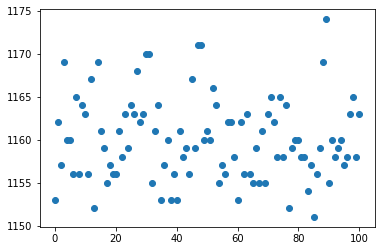

In [ ]:
len(X)
plt.scatter(range(len(X)), X[:,0])
plt.show()

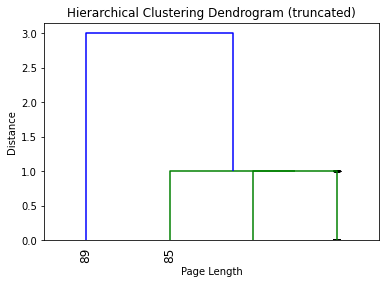

In [ ]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(X, method  = "single")
dendrogram = sch.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Page Length')
plt.ylabel('Distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
c, coph_dists = cophenet(Z, pdist(X))


In [ ]:
c

0.43034308566280005

In [ ]:
np.min(coph_dists)

0.0

In [ ]:
if np.max(coph_dists) < 5:
  

3.0

In [ ]:
dendrogram.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

### Find suitable threshold

In [ ]:
### 

In [ ]:
ip_info_200_http = []
for ip in ip_candidates:
  X = segment[(segment.ip == ip) & (segment.http_status == '200')].iloc[:, [segment.columns.tolist().index('http_page_length')]].values
  domains = segment[(segment.ip == ip) & (segment.http_status == '200')].keyword.unique()
  unique_tlds = set([tld(domain) for domain in domains])
  if len(ip) < 2 or len(unique_tlds) < 3:
    continue
  matched = segment[(segment.ip == ip) & (segment.http_status == '200')].http_match_blockpage.unique()
  # if (True in matched) and (False in matched):
  #   print(ip)
  info = calIPSimilarityHTTP(segment, ip, '200')
  if not info:
    continue
  ip_info_200_http.append(info)
  if True in matched:
    # Z = sch.linkage(X, method  = "single")
    # dendrogram = sch.dendrogram(
    #     Z,
    #     truncate_mode='lastp',  # show only the last p merged clusters
    #     p=4,  # show only the last p merged clusters
    #     show_leaf_counts=False,  # otherwise numbers in brackets are counts
    #     leaf_rotation=90.,
    #     leaf_font_size=12.,
    #     show_contracted=True,
    # )
    # c, coph_dists = cophenet(Z, pdist(X))
    # print(f"{ip} ----- {c}, {np.max(coph_dists)}, {np.min(coph_dists)}, len_tlds={len(unique_tlds)}")
    print(f"{ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}")
  # if (info['standard_deviation'] < 0.2) and (False in matched):
  #   if True in segment[(segment.ip == ip) & (segment.http_status == '200')].http_match_fp_blockpage.unique():
  #     continue
  #   print(f"{ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}, {matched}")
ip_info_200_http = pd.DataFrame(ip_info_200_http)

198.251.90.72 -- 0.07379907477294281, domains=342, tlds=298
212.1.226.59 -- 0.0, domains=329, tlds=298
86.57.224.86 -- 0.0, domains=283, tlds=272
103.153.190.250 -- 0.0, domains=203, tlds=195
62.213.11.249 -- 0.0, domains=171, tlds=161
195.186.208.170 -- 0.0, domains=169, tlds=159
103.247.216.203 -- 0.0, domains=154, tlds=148
193.192.98.40 -- 0.022371575367542633, domains=150, tlds=141
193.192.98.49 -- 0.022034819450716094, domains=150, tlds=141
193.192.98.47 -- 0.02103094374651501, domains=143, tlds=134
193.192.98.48 -- 0.02156277562684047, domains=137, tlds=130
193.192.98.46 -- 0.02117146849865097, domains=137, tlds=129
34.192.178.107 -- 0.0006090377021947774, domains=135, tlds=129
52.6.216.16 -- 0.0009519046819187988, domains=134, tlds=129
3.82.239.251 -- 0.0013202227136409359, domains=135, tlds=129
193.192.98.42 -- 0.020087259295214228, domains=131, tlds=123
193.192.98.45 -- 0.020431430418203056, domains=130, tlds=123
202.137.1.74 -- 0.0, domains=125, tlds=119
202.169.44.80 -- 0.0,

In [ ]:
# One false Positive
ip = '62.149.188.252'
printFirstRow(segment[(segment.ip == ip) & (segment.http_status == '200') & (segment.http_match_blockpage == False)], 'http')


domain: sci-hub.tw, {'status_line': '200 OK', 'headers': {'Accept-Ranges': ['bytes'], 'Content-Length': ['303'], 'Content-Type': ['text/html'], 'Date': ['Mon, 28 Jun 2021 01:06:11 GMT'], 'Etag': ['"5984426793a3d01:0"'], 'Last-Modified': ['Wed, 10 Jun 2015 15:37:48 GMT'], 'Server': ['Microsoft-IIS/7.5'], 'X-Powered-By': ['ASP.NET']}, 'body': '<html>\r\n\r\n<head>\r\n<meta http-equiv="Content-Language" content="it">\r\n<meta http-equiv="Content-Type" content="text/html; charset=windows-1252">\r\n<title>Avviso</title>\r\n</head>\r\n\r\n<body>\r\n\r\n<br><br>\r\n<p align="center"><img border="0" src="logo.jpg" width="700" height="600"></p>\r\n\r\n\r\n</body>\r\n\r\n</html>\r\n'}


In [ ]:
segment[(segment.ip == ip) & (segment.http_status == '200') & (segment.http_match_blockpage == False)].keyword.unique()

array(['sci-hub.tw', 'rutracker.org', 'ytmp3.cc', 'rarbg.to',
       'sci-hub.se', 'yts.mx', '1337x.to', 'y2mate.com',
       'thepiratebay.org', 'online-convert.com'], dtype=object)

In [ ]:
segment[(segment.ip == ip) & (segment.http_status == '200') & (segment.http_match_blockpage == False)]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,http_page_length,https_page_length,keyword_index,http_match_fp_blockpage,https_match_fp_blockpage
19,62.149.188.252,sci-hub.tw,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,...,None,None,None,None,None,663,117,854,False,None
20,62.149.188.252,rutracker.org,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,...,None,None,None,None,None,663,117,842,False,None
21,62.149.188.252,ytmp3.cc,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,...,None,None,None,None,None,663,117,1897,False,None
22,62.149.188.252,rarbg.to,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,...,None,None,None,None,None,663,117,807,False,None
23,62.149.188.252,sci-hub.se,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,...,None,None,None,None,None,663,117,853,False,None
24,62.149.188.252,yts.mx,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,...,None,None,None,None,None,663,117,1898,False,None
25,62.149.188.252,1337x.to,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,...,None,None,None,None,None,663,117,3,False,None
26,62.149.188.252,y2mate.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,...,None,None,None,None,None,663,117,1886,False,None
29,62.149.188.252,thepiratebay.org,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,...,None,None,None,None,None,663,117,972,False,None
33,62.149.188.252,online-convert.com,"{'status_line': '200 OK', 'headers': {'Accept-...","Get ""https://62.149.188.252:443/"": read tcp 14...",True,True,None,200,False,None,...,None,None,None,None,None,663,117,730,False,None


In [ ]:
ip_info_200_https = []
for ip in ip_candidates:
  domains = segment[(segment.ip == ip) & (segment.https_status == '200')].keyword.unique()
  unique_tlds = set([tld(domain) for domain in domains])
  if len(ip) < 2 or len(unique_tlds) < 3:
    continue
  matched = segment[(segment.ip == ip) & (segment.https_status == '200')].https_match_blockpage.unique()
  # if (True in matched) and (False in matched):
  #   print(ip)
  info = calIPSimilarityHTTPS(segment, ip, '200')
  ip_info_200_https.append(info)
  # if True in matched:
  #   print(f"{ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}")
  if (info['standard_deviation'] < 0.2) and (False in matched):
    if True in segment[(segment.ip == ip) & (segment.https_status == '200')].https_match_fp_blockpage.unique():
      continue
    print(f"{ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}, {matched}")
ip_info_200_https = pd.DataFrame(ip_info_200_https)

159.255.26.69 -- 0.0, domains=40, tlds=39, [False]
64.13.192.76 -- 0.09216765012219254, domains=300, tlds=208, [False]
64.13.232.149 -- 0.02856373257597207, domains=296, tlds=206, [False]
64.13.192.74 -- 0.09496844407754465, domains=297, tlds=209, [False]
104.16.252.55 -- 0.03514294464600202, domains=4, tlds=4, [False]
104.16.251.55 -- 0.03564097399561714, domains=4, tlds=4, [False]
104.23.125.189 -- 0.03570609318000041, domains=4, tlds=4, [False]
104.23.124.189 -- 0.03565291095257036, domains=4, tlds=4, [False]
5.189.169.177 -- 0.08233534066265777, domains=140, tlds=132, [False]
121.166.148.201 -- 0.0, domains=141, tlds=125, [False]
103.8.238.25 -- 0.0, domains=109, tlds=104, [False]
40.77.98.162 -- 0.004662275888975884, domains=43, tlds=41, [False]
125.26.170.3 -- 0.0, domains=6, tlds=6, [False]
185.243.57.5 -- 0.04445759739153478, domains=3, tlds=3, [False]
195.7.3.98 -- 0.044550605561644606, domains=3, tlds=3, [False]
204.237.204.79 -- 0.057614167935379816, domains=7, tlds=7, [Fals

In [ ]:
ip = '185.243.57.5'
printFirstRow(segment[(segment.ip == ip) & (segment.https_status == '200') & (segment.https_match_blockpage == False)], 'https')

domain: www.nbc.com, {'status_line': '200 OK', 'headers': {'Access-Control-Allow-Origin': ['*'], 'Cache-Control': ['public, max-age=254'], 'Content-Type': ['text/html; charset=utf-8'], 'Date': ['Mon, 28 Jun 2021 01:11:13 GMT'], 'Etag': ['W/"1afc25-jzeRPlIig07PRRSRsyNqrHYwAjQ"'], 'Last-Modified': ['Mon, 28 Jun 2021 01:10:22 GMT'], 'Server-Timing': ['cdn-cache; desc=HIT', 'edge; dur=13'], 'Vary': ['User-Agent'], 'X-Akamai-Transformed': ['9 241126 0 pmb=mRUM,1'], 'X-Frame-Options': ['SAMEORIGIN'], 'X-Powered-By': ['generetic-1.185.26']}, 'body': '<!DOCTYPE html><html lang="en-US" class="responsive">\n      <head>\n        \n          <script type="text/javascript" data-platform="web" data-params=\'{"name":"homepage"}\'>\n            !function(e){var n={};function t(r){if(n[r])return n[r].exports;var a=n[r]={i:r,l:!1,exports:{}};return e[r].call(a.exports,a,a.exports,t),a.l=!0,a.exports}t.m=e,t.c=n,t.d=function(e,n,r){t.o(e,n)||Object.defineProperty(e,n,{enumerable:!0,get:r})},t.r=function

In [ ]:
segment[(segment.ip == ip) & (segment.https_status == '200') & (segment.https_match_blockpage == False)].keyword.unique()

array(['www.pornhub.com', 'www.xvideos.com', 'blogspot.com',
       'www.mediafire.com', 'www.888casino.com', 'bild.de'], dtype=object)

In [ ]:
matched = segment[(segment.ip == '193.192.98.40') & (segment.http_status == '200')].http_match_blockpage.unique()

In [ ]:
segment[(segment.ip == '198.251.90.72') & (segment.http_status == '200')]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,...,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country,http_page_length,https_page_length,keyword_index,http_match_fp_blockpage,https_match_fp_blockpage
39045,198.251.90.72,www.victoriassecret.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,True,True,<title>Website Filtered</title>,NetAlerts,None,1164,1912,1816,False,False
39047,198.251.90.72,www.bittorrent.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,True,True,<title>Website Filtered</title>,NetAlerts,None,1159,1895,1186,False,False
39053,198.251.90.72,www.nifty.org,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,True,True,<title>Website Filtered</title>,NetAlerts,None,1154,1878,1581,False,False
39056,198.251.90.72,premierbet.co.ao,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,True,True,<title>Website Filtered</title>,NetAlerts,None,1157,1889,782,False,False
39068,198.251.90.72,www.privateinternetaccess.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,True,True,<title>Website Filtered</title>,NetAlerts,None,1170,1938,1654,False,False
39069,198.251.90.72,www.playboy.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,True,True,<title>Website Filtered</title>,NetAlerts,None,1156,1884,1641,False,False
39070,198.251.90.72,nyaa.si,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,True,True,<title>Website Filtered</title>,NetAlerts,None,1148,1852,713,False,False
39071,198.251.90.72,www.xroxy.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,True,True,<title>Website Filtered</title>,NetAlerts,None,1154,1878,1861,False,False
39081,198.251.90.72,spotify.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,True,True,<title>Website Filtered</title>,NetAlerts,None,1152,1868,910,False,False
39082,198.251.90.72,www.purevpn.com,"{'status_line': '200 OK', 'headers': {'Access-...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,200,True,<title>Website Filtered</title>,...,True,True,<title>Website Filtered</title>,NetAlerts,None,1156,1884,1660,False,False


# Other dates

In [ ]:
!rm 202*

In [ ]:
special_ips = {
    '404': ['104.244.45.246', '172.217.5.206', '216.58.208.211', '142.250.72.238', '64.233.165.99', '173.194.73.94', 
            '64.233','199.59', '199.16'],
    '400': ['157.240', '31.13'],
    '204': ['194.150.168.170'],
    '200': ['159.255.26.69', '103.148.28.29', '121.166.148.201', '202.87.221.61', '94.177.179.144', '46.97.193.127', '54.253.148.58', '13.211.116.246',
            '195.201.118.189', '203.104.153.16', '64.13.232.149', '13.55.216.130', '52.64.227.94', '45.129.97.29', '75.126.150.210',
            '46.8.221.34', '185.217', '46.17', '194.87.237.236'],
    '301': ['208.82.16.81'],
}

In [ ]:
%%bigquery --project firehook-censoredplanet date
SELECT 
  distinct date
FROM
  `firehook-censoredplanet.laplante.satellite_blockpage_scan`
# WHERE
#   date > "2021-01-01" and date < '2021-10-01'
  # AND anomaly = True
  # AND rcode = 0
  # AND error not like "%dns: short read%"
# why is the has_type_a None?
sorted(date.date.unique().tolist())

In [ ]:
sorted(date.date.unique().tolist())

[datetime.date(2021, 3, 16),
 datetime.date(2021, 3, 17),
 datetime.date(2021, 3, 21),
 datetime.date(2021, 3, 24),
 datetime.date(2021, 3, 28),
 datetime.date(2021, 3, 31),
 datetime.date(2021, 4, 4),
 datetime.date(2021, 4, 7),
 datetime.date(2021, 4, 11),
 datetime.date(2021, 4, 14),
 datetime.date(2021, 4, 18),
 datetime.date(2021, 4, 21),
 datetime.date(2021, 4, 25),
 datetime.date(2021, 4, 28),
 datetime.date(2021, 5, 2),
 datetime.date(2021, 5, 5),
 datetime.date(2021, 5, 9),
 datetime.date(2021, 5, 12),
 datetime.date(2021, 5, 16),
 datetime.date(2021, 5, 23),
 datetime.date(2021, 5, 26),
 datetime.date(2021, 5, 30),
 datetime.date(2021, 6, 20),
 datetime.date(2021, 6, 23),
 datetime.date(2021, 6, 27),
 datetime.date(2021, 6, 30),
 datetime.date(2021, 7, 4),
 datetime.date(2021, 7, 7),
 datetime.date(2021, 7, 11),
 datetime.date(2021, 7, 21),
 datetime.date(2021, 7, 25),
 datetime.date(2021, 7, 28),
 datetime.date(2021, 8, 1),
 datetime.date(2021, 8, 4),
 datetime.date(2021, 8,

In [ ]:
len(date)

12

In [3]:
date = '2021-04-28'

In [4]:
%%bigquery --project firehook-censoredplanet blockpage_scan
SELECT 
  domain,
  ip,
  date,
  https,
  received_status,
  received_body,
  received_headers,
  # received_tls_version,
  # received_tls_cipher_suite,
  # received_tls_cert,
FROM
  `firehook-censoredplanet.laplante.satellite_blockpage_scan`
WHERE
  date = '2021-04-28' AND
  https = False

KeyboardInterrupt: ignored

In [ ]:
blockpage_scan.head()

,domain,ip,date,https,received_status,received_body,received_headers
0,www.gotgayporn.com,34.206.223.41,2022-02-16,False,200 OK,"\n\n\n\n\n<!DOCTYPE html>\n\n<html lang=""en"">\...","[Content-Type: text/html; charset=utf-8, Date:..."
1,flirtylingerie.com,34.206.223.41,2022-02-16,False,200 OK,"\n\n\n\n\n<!DOCTYPE html>\n\n<html lang=""en"">\...","[Content-Type: text/html; charset=utf-8, Date:..."
2,www.akdn.org,23.41.29.169,2022-02-16,False,301 Moved Permanently,,"[Access-Control-Allow-Credentials: false, Acce..."
3,weather.com,23.7.209.83,2022-02-16,False,301 Moved Permanently,,"[Access-Control-Allow-Credentials: false, Acce..."
4,www.163.com,180.127.43.62,2022-02-16,False,301 Moved Permanently,,"[Cache-Control: no-cache,no-store,private, Cdn..."


In [ ]:
blockpage_scan.shape

(1769526, 7)

## HTTP

### Get status

In [ ]:
def matchListItem(content, l):
    matched = [fp for fp in l if fp in content]
    if len(matched) == 0:
        return -1
    else:
        return matched[0]

def matchList(content, l):
    return any([e in str(content) for e in l])
status_200 = []
all_status = set()
for status in blockpage_scan.received_status.unique():
  if matchList(status, ["Get", "net", "EOF", 'read']):
    continue
  if '200' in status:
    status_200.append(status)
    print(status)
  all_status.add(status)
number2status = {}
for status in all_status:
  number = status.split(' ')[0]
  if number not in number2status:
    number2status[number] = []
  number2status[number].append(status)

200 OK
200 
200 200


In [ ]:
number2status

{'200': ['200 OK', '200 '],
 '204': ['204 No Content'],
 '301': ['301 Moved Permanently',
  '301 Redirect',
  '301 MOVED PERMANENTLY',
  '301 Moved permanently',
  '301 Moved',
  '301 TLS Redirect',
  '301 Moved Permanently ',
  '301 ',
  '301 Unknown Error'],
 '302': ['302 Moved Temporarily',
  '302 Redirect',
  '302 ',
  '302 Moved',
  '302 Found ',
  '302 https://slate.com/',
  '302 FOUND',
  '302 Moved temporarily',
  '302 Found'],
 '303': ['303 See Other'],
 '307': ['307 Temporary Redirect', '307 Moved Temporarily'],
 '308': ['308 Unknown', '308 Permanent Redirect'],
 '400': ['400 Bad Request, Wrong Domain Host.',
  '400 default_vip_400',
  '400 ',
  '400 Bad Request'],
 '401': ['401 Authorization Required', '401 Unauthorized'],
 '403': ['403 Forbidden', '403 OK'],
 '404': ['404 Not found',
  '404 Vhost unknown.',
  '404 NOT FOUND',
  '404 ',
  '404 NotFound',
  "404 Impossibile trovare l'oggetto.",
  '404 Unknown virtual host',
  '404 Site Not Found',
  '404 404',
  '404 Not Foun

In [ ]:
len(number2status)

30

### Find blockpages

In [ ]:
def matchFingerprint(html):
  # if type(html) is not dict:
  #   return None
  html = str(html)
  if matchList(html, fp_fingerprints):
    #print(matchListItem(html, fp_fingerprints))
    return False
  return matchList(html, fingerprints)

def matchFPFingerprint(html):
  # if type(html) is not dict:
  #   return None
  html = str(html)
  if matchList(html, fp_fingerprints):
    return True
  return False

def findMatchedFingerprint(find, html):
  if not find:
    return None
  return matchListItem(str(html), fingerprints)

def getFirstRow(df, ip, status_list):
  for _, row in df[(df.ip == ip)&(df.received_status.isin(status_list))].iterrows():
    return row['received_page']

def calIPSimilarityHTTP(df, ip, status_list):
    page_length = df[(df.ip == ip) & (df.received_status.isin(status_list))].http_page_length
    if len(page_length) == 0:
        return None
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = df[(df.ip == ip) & (df.received_status.isin(status_list))].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    return {'ip': ip,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,}

In [ ]:
blockpage_scan['keyword'] = blockpage_scan['domain']
blockpage_scan['received_page'] =  blockpage_scan.received_headers.astype(str) + blockpage_scan.received_body.astype(str)
blockpage_scan['http_match_blockpage'] = blockpage_scan.received_page.apply(matchFingerprint)
blockpage_scan['http_match_fp_blockpage'] = blockpage_scan.received_page.apply(matchFPFingerprint)
blockpage_scan['http_matched_blockpage'] = blockpage_scan.apply(lambda x: findMatchedFingerprint(x.http_match_blockpage, x.received_page), axis=1)
blockpage_scan['http_page_length'] = blockpage_scan.received_page.apply(lambda x: len(str(x)))

for status in number2status.keys():
  if '3' in status:
    continue
  
  print(f"!!! Starting checking {status} on {date}!!!")
  all_ips = getOrderedCount(blockpage_scan[blockpage_scan.received_status.isin(number2status[status])].ip)
  segment = blockpage_scan[blockpage_scan.received_status.isin(number2status[status])]
  #print(segment.shape)
  ip_candidates = []
  #print(all_ips)
  for ip, _ in all_ips:
    if segment[segment.ip==ip].keyword.nunique() > 1:
      http_200_count = segment[(segment.ip==ip)].shape[0]
      if http_200_count  > 1:
        ip_candidates.append(ip)
  #print(ip_candidates)
  ip_info = []
  for ip in ip_candidates:
    if status in special_ips and matchList(ip, special_ips[status]):
      continue
    domains = segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].keyword.unique()
    unique_tlds = set([tld(domain) for domain in domains])
    if len(ip) < 2 or len(unique_tlds) < 3:
      continue
    matched = segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].http_match_blockpage.unique()
    # if (True in matched) and (False in matched):
    #   print(ip)
    info = calIPSimilarityHTTP(segment, ip, number2status[status])
    if not info:
      # print("no info")
      continue
    if True in matched:
      print(f"TP - {ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}")
    if (info['standard_deviation'] < 0.2) and (True not in matched):
      if True in segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].http_match_fp_blockpage.unique():
        print(f"FP - {ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}")
        continue
      ip_info.append(info)
      print(f"{ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}, {matched}")
  print(f"!!! Finishing checking {status} on {date}, {len(ip_info)} found!!!\n")
  if len(ip_info) == 0:
    continue
  ip_info = pd.DataFrame(ip_info)

  ip_info['content'] = ip_info.ip.apply(lambda x: getFirstRow(segment, x, number2status[status]
                                                                                ))
  ip_info['domains'] = ip_info.ip.apply(lambda x: segment[segment.ip == x].keyword.unique())
  ip_info.to_csv(f'{date}_http_{status}.csv', encoding='utf-8', index=False)

!!! Starting checking 406 on 2022-Jan-Mar!!!
!!! Finishing checking 406 on 2022-Jan-Mar, 0 found!!!

!!! Starting checking 429 on 2022-Jan-Mar!!!
!!! Finishing checking 429 on 2022-Jan-Mar, 0 found!!!

!!! Starting checking 501 on 2022-Jan-Mar!!!
FP - 140.205.220.96 -- 0.021994021205891588, domains=6, tlds=6
FP - 140.205.94.189 -- 0.023404809622485888, domains=6, tlds=6
FP - 140.205.94.193 -- 0.012268098990344565, domains=5, tlds=5
FP - 140.205.130.99 -- 0.012486122193562715, domains=5, tlds=5
!!! Finishing checking 501 on 2022-Jan-Mar, 0 found!!!

!!! Starting checking 421 on 2022-Jan-Mar!!!
FP - 130.211.15.150 -- 0.1322165045125384, domains=365, tlds=281
FP - 146.158.48.24 -- 0.0, domains=5, tlds=5
FP - 146.158.54.24 -- 0.0, domains=5, tlds=5
FP - 146.158.52.24 -- 0.0, domains=5, tlds=5
FP - 34.107.251.210 -- 0.004973584515632096, domains=5, tlds=5
!!! Finishing checking 421 on 2022-Jan-Mar, 0 found!!!

!!! Starting checking 404 on 2022-Jan-Mar!!!
FP - 23.234.30.58 -- 0.0, domains=20

In [ ]:
# !rm 2021-03*
ip_info.to_csv(f'2021-Mar-June_http_{status}_FP.csv', encoding='utf-8', index=False)

In [ ]:
def matchFPFingerprint(html):
  # if type(html) is not dict:
  #   return None
  html = str(html)
  if matchList(html, fp_fingerprints):
    print(matchListItem(html, fp_fingerprints))
    return True
  return False
for _, row in ip_info.iterrows():
  # if '193.58.251.1' == row['ip']:
  #   
  print(matchFPFingerprint(row['content']))

Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True
Server: nginx/1
True


In [ ]:
for fp in fp_fingerprints:
  if "<script defer src=" in fp:
    print(fp)
    break

<body>\nnothing here\n<script defer src="https://www.fastly-insights.com


### Redirects

In [ ]:
tld('www.google.com')

'google'

In [ ]:
def reverseList2Dict(l):
  string = ', '.join(l)
  string = '{' + string + '}'
  try:
    res = ast.literal_eval(string)
  except:
    res = string
  return res


def redirectMatch(location, domain):
  return tld(domain) in location
def getBQredLoc(l):
  location = None
  for item in l:
    if "Location" in item:
      location = item.split(': ')[1]
  return location
all_ips = getOrderedCount(blockpage_scan[blockpage_scan.received_status.isin(number2status['301'] + number2status['302'])].ip)
segment = blockpage_scan[blockpage_scan.received_status.isin(number2status['301'] + number2status['302'])]
segment['location'] = segment.received_headers.apply(lambda x: getBQredLoc(x))
segment['redirect_match'] = segment.apply(lambda x: redirectMatch(x.location, x.keyword), axis=1)

all_ips = getOrderedCount(segment[segment['redirect_match'] == False].ip)
segment = segment[segment['redirect_match'] == False]

for status in ['301', '302', '303', '307', '308']:
  
  if status not in number2status:
    continue
  ip_candidates = []
  for ip, _ in all_ips:
    if segment[segment.ip==ip].keyword.nunique() > 1:
      http_200_count = segment[(segment.ip==ip)].shape[0]
      if http_200_count  > 1:
        ip_candidates.append(ip)
  ip_info = []
  for ip in ip_candidates:
    domains = segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].keyword.unique()
    unique_tlds = set([tld(domain) for domain in domains])
    if len(ip) < 2 or len(unique_tlds) < 3:
      continue
    matched = segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].http_match_blockpage.unique()
    # if (True in matched) and (False in matched):
    #   print(ip)
    info = calIPSimilarityHTTP(segment, ip, number2status[status])
    if not info:
      # print("no info")
      continue
    if True in matched:
      print(f"TP - {ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}")
    if (info['standard_deviation'] < 0.2) and (True not in matched):
      if True in segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].http_match_fp_blockpage.unique():
        print(f"FP - {ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}")
        continue
      ip_info.append(info)
      print(f"{ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}, {matched}")
  print(f"!!! Finishing checking {status} on {date}, {len(ip_info)} found!!!\n")
  if len(ip_info) != 0:
    ip_info = pd.DataFrame(ip_info)

    ip_info['content'] = ip_info.ip.apply(lambda x: getFirstRow(segment, x, number2status[status]
                                                                                  ))
    ip_info['domains'] = ip_info.ip.apply(lambda x: segment[segment.ip == x].keyword.unique())
    ip_info.to_csv(f'{date}_http_{status}.csv', encoding='utf-8', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


FP - 36.86.63.185 -- 0.0, domains=178, tlds=169
FP - 185.14.32.3 -- 0.0, domains=150, tlds=130
FP - 203.99.130.131 -- 0.0, domains=176, tlds=167
FP - 202.56.160.131 -- 0.0, domains=176, tlds=167
FP - 103.105.52.205 -- 0.0, domains=174, tlds=165
FP - 188.186.157.49 -- 0.0, domains=176, tlds=159
200.45.2.157 -- 0.0, domains=1083, tlds=1014, [False]
FP - 158.140.186.3 -- 0.0, domains=138, tlds=131
FP - 202.56.160.132 -- 0.0, domains=158, tlds=149
TP - 114.129.23.9 -- 0.16996751724519968, domains=75, tlds=70
FP - 213.243.196.14 -- 0.015340655450581062, domains=20, tlds=20
FP - 180.180.255.130 -- 0.0, domains=26, tlds=24
FP - 195.182.192.10 -- 0.0, domains=17, tlds=15
TP - 202.73.24.178 -- 0.13104192716891258, domains=54, tlds=54
FP - 218.214.213.150 -- 0.0, domains=55, tlds=54
TP - 167.233.14.14 -- 0.0, domains=3, tlds=3
TP - 195.129.111.51 -- 0.02089100793827238, domains=6, tlds=6
FP - 195.234.22.137 -- 0.0, domains=4, tlds=4
FP - 91.224.68.5 -- 0.0, domains=11, tlds=10
92.61.36.174 -- 0.

In [ ]:
for fp in fingerprints:
  if 'Location: http://nba.gov.cy' in fp:
    print(fp)


Location: http://nba.gov.cy/


In [ ]:
!rm fingerprints*

In [ ]:
date

'2021-03-21'

In [ ]:
len(fingerprints)

440

In [ ]:
for _, row in ip_info.iterrows():
  # if '193.58.251.1' == row['ip']:
  #   
  if (matchList(row['content'], ['<a href="https://sehat.hypernet.co.id/"'])):
    print(matchFingerprint(row['content']))

True


In [ ]:
# sanity check - does IP that have mismatches also have matches?
for ip, count in all_ips:
  if True in segment[segment.ip == ip].redirect_match.unique():
    print(ip, count)

204.110.220.2 435
50.18.219.153 399
45.32.203.129 333
185.217.199.167 34
94.130.124.121 4
176.9.6.246 3
176.9.122.215 3
5.196.128.118 3
176.9.122.183 3
212.143.162.130 2
136.243.128.218 2
80.97.209.227 2
203.121.59.105 2
177.69.235.72 2
81.243.1.208 2
186.125.155.56 2
80.239.237.50 2
81.242.3.208 2
184.28.173.83 2
92.123.106.210 2
186.189.194.219 2
179.185.57.99 2
23.196.229.115 2
118.97.158.217 2
80.239.254.23 2
184.150.70.96 2
200.42.50.9 2
86.51.81.144 2
171.102.244.122 2
210.132.245.203 2
92.122.225.35 2
193.247.43.178 2
23.223.244.114 2
80.239.150.56 2
95.166.124.154 2
23.58.93.104 2
190.98.144.179 2
190.98.142.74 2
213.57.23.179 2
23.59.175.120 2
92.123.106.131 2
80.239.150.74 2
72.246.196.186 2
111.94.254.64 2
49.231.114.185 2
119.110.115.202 2
186.215.125.136 2
117.239.141.115 2
122.155.237.219 2
210.57.59.208 2
114.4.168.41 2
209.148.204.83 2
193.246.48.136 2
42.106.164.43 2
72.246.151.139 2
121.119.254.185 2
27.67.51.57 2
92.123.48.128 2
184.84.166.121 2
217.31.233.57 2
118.9

114.6.128.8 -- 0.0, domains=108, tlds=103, [False]
75.2.78.201 -- 0.0, domains=48, tlds=44, [False]
99.83.232.37 -- 0.0, domains=48, tlds=44, [False]
FP - 212.49.118.125 -- 0.0, domains=37, tlds=34
185.217.199.167 -- 0.0, domains=34, tlds=34, [False]
FP - 54.242.237.204 -- 0.0, domains=29, tlds=24
163.28.10.160 -- 0.0, domains=21, tlds=18, [False]
TP - 31.170.23.248 -- 0.0, domains=11, tlds=11
TP - 83.235.76.20 -- 0.0, domains=10, tlds=10
159.138.1.62 -- 0.020430300793176204, domains=9, tlds=6, [False]
193.113.9.167 -- 0.0, domains=6, tlds=6, [False]
145.237.235.240 -- 0.0, domains=5, tlds=5, [False]
83.235.76.18 -- 0.0, domains=4, tlds=4, [False]
FP - 0.0.0.0 -- 0.0, domains=4, tlds=4
64.196.237.41 -- 0.013819406165208338, domains=3, tlds=3, [False]
!!! Finishing checking 302 on 2021-09-29, 10 found!!!



In [ ]:
len(ip_info)

10

In [ ]:
segment[segment.keyword == 'www.dcma.mil']

,domain,ip,date,https,received_status,received_body,received_headers,received_tls_version,received_tls_cipher_suite,received_tls_cert,keyword,received_page,http_match_blockpage,http_match_fp_blockpage,http_matched_blockpage,http_page_length,location,redirect_match
4422,www.dcma.mil,197.80.130.51,2021-09-29,False,301 Moved Permanently,,"[Content-Length: 0, Date: Wed, 29 Sep 2021 22:...",None,None,None,www.dcma.mil,"['Content-Length: 0', 'Date: Wed, 29 Sep 2021 ...",False,False,None,118,https://www.dcma.mil/,True
4440,www.dcma.mil,114.4.168.48,2021-09-29,False,301 Moved Permanently,,"[Content-Length: 0, Date: Wed, 29 Sep 2021 22:...",None,None,None,www.dcma.mil,"['Content-Length: 0', 'Date: Wed, 29 Sep 2021 ...",False,False,None,118,https://www.dcma.mil/,True
4522,www.dcma.mil,130.105.254.25,2021-09-29,False,301 Moved Permanently,,"[Content-Length: 0, Date: Wed, 29 Sep 2021 22:...",None,None,None,www.dcma.mil,"['Content-Length: 0', 'Date: Wed, 29 Sep 2021 ...",False,False,None,118,https://www.dcma.mil/,True
4537,www.dcma.mil,203.177.62.70,2021-09-29,False,301 Moved Permanently,,"[Content-Length: 0, Date: Wed, 29 Sep 2021 22:...",None,None,None,www.dcma.mil,"['Content-Length: 0', 'Date: Wed, 29 Sep 2021 ...",False,False,None,118,https://www.dcma.mil/,True
4555,www.dcma.mil,217.31.233.57,2021-09-29,False,301 Moved Permanently,,"[Content-Length: 0, Date: Wed, 29 Sep 2021 22:...",None,None,None,www.dcma.mil,"['Content-Length: 0', 'Date: Wed, 29 Sep 2021 ...",False,False,None,118,https://www.dcma.mil/,True
4635,www.dcma.mil,58.27.86.155,2021-09-29,False,301 Moved Permanently,,"[Content-Length: 0, Date: Wed, 29 Sep 2021 22:...",None,None,None,www.dcma.mil,"['Content-Length: 0', 'Date: Wed, 29 Sep 2021 ...",False,False,None,118,https://www.dcma.mil/,True
4654,www.dcma.mil,190.98.140.27,2021-09-29,False,301 Moved Permanently,,"[Content-Length: 0, Date: Wed, 29 Sep 2021 23:...",None,None,None,www.dcma.mil,"['Content-Length: 0', 'Date: Wed, 29 Sep 2021 ...",False,False,None,118,https://www.dcma.mil/,True
4662,www.dcma.mil,80.239.137.144,2021-09-29,False,301 Moved Permanently,,"[Content-Length: 0, Date: Wed, 29 Sep 2021 23:...",None,None,None,www.dcma.mil,"['Content-Length: 0', 'Date: Wed, 29 Sep 2021 ...",False,False,None,118,https://www.dcma.mil/,True
4692,www.dcma.mil,82.102.152.194,2021-09-29,False,301 Moved Permanently,,"[Content-Length: 0, Date: Wed, 29 Sep 2021 23:...",None,None,None,www.dcma.mil,"['Content-Length: 0', 'Date: Wed, 29 Sep 2021 ...",False,False,None,118,https://www.dcma.mil/,True
4706,www.dcma.mil,121.119.254.185,2021-09-29,False,301 Moved Permanently,,"[Content-Length: 0, Date: Wed, 29 Sep 2021 23:...",None,None,None,www.dcma.mil,"['Content-Length: 0', 'Date: Wed, 29 Sep 2021 ...",False,False,None,118,https://www.dcma.mil/,True


In [ ]:
segment.head()

,domain,ip,date,https,received_status,received_body,received_headers,keyword,received_page,http_match_blockpage,http_match_fp_blockpage,http_matched_blockpage,http_page_length
3703,bongacams.com,46.97.193.127,2021-09-29,False,200 OK,,"[Content-Length: 0, Content-Type: text/html, D...",bongacams.com,"['Content-Length: 0', 'Content-Type: text/html...",False,False,None,174
3704,www.hotspotshield.com,46.97.193.127,2021-09-29,False,200 OK,,"[Content-Length: 0, Content-Type: text/html, D...",www.hotspotshield.com,"['Content-Length: 0', 'Content-Type: text/html...",False,False,None,174
5511,indianexpress.com,54.173.62.149,2021-09-29,False,200 OK,Don't stay here please goto www.india.com\n,"[Content-Length: 42, Content-Type: text/html; ...",indianexpress.com,"['Content-Length: 42', 'Content-Type: text/htm...",False,False,None,279
5512,indiatimes.com,54.173.62.149,2021-09-29,False,200 OK,Don't stay here please goto www.india.com\n,"[Content-Length: 42, Content-Type: text/html; ...",indiatimes.com,"['Content-Length: 42', 'Content-Type: text/htm...",False,False,None,279
5517,wikipedia.org,64.13.192.74,2021-09-29,False,200 OK,<html>\n<body>\n<!-- default -->\n</body>\n</h...,"[Accept-Ranges: none, Content-Length: 47, Cont...",wikipedia.org,"['Accept-Ranges: none', 'Content-Length: 47', ...",False,False,None,251


In [ ]:
segment[segment.http_match_blockpage == True]

,domain,ip,date,https,received_status,received_body,received_headers,keyword,received_page,http_match_blockpage,http_match_fp_blockpage,http_matched_blockpage,http_page_length,http_status
5540,www.eurogrand.com,202.138.224.15,2021-09-29,False,200 OK,"<html>\n<body>\n<head>\n<meta http-equiv=""refr...","[Content-Length: 128, Content-Type: text/html,...",www.eurogrand.com,"['Content-Length: 128', 'Content-Type: text/ht...",True,False,www.melsa.net.id/main/blocked,347,200
5541,www.ultimate-anonymity.com,202.138.224.15,2021-09-29,False,200 OK,"<html>\n<body>\n<head>\n<meta http-equiv=""refr...","[Content-Length: 128, Content-Type: text/html,...",www.ultimate-anonymity.com,"['Content-Length: 128', 'Content-Type: text/ht...",True,False,www.melsa.net.id/main/blocked,347,200
5542,yts.mx,202.138.224.15,2021-09-29,False,200 OK,"<html>\n<body>\n<head>\n<meta http-equiv=""refr...","[Content-Length: 128, Content-Type: text/html,...",yts.mx,"['Content-Length: 128', 'Content-Type: text/ht...",True,False,www.melsa.net.id/main/blocked,347,200
5543,www.budweiser.com,202.138.224.15,2021-09-29,False,200 OK,"<html>\n<body>\n<head>\n<meta http-equiv=""refr...","[Content-Length: 128, Content-Type: text/html,...",www.budweiser.com,"['Content-Length: 128', 'Content-Type: text/ht...",True,False,www.melsa.net.id/main/blocked,347,200
5544,www.gayhealth.com,202.138.224.15,2021-09-29,False,200 OK,"<html>\n<body>\n<head>\n<meta http-equiv=""refr...","[Content-Length: 128, Content-Type: text/html,...",www.gayhealth.com,"['Content-Length: 128', 'Content-Type: text/ht...",True,False,www.melsa.net.id/main/blocked,347,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89388,www.figleaves.com,3.225.228.53,2021-09-29,False,200 OK,"\n\n\n\n\n<!DOCTYPE html>\n\n<html lang=""en"">\...","[Content-Type: text/html; charset=utf-8, Date:...",www.figleaves.com,"['Content-Type: text/html; charset=utf-8', 'Da...",True,False,<title>Website Blocked</title>,65706,200
89389,www.chantelle.com,3.225.228.53,2021-09-29,False,200 OK,"\n\n\n\n\n<!DOCTYPE html>\n\n<html lang=""en"">\...","[Content-Type: text/html; charset=utf-8, Date:...",www.chantelle.com,"['Content-Type: text/html; charset=utf-8', 'Da...",True,False,<title>Website Blocked</title>,65706,200
89390,sexetc.org,3.225.228.53,2021-09-29,False,200 OK,"\n\n\n\n\n<!DOCTYPE html>\n\n<html lang=""en"">\...","[Content-Type: text/html; charset=utf-8, Date:...",sexetc.org,"['Content-Type: text/html; charset=utf-8', 'Da...",True,False,<title>Website Blocked</title>,65706,200
89391,www.babylon-x.com,3.225.228.53,2021-09-29,False,200 OK,"\n\n\n\n\n<!DOCTYPE html>\n\n<html lang=""en"">\...","[Content-Type: text/html; charset=utf-8, Date:...",www.babylon-x.com,"['Content-Type: text/html; charset=utf-8', 'Da...",True,False,<title>Website Blocked</title>,65706,200


159.255.26.69 -- 0.0, domains=397, tlds=336, [False]
202.182.98.125 -- 0.002479610679204324, domains=208, tlds=148, [False]
121.166.148.201 -- 0.0, domains=120, tlds=106, [False]
103.148.28.29 -- 0.0, domains=114, tlds=109, [False]
43.230.5.46 -- 0.0, domains=114, tlds=109, [False]
88.81.212.162 -- 0.0, domains=65, tlds=58, [False]
46.97.193.127 -- 0.0, domains=18, tlds=18, [False]
94.177.179.144 -- 0.06230120384069637, domains=17, tlds=17, [False]
185.217.199.167 -- 0.0, domains=16, tlds=16, [False]
98.159.108.58 -- 0.1433334924172159, domains=8, tlds=8, [False]
194.87.237.236 -- 0.0, domains=5, tlds=3, [False]
213.108.104.108 -- 0.0, domains=3, tlds=3, [False]
95.85.26.242 -- 0.0, domains=3, tlds=3, [False]
195.201.118.189 -- 0.0, domains=3, tlds=3, [False]
46.32.240.45 -- 0.0, domains=3, tlds=3, [False]


In [ ]:
len(ip_info_200_http)

15

In [ ]:
ip_info_200_http.shape

(15, 7)

In [ ]:
date

'2021-09-15'

In [ ]:
ip = '23.23.127.252'
segment[segment.ip == '23.23.127.252']
segment[(segment.ip == ip) & (segment.http_status == '200')].http_match_blockpage.unique()

array([ True])

## HTTPS

In [ ]:
%%bigquery --project firehook-censoredplanet all_dates
SELECT 
  distinct date
FROM
  `firehook-censoredplanet.laplante.satellite_blockpage_scan`
# WHERE
#   date > "2021-01-01" and date < '2021-10-01'
  # AND anomaly = True
  # AND rcode = 0
  # AND error not like "%dns: short read%"
# why is the has_type_a None?


In [ ]:
sorted(all_dates.date.unique().tolist())

[datetime.date(2021, 3, 16),
 datetime.date(2021, 3, 17),
 datetime.date(2021, 3, 21),
 datetime.date(2021, 3, 24),
 datetime.date(2021, 3, 28),
 datetime.date(2021, 3, 31),
 datetime.date(2021, 4, 4),
 datetime.date(2021, 4, 7),
 datetime.date(2021, 4, 11),
 datetime.date(2021, 4, 14),
 datetime.date(2021, 4, 18),
 datetime.date(2021, 4, 21),
 datetime.date(2021, 4, 25),
 datetime.date(2021, 4, 28),
 datetime.date(2021, 5, 2),
 datetime.date(2021, 5, 5),
 datetime.date(2021, 5, 9),
 datetime.date(2021, 5, 12),
 datetime.date(2021, 5, 16),
 datetime.date(2021, 5, 23),
 datetime.date(2021, 5, 26),
 datetime.date(2021, 5, 30),
 datetime.date(2021, 6, 20),
 datetime.date(2021, 6, 23),
 datetime.date(2021, 6, 27),
 datetime.date(2021, 6, 30),
 datetime.date(2021, 7, 4),
 datetime.date(2021, 7, 7),
 datetime.date(2021, 7, 11),
 datetime.date(2021, 7, 21),
 datetime.date(2021, 7, 25),
 datetime.date(2021, 7, 28),
 datetime.date(2021, 8, 1),
 datetime.date(2021, 8, 4),
 datetime.date(2021, 8,

In [3]:
%%bigquery --project firehook-censoredplanet blockpage_scan
SELECT 
  domain,
  ip,
  date,
  https,
  received_status,
  received_body,
  received_headers,
  # received_tls_version,
  # received_tls_cipher_suite,
  # received_tls_cert,
FROM
  `firehook-censoredplanet.laplante.satellite_blockpage_scan`
WHERE
  date = '2021-11-28' AND 
  #received_status like '200%' AND
  https = True

In [4]:
date='2021-11-28'

In [5]:
blockpage_scan.head()

,domain,ip,date,https,received_status,received_body,received_headers
0,target.com,209.95.51.187,2021-11-28,True,"Get ""https://209.95.51.187:443/"": EOF",None,[]
1,www.riverbelle.com,89.119.85.45,2021-11-28,True,"Get ""https://89.119.85.45:443/"": EOF",None,[]
2,www.eurogrand.com,89.119.85.45,2021-11-28,True,"Get ""https://89.119.85.45:443/"": EOF",None,[]
3,www.globet.com,89.119.85.45,2021-11-28,True,"Get ""https://89.119.85.45:443/"": EOF",None,[]
4,sakhr.com,217.172.98.78,2021-11-28,True,EOF,None,[]


In [6]:
blockpage_scan.shape

(97464, 7)

In [7]:
def matchListItem(content, l):
    matched = [fp for fp in l if fp in content]
    if len(matched) == 0:
        return -1
    else:
        return matched[0]

def matchList(content, l):
    return any([e in str(content) for e in l])
status_200 = []
all_status = set()
for status in blockpage_scan.received_status.unique():
  if matchList(status, ["Get", "net", "EOF", 'read']):
    continue
  if '200' in status:
    status_200.append(status)
    print(status)
  all_status.add(status)
number2status = {}
for status in all_status:
  number = status.split(' ')[0]
  if number not in number2status:
    number2status[number] = []
  number2status[number].append(status)
  
status_200 = []
all_status = set()
for status in blockpage_scan.received_status.unique():
  if matchList(status, ["Get", "net", "EOF", 'read']):
    continue
  if '200' in status:
    status_200.append(status)
    print(status)
  all_status.add(status)
number2status = {}
for status in all_status:
  number = status.split(' ')[0]
  if number not in number2status:
    number2status[number] = []
  number2status[number].append(status)

number2status

200 OK
200 200
200 
200 Ok
200 OK
200 200
200 
200 Ok


{'200': ['200 OK', '200 Ok', '200 ', '200 200'],
 '204': ['204 No Content'],
 '301': ['301 MOVED PERMANENTLY',
  '301 Moved Permanently',
  '301 https://www.wired.com/',
  '301 ',
  '301 301',
  '301 https://www.zeit.de/index',
  '301 Moved',
  '301 Permanent Redirect to https www domain',
  '301 Apex Redirect',
  '301 Unknown Error',
  '301 Redirect'],
 '302': ['302 Moved Temporarily',
  '302 ',
  '302 Found',
  '302 Moved',
  '302 Moved temporarily',
  '302 Redirect'],
 '303': ['303 See Other'],
 '307': ['307 Moved Temporarily',
  '307 Temporary Redirect',
  '307 TEMPORARY REDIRECT'],
 '308': ['308 Permanent Redirect'],
 '400': ['400 Bad Request, Wrong Domain Host.',
  '400 ',
  '400 Bad Request',
  '400 default_vip_400'],
 '401': ['401 Unauthorized'],
 '403': ['403 OK', '403 Forbidden', '403 '],
 '404': ['404 Not Found on Accelerator',
  '404 Not Found ',
  '404 Site Not Found',
  '404 Not Found',
  '404 Unknown site'],
 '405': ['405 Not allowed.'],
 '406': ['406 Not Acceptable'],
 

In [8]:
date

'2021-11-28'

In [9]:
special_ips = {
    '404': ['104.244.45.246', '172.217.5.206', '216.58.208.211', '142.250.72.238', '64.233.165.99', '173.194.73.94', 
            '64.233','199.59', '199.16'],
    '400': ['157.240', '31.13'],
    '204': ['194.150.168.170'],
    '200': ['159.255.26.69', '103.148.28.29', '121.166.148.201', '202.87.221.61', '94.177.179.144', '46.97.193.127', '54.253.148.58', '13.211.116.246',
            '195.201.118.189', '203.104.153.16', '64.13.232.149', '13.55.216.130', '52.64.227.94', '45.129.97.29', '75.126.150.210',
            '46.8.221.34', '185.217', '46.17', '194.87.237.236'],
    '301': ['208.82.16.81'],
}

def getFirstRow(df, ip, status_list):
  for _, row in df[(df.ip == ip)&(df.received_status.isin(status_list))].iterrows():
    return row['received_page']

def calIPSimilarityHTTPS(df, ip, status_list):
    page_length = df[(df.ip == ip) & (df.received_status.isin(status_list))].https_page_length
    if len(page_length) == 0:
        return None
    std_dev = normalized_stdev(page_length)
    avg_length = sum(page_length)/len(page_length)
    domain_length = df[(df.ip == ip) & (df.received_status.isin(status_list))].keyword.nunique()
    similarity = 1 - std_dev/avg_length
    significance = similarity * domain_length
    return {'ip': ip,
                  'domain_count': domain_length,
                  'avg_length': avg_length,
                  'standard_deviation': std_dev,
                  'similarity': similarity,}

FALSE_POSITIVES = 'false_positive_signatures.json'#'https://raw.githubusercontent.com/censoredplanet/assets-censoredplanet/master/false_positive_signatures.json'
BLOCKPAGES = 'blockpage_signatures.json'
from urllib.request import urlopen

def _load_signatures(filepath: str) -> Dict[str, re.Pattern]:
  """Load signatures for blockpage matching.

  Args:
    filepath: relative path to json file containing signatures

  Returns:
    Dictionary mapping fingerprints to signature patterns
  """

  data = pd.read_json(filepath, lines=True)
  signatures = OrderedDict()
  for _, row in data.iterrows():
    fingerprint = row['fingerprint']
    pattern = row['pattern']
    #print(pattern)
    signatures[fingerprint] = re.compile(pattern, re.DOTALL)
  return signatures




false_positives = _load_signatures(FALSE_POSITIVES)
blockpages = _load_signatures(BLOCKPAGES)

def match_page(page: str) -> Tuple[Optional[bool], Optional[str]]:
  """Check if the input page matches a known blockpage or false positive.

  Args:
    page: a string containing the HTTP body of the potential blockpage

  Returns:
    (match_outcome, match_fingerprint)
    match_outcome is
      True if page matches a blockpage signature.
      False if page matches a false positive signature.
      None otherwise.
    match_fingerprint is a signature for a blockpage/fp like 'a_prod_cisco'
  """
  for fingerprint, pattern in false_positives.items():
    if pattern.search(page):
      return (False, fingerprint)

  for fingerprint, pattern in blockpages.items():
    if pattern.search(page):
      return (True, fingerprint)

  return (None, None)


In [10]:
blockpage_scan.head()

,domain,ip,date,https,received_status,received_body,received_headers
0,target.com,209.95.51.187,2021-11-28,True,"Get ""https://209.95.51.187:443/"": EOF",None,[]
1,www.riverbelle.com,89.119.85.45,2021-11-28,True,"Get ""https://89.119.85.45:443/"": EOF",None,[]
2,www.eurogrand.com,89.119.85.45,2021-11-28,True,"Get ""https://89.119.85.45:443/"": EOF",None,[]
3,www.globet.com,89.119.85.45,2021-11-28,True,"Get ""https://89.119.85.45:443/"": EOF",None,[]
4,sakhr.com,217.172.98.78,2021-11-28,True,EOF,None,[]


In [11]:
blockpage_scan['keyword'] = blockpage_scan['domain']
blockpage_scan['received_page'] =  blockpage_scan.received_headers.astype(str) + blockpage_scan.received_body.astype(str)
blockpage_scan['matched_blockpage'], blockpage_scan['fingerprint'] = zip(*blockpage_scan.received_page.map(match_page))
blockpage_scan['https_page_length'] = blockpage_scan.received_page.apply(lambda x: len(str(x)))

In [12]:
def getOrderedCount(l):
    counted = sorted(Counter(l).items(), key=operator.itemgetter(1))
    counted.reverse()
    return counted

In [13]:
def normalized_stdev(page_length):
  avg = sum(page_length)/len(page_length)
  dist = sum((x - avg) ** 2 for x in page_length)
  normalized_stdev = math.sqrt(dist)/avg
  if normalized_stdev > 1:
    return 1
  return normalized_stdev

def getOrderedCount(l):
    counted = sorted(Counter(l).items(), key=operator.itemgetter(1))
    counted.reverse()
    return counted
    
def getCertDomain(cert_raw):
  if not cert_raw:
    return None
  suc, res = getCommonName(cert_raw)
  if suc == -1:
    return None
  return res

def tld(domain):
  return tldextract.extract(domain).domain
def sameTLD(keyword, matching):
  """
  matching: list or str
  """
  if not keyword or not matching:
    return None
  if type(matching) is list:
    return any([sameTLD(keyword, domain) for domain in matching])
  return tld(keyword) == tld(matching) 

for status in number2status.keys():
  if '30' in status:
    continue
  
  print(f"!!! Starting checking {status} on {date}!!!")
  all_ips = getOrderedCount(blockpage_scan[blockpage_scan.received_status.isin(number2status[status])].ip)
  segment = blockpage_scan[blockpage_scan.received_status.isin(number2status[status])]
  #print(segment.shape)
  ip_candidates = []
  #print(all_ips)
  for ip, _ in all_ips:
    if segment[segment.ip==ip].keyword.nunique() > 1:
      http_200_count = segment[(segment.ip==ip)].shape[0]
      if http_200_count  > 1:
        ip_candidates.append(ip)
  #print(ip_candidates)
  ip_info = []
  for ip in ip_candidates:
    if status in special_ips and matchList(ip, special_ips[status]):
      continue
    domains = segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].keyword.unique()
    unique_tlds = set([tld(domain) for domain in domains])
    matched = segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].matched_blockpage.unique()
    # if (True in matched) and (False in matched):
    #   print(ip)
    info = calIPSimilarityHTTPS(segment, ip, number2status[status])
    if not info:
      # print("no info")
      continue
    if True in matched:
      print(f"TP - {ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}")
    if (info['standard_deviation'] < 0.2) and (True not in matched):
      if False in segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].matched_blockpage.unique():
        print(f"FP - {ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}")
        continue
      if len(ip) < 2 or len(unique_tlds) < 5:
        continue
      ip_info.append(info)
      print(f"{ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}, {matched}")
  print(f"!!! Finishing checking {status} on {date}, {len(ip_info)} found!!!\n")
  if len(ip_info) == 0:
    continue
  
  ip_info = pd.DataFrame(ip_info)

  ip_info['content'] = ip_info.ip.apply(lambda x: getFirstRow(segment, x, number2status[status]
                                                                                ))
  ip_info['domains'] = ip_info.ip.apply(lambda x: segment[segment.ip == x].keyword.unique())
  ip_info.to_csv(f'{date}_https_{status}.csv', encoding='utf-8', index=False)

!!! Starting checking 401 on 2021-11-28!!!
FP - 91.224.60.25 -- 0.0, domains=4, tlds=4
!!! Finishing checking 401 on 2021-11-28, 0 found!!!

!!! Starting checking 410 on 2021-11-28!!!
FP - 104.244.43.99 -- 0.0, domains=9, tlds=9
FP - 151.101.77.164 -- 0.0, domains=9, tlds=9
FP - 104.244.43.35 -- 0.0, domains=7, tlds=7
!!! Finishing checking 410 on 2021-11-28, 0 found!!!

!!! Starting checking 503 on 2021-11-28!!!
FP - 208.91.112.55 -- 0.0, domains=1238, tlds=1107
FP - 121.166.148.201 -- 0.0, domains=118, tlds=104
FP - 151.101.77.164 -- 0.07286720739444146, domains=10, tlds=10
FP - 104.244.43.99 -- 0.07316605898125178, domains=10, tlds=10
FP - 104.244.43.35 -- 0.07327206914867614, domains=10, tlds=10
FP - 13.237.226.198 -- 0.0, domains=9, tlds=9
FP - 133.152.43.29 -- 0.0, domains=3, tlds=3
FP - 204.110.220.2 -- 0.0017069566232626374, domains=2, tlds=2
!!! Finishing checking 503 on 2021-11-28, 0 found!!!

!!! Starting checking 405 on 2021-11-28!!!
!!! Finishing checking 405 on 2021-11-28

In [14]:
def reverseList2Dict(l):
  string = ', '.join(l)
  string = '{' + string + '}'
  try:
    res = ast.literal_eval(string)
  except:
    res = string
  return res


def redirectMatch(location, domain):
  return tld(domain) in location
def getBQredLoc(l):
  location = None
  for item in l:
    if "Location" in item:
      location = item.split(': ')[1]
  return location
all_ips = getOrderedCount(blockpage_scan[blockpage_scan.received_status.isin(number2status['301'] + number2status['302'])].ip)
segment = blockpage_scan[blockpage_scan.received_status.isin(number2status['301'] + number2status['302'])]
segment['location'] = segment.received_headers.apply(lambda x: getBQredLoc(x))
segment['redirect_match'] = segment.apply(lambda x: redirectMatch(x.location, x.keyword), axis=1)

all_ips = getOrderedCount(segment[segment['redirect_match'] == False].ip)
segment = segment[segment['redirect_match'] == False]

for status in ['301', '302', '303', '307', '308']:
  
  if status not in number2status:
    continue
  ip_candidates = []
  for ip, _ in all_ips:
    if segment[segment.ip==ip].keyword.nunique() > 1:
      http_200_count = segment[(segment.ip==ip)].shape[0]
      if http_200_count  > 1:
        ip_candidates.append(ip)
  ip_info = []
  for ip in ip_candidates:
    domains = segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].keyword.unique()
    unique_tlds = set([tld(domain) for domain in domains])
    if len(ip) < 2 or len(unique_tlds) < 3:
      continue
    matched = segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].matched_blockpage.unique()
    # if (True in matched) and (False in matched):
    #   print(ip)
    info = calIPSimilarityHTTPS(segment, ip, number2status[status])
    if not info:
      # print("no info")
      continue
    if True in matched:
      print(f"TP - {ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}")
    if (info['standard_deviation'] < 0.2) and (True not in matched):
      if False in segment[(segment.ip == ip) & (segment.received_status.isin(number2status[status]))].matched_blockpage.unique():
        print(f"FP - {ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}")
        continue
      ip_info.append(info)
      print(f"{ip} -- {info['standard_deviation']}, domains={info['domain_count']}, tlds={len(unique_tlds)}, {matched}")
  print(f"!!! Finishing checking {status} on {date}, {len(ip_info)} found!!!\n")
  if len(ip_info) != 0:
    ip_info = pd.DataFrame(ip_info)

    ip_info['content'] = ip_info.ip.apply(lambda x: getFirstRow(segment, x, number2status[status]
                                                                                  ))
    ip_info['domains'] = ip_info.ip.apply(lambda x: segment[segment.ip == x].keyword.unique())
    ip_info.to_csv(f'{date}_https_{status}.csv', encoding='utf-8', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TP - 185.14.32.3 -- 0.0, domains=92, tlds=83
TP - 62.33.207.196 -- 0.0, domains=87, tlds=80
TP - 62.33.207.197 -- 0.0, domains=87, tlds=80
TP - 95.213.158.61 -- 0.0, domains=52, tlds=52
FP - 180.180.255.130 -- 0.0, domains=26, tlds=24
FP - 213.243.196.14 -- 0.0, domains=16, tlds=16
FP - 159.138.1.62 -- 0.02015106383357183, domains=10, tlds=7
52.50.17.13 -- 0.0, domains=3, tlds=3, [None]
!!! Finishing checking 301 on 2021-11-28, 1 found!!!

TP - 202.62.8.233 -- 0.0, domains=116, tlds=111
178.252.252.9 -- 0.0, domains=75, tlds=69, [None]
TP - 202.62.8.232 -- 0.0, domains=57, tlds=56
TP - 202.3.218.137 -- 0.0, domains=43, tlds=43
FP - 31.170.23.248 -- 0.0, domains=12, tlds=12
FP - 195.234.22.137 -- 0.0, domains=4, tlds=4
!!! Finishing checking 302 on 2021-11-28, 1 found!!!

!!! Finishing checking 303 on 2021-11-28, 0 found!!!

!!! Finishing checking 307 on 2021-11-28, 0 found!!!

!!! Finishing checking 308 on 2021-11-28, 0 found!!!



# Split

In [ ]:
segment]

In [ ]:
i = 0
for ip, outcome in ip2outcome.items():
  if not outcome:
    i+= 1
    print(ip)
  if i > 10:
    break

172.67.34.138
162.159.153.4
151.101.130.217
172.67.156.84
13.107.213.49
104.27.195.88
104.17.160.60
54.83.2.115
3.218.92.175
204.121.60.168
72.136.198.40


In [ ]:
segment[segment.ip == '104.27.195.88']

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,http_match_blockpage,http_matched_blockpage,fetched_https,https_status,cert,cert_domain,cert_match,https_match_blockpage,https_matched_blockpage,cert_org,cert_country
5,104.27.195.88,www.siecus.org,"{'status_line': '409 Conflict', 'headers': {'C...","{'status_line': '403 Forbidden', 'headers': {'...",True,True,None,409,False,None,True,403,MIIEmDCCBD6gAwIBAgIQARL+f8gjMx1CNn0yP+Mv4DAKBg...,ssl382603.cloudflaressl.com,False,False,None,COMODO CA Limited,GB


In [ ]:
"for _, row in segment[(segment.cert_domain.str.contains('.cloudflaressl.com', na=False)) & (segment.https_status == '200')].iterrows():
  https = row['https']
  display(IPython.display.HTML(str(https)))
  break

In [ ]:
for domain in domains:
  if not matchList(domain, cdns):
    print(domain)

2shared.com
*.sourcing-igr.tx.group
*.wikipedia.org
nikkei.com
www.pentagon.mil
cachedownload-poker.williamhill.com
yy.com
*.tanx.com
aljazeera.net
onlyfans.com
www.rackspace.com
*.edf.org
cupertinofood.com
*.azurewebsites.net
a248.e.akamai.net
prod.deflect.ca
*.ohchr.org
ws.ptt.cc
*.www.yahoo.com
assets.huluqa.com
*.aliyun.com
watchdisneyfe.com
*.mate1.com
ibm.com
steamcommunity.com
*.api.cnn.com
doh.sb
*.prod.acquia-sites.com
c-clear.biz
ndtv.com
sporx.com
bitcomet.com
graph.windows.net
WMSvc-WIN-165KVA1C4GL
*.devcloud.acquia-sites.com
*.slideshare.net
['beta.ifad.org', 'ifad.org', 'maintenance.ifad.org', 'treasury.ifad.org', 'www.ifad.org']
assetsapp-ui-development.eu-west-1.region.fm-cloud.com
*.msi.com
ru.g.ebay.com
cryptonomicon.us
dns.adguard.com
*.teamviewer.com
*.livejournal.com
exclusivepromotion.com
store.steampowered.com
*.pmi.com
fastdeed.com
us.dd.imdb.com
*.hs.llnwd.net
*.vo.msecnd.net
occrp.org
*.gridserver.com
prayers4free.com
*.aparat.com
*.us-east-1.lb.cvent.com
*.ni

In [ ]:
# Interesting: Indonesian blockpage domain in certificate
segment[segment.cert_domain.str.contains('block.myrepublic.co.id', na=False)].head()

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match
23530,158.140.186.3,www.playboy.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,301,True,200,MIIFXDCCBESgAwIBAgISBMIX2E6ZloVCsEk68kb0ElLzMA...,block.myrepublic.co.id,False
23531,158.140.186.3,www.glil.org,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,301,True,200,MIIFXDCCBESgAwIBAgISBMIX2E6ZloVCsEk68kb0ElLzMA...,block.myrepublic.co.id,False
23533,158.140.186.3,godhatesfags.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,301,True,200,MIIFXDCCBESgAwIBAgISBMIX2E6ZloVCsEk68kb0ElLzMA...,block.myrepublic.co.id,False
23534,158.140.186.3,onlyfans.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,301,True,200,MIIFXDCCBESgAwIBAgISBMIX2E6ZloVCsEk68kb0ElLzMA...,block.myrepublic.co.id,False
23535,158.140.186.3,www.gayhealth.com,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Accept-...",True,True,None,301,True,200,MIIFXDCCBESgAwIBAgISBMIX2E6ZloVCsEk68kb0ElLzMA...,block.myrepublic.co.id,False


In [ ]:
segment[segment.cert_domain.str.contains('mil', na=False)]

,ip,keyword,http,https,fetched,fetched_http,http_error,http_status,fetched_https,https_status,cert,cert_domain,cert_match
54,92.123.106.120,www.army.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,301,True,200,MIIFKzCCBBOgAwIBAgISAyhf7hmhH3Lu/+58HGgWUYWEMA...,www.army.mil,True
55,92.122.225.51,www.defenselink.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,True,301,MIIKFTCCCP2gAwIBAgISA1lX/pICwrPA/hfDd/OcTL71MA...,www.pentagon.mil,False
87,92.122.225.51,www.dss.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,True,301,MIIKFTCCCP2gAwIBAgISA1lX/pICwrPA/hfDd/OcTL71MA...,www.pentagon.mil,False
123,200.28.95.219,www.defenselink.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,True,301,MIIKFTCCCP2gAwIBAgISA1lX/pICwrPA/hfDd/OcTL71MA...,www.pentagon.mil,False
124,200.28.95.219,www.dss.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '301 Moved Permanently', 'head...",True,True,None,301,True,301,MIIKFTCCCP2gAwIBAgISA1lX/pICwrPA/hfDd/OcTL71MA...,www.pentagon.mil,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83960,203.134.79.72,www.jcs.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,301,True,200,MIIKFTCCCP2gAwIBAgISA1lX/pICwrPA/hfDd/OcTL71MA...,www.pentagon.mil,False
83965,203.134.79.72,www.jpeocbrnd.osd.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,301,True,200,MIIKFTCCCP2gAwIBAgISA1lX/pICwrPA/hfDd/OcTL71MA...,www.pentagon.mil,False
83966,203.134.79.72,www.dla.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,301,True,200,MIIKFTCCCP2gAwIBAgISA1lX/pICwrPA/hfDd/OcTL71MA...,www.pentagon.mil,False
83969,190.96.87.91,www.army.mil,"{'status_line': '301 Moved Permanently', 'head...","{'status_line': '200 OK', 'headers': {'Access-...",True,True,None,301,True,200,MIIFKzCCBBOgAwIBAgISAyhf7hmhH3Lu/+58HGgWUYWEMA...,www.army.mil,True
